# 7506 - Trabajo práctico 1


##### Librerías

In [411]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
import scipy as sc
from sklearn.ensemble import IsolationForest
import sklearn as sk
from sklearn import tree
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
#import geopandas as gpd

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
from IPython.display import display, HTML


def display_side_by_side(dfs: list, captions: list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [3]:
complete_dataset = pd.read_csv('datasets/properati_argentina_2021.csv')
df = complete_dataset.copy()

## Análisis Exploratorio y Preprocesamiento de Datos

Primero, observaremos un poco los datos que tiene el dataset

**Primeras 5 observaciones**

In [4]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

**Ultimas 5 observaciones**

In [5]:
df.tail()

id  start_date    end_date  created_on  \
460149  EWHC/xcODFkeEA0+pPE6Rw==  2021-01-05  2021-01-08  2021-01-05   
460150  txKUq0LjMaORjJQeeqTOfw==  2021-01-05  2021-11-01  2021-01-05   
460151  E0zwHT18DX8AxhU22hXgng==  2021-01-05  2021-03-01  2021-01-05   
460152  Ec4Tvy/WX5f6RgfaJf2FHQ==  2021-01-05  2021-11-28  2021-01-05   
460153  Y7KBafQ+e5noGh2Pio0xLg==  2021-01-05  9999-12-31  2021-01-05   

          latitud   longitud                  place_l2               place_l3  \
460149 -34.599594 -58.588715  Bs.As. G.B.A. Zona Oeste        Tres de Febrero   
460150 -34.582777 -58.545220  Bs.As. G.B.A. Zona Norte     General San Martín   
460151        NaN        NaN  Bs.As. G.B.A. Zona Norte     General San Martín   
460152 -33.226234 -60.331848                  Santa Fe     Villa Constitución   
460153 -26.827938 -65.220708                   Tucumán  San Miguel de Tucumán   

           place_l4 place_l5  place_l6 operation    property_type  \
460149          NaN      NaN       NaN     Venta  Local comercial   
460150  Villa Lynch      NaN       NaN     Venta  Local comercial   
460151          NaN      NaN       NaN     Venta  Local comercial   
460152          NaN      NaN       NaN  Alquiler  Local comercial   
460153          NaN      NaN       NaN     Venta  Local comercial   

        property_rooms  property_bedrooms  property_surface_total  \
460149             NaN                NaN                   113.0   
460150             NaN                NaN                 11580.0   
460151             NaN                NaN                   915.0   
460152             NaN                NaN                     NaN   
460153             1.0                NaN                   243.0   

        property_surface_covered  property_price property_currency  \
460149                     113.0        190000.0               USD   
460150                   11580.0       3500000.0               USD   
460151                     915.0        800000.0               USD   
460152                      15.0             NaN               NaN   
460153                     133.0        160000.0               USD   

                                           property_title  
460149   LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-  
460150                      Nave Industrial - Villa Lynch  
460151  importante edificio comercial en tres plantas ...  
460152                         Local - Villa Constitucion  
460153                      Local - San Miguel De Tucumán

In [6]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 460154 filas y 20 columnas


In [7]:
df.describe()

latitud       longitud  place_l6  property_rooms  \
count  419740.000000  419740.000000       0.0   368498.000000   
mean      -34.228570     -59.557066       NaN        3.278053   
std         3.251509       2.905129       NaN        1.870832   
min       -54.832057    -103.219258       NaN        1.000000   
25%       -34.640132     -58.899343       NaN        2.000000   
50%       -34.585122     -58.488309       NaN        3.000000   
75%       -34.423414     -58.404876       NaN        4.000000   
max        42.557773     -35.044991       NaN       40.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count      344113.000000           397813.000000              4.279160e+05   
mean            2.297960              420.601250              9.605005e+03   
std             1.673985             4026.380748              3.440367e+06   
min            -3.000000               -1.000000             -3.000000e+00   
25%             1.000000               50.000000              4.500000e+01   
50%             2.000000               90.000000              7.800000e+01   
75%             3.000000              210.000000              1.700000e+02   
max           390.000000           200000.000000              2.147484e+09   

       property_price  
count    4.421530e+05  
mean     3.063273e+05  
std      4.899613e+06  
min      0.000000e+00  
25%      4.490000e+04  
50%      9.800000e+04  
75%      1.990000e+05  
max      1.500000e+09

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

In [9]:
df.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

## Descripción de las columnas
- type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
- country - País en el que está publicado el aviso (Argentina, Uruguay, Colombia, Ecuador, Perú)
- id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
- start_date - Fecha de alta del aviso.
- end_date - Fecha de baja del aviso.
- created_on - Fecha de alta de la primera versión del aviso.
- place - Campos referidos a la ubicación de la propiedad o del desarrollo.

   - lat - Latitud.

   - lon - Longitud.

   - l1 - Nivel administrativo 1: país.

   - l2 - Nivel administrativo 2: usualmente provincia.

   - l3 - Nivel administrativo 3: usualmente ciudad.

   - l4 - Nivel administrativo 4: usualmente barrio.
- property - Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto).

   - operation - Tipo de operación (Venta, Alquiler).

   - type - Tipo de propiedad (Casa, Departamento, PH).

   - rooms - Cantidad de ambientes (útil en Argentina).

   - bedrooms - Cantidad de dormitorios (útil en el resto de los países).

   - bathrooms - Cantidad de baños.

   - surface_total - Superficie total en m².

   - surface_covered - Superficie cubierta en m².

   - price - Precio publicado en el anuncio.

   - currency - Moneda del precio publicado.

   - price_period - Periodo del precio (Diario, Semanal, Mensual)

   - title - Título del anuncio.

   - description - Descripción del anuncio.
- development - Campos relativos al desarrollo inmobiliario (vacío si el aviso es de una propiedad).
- status - Estado del desarrollo (Terminado, En construcción, ...)
- name - Nombre del desarrollo.
- short_description - Descripción corta del anuncio.
- description - Descripción del anuncio.


## Filtrado inicial del Dataset
Como trabajaremos con un universo acotado de propiedades, haremos una selección inicial de las publicaciones que nos interesa analizar:

Como primer paso hay que filtrar las observaciones que su tipo de vivienda sea: Casa, PH o Departamento.

Luego filtramos la ubicacion quedandonos unicamente con las propiedades de Capital Federal.

A continuación, consideraremos solo las que esten cotizadas en dolares.

Y finalmente, tomamos solo las que sean ventas

In [10]:
df_tipo_vivienda = df[(df.property_type == "Casa") | (df.property_type == "PH") | (df.property_type == "Departamento")]
df_por_ubicacion = df_tipo_vivienda[
    (df_tipo_vivienda.place_l2 == "Capital Federal") | (df_tipo_vivienda.place_l3 == "Capital Federal")]
df_cotizacion_usd = df_por_ubicacion[df_por_ubicacion.property_currency == "USD"]
ds_filtrado = df_cotizacion_usd[df_cotizacion_usd.operation == "Venta"]

ds_filtrado[["place_l2", "place_l3", "property_currency", "property_type", "operation"]]

place_l2              place_l3 property_currency property_type  \
25      Capital Federal                   NaN               USD          Casa   
42      Capital Federal                  Boca               USD  Departamento   
43      Capital Federal                  Boca               USD  Departamento   
49      Capital Federal                  Once               USD  Departamento   
51      Capital Federal                 Boedo               USD            PH   
...                 ...                   ...               ...           ...   
460072  Capital Federal      Villa del Parque               USD  Departamento   
460073  Capital Federal      Villa del Parque               USD  Departamento   
460074  Capital Federal      Villa del Parque               USD  Departamento   
460075  Capital Federal      Villa del Parque               USD  Departamento   
460090  Capital Federal  Centro / Microcentro               USD  Departamento   

       operation  
25         Venta  
42         Venta  
43         Venta  
49         Venta  
51         Venta  
...          ...  
460072     Venta  
460073     Venta  
460074     Venta  
460075     Venta  
460090     Venta  

[94249 rows x 5 columns]

A partir de aquí trabajaremos con el dataset filtrado (`ds_filtrado`)

Analizando los tipos de dato de los campos:
- Hay 3 campos de fecha, evaluaremos más adelante como tratarlos.
- Tenemos latitud y longitd en su formato correcto
- Hay una variable place_l6 que no debería ser un número, también analizaremos a que se debe.
- La cantidad de habitaciones (rooms y bedrooms) quizás debería tener valores enteros.
- El precio tiene un tipo correcto

## Exploración Inicial

### Tipos de variable

In [11]:
categoricas = ['created_on', 'start_date', 'end_date', 'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6',
               'operation', 'property_type', 'property_currency', 'property_title']
cuantitativas_discretas = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered',
                           None, None, None, None, None, None, None, None]
cuantitativas_continuas = ['latitud', 'longitud', 'property_price', None, None, None, None, None, None, None, None,
                           None]
ordinales = [None, None, None, None, None, None, None, None, None, None, None, None]
tipos_de_variable = {'Categoricas': categoricas, 'Ordinales': ordinales,
                     'Cuantitativas Discretas': cuantitativas_discretas,
                     'Cuantitativas Continuas': cuantitativas_discretas}

cuantitativas = cuantitativas_discretas + cuantitativas_continuas

pd.DataFrame(tipos_de_variable)

Categoricas Ordinales   Cuantitativas Discretas  \
0          created_on      None            property_rooms   
1          start_date      None         property_bedrooms   
2            end_date      None    property_surface_total   
3            place_l2      None  property_surface_covered   
4            place_l3      None                      None   
5            place_l4      None                      None   
6            place_l5      None                      None   
7            place_l6      None                      None   
8           operation      None                      None   
9       property_type      None                      None   
10  property_currency      None                      None   
11     property_title      None                      None   

     Cuantitativas Continuas  
0             property_rooms  
1          property_bedrooms  
2     property_surface_total  
3   property_surface_covered  
4                       None  
5                       None  
6                       None  
7                       None  
8                       None  
9                       None  
10                      None  
11                      None

In [12]:
from sklearn.model_selection import train_test_split

ds_train, ds_test = train_test_split(ds_filtrado, test_size=0.2)

### Fechas


In [13]:
ds_train[["start_date", "end_date", "created_on"]].isna().sum()

start_date    0
end_date      0
created_on    0
dtype: int64

In [14]:
ds_train["start_date"].value_counts()

2021-12-16    3729
2021-02-13    1727
2021-11-03     813
2021-04-30     665
2021-08-03     658
              ... 
2021-12-19      12
2021-01-02      11
2021-11-21      11
2021-10-24       7
2021-11-27       1
Name: start_date, Length: 365, dtype: int64

In [15]:
ds_train["end_date"].value_counts()

2021-06-05    10291
2022-01-27     7454
2022-02-09     6064
9999-12-31     4026
2021-03-01     1517
              ...  
2022-09-12        1
2022-06-28        1
2022-06-14        1
2022-05-09        1
2022-03-22        1
Name: end_date, Length: 605, dtype: int64

In [16]:
ds_train[ds_train.created_on != ds_train.start_date].shape

(0, 20)

Podemos ver que la columnas created_on y start_date siempre son iguales, descartaremos una de ellas más adelante.

In [17]:
ds_train["created_on"].value_counts()

2021-12-16    3729
2021-02-13    1727
2021-11-03     813
2021-04-30     665
2021-08-03     658
              ... 
2021-12-19      12
2021-01-02      11
2021-11-21      11
2021-10-24       7
2021-11-27       1
Name: created_on, Length: 365, dtype: int64

Hay un valor extraño en end_date, la fecha 9999-12-31, hay 285 apariciones de esta fecha

In [18]:
ds_train[ds_train.end_date == '9999-12-31']['start_date'].value_counts()

2021-02-09    106
2021-06-24     97
2021-06-30     57
2021-02-17     55
2021-02-23     52
             ... 
2021-05-03      1
2021-12-27      1
2021-11-30      1
2021-05-22      1
2021-11-14      1
Name: start_date, Length: 283, dtype: int64

Considerando que todas las fechas son de 2021, y que el dato que falta es el del fin de la publicación (es decir, la casa esta publicada) y a fines de preservar estos datos, traeremos a consideración la duración promedio de cada publicación, calcularemos ese promedio dejando fuera los 285 casos que presentan la fecha inválida.

Tomaremos para el cálculo las fechas convertidas a datetime.

In [19]:
dias = pd.to_datetime(ds_train[ds_train.end_date != '9999-12-31']['end_date']) - pd.to_datetime(
    ds_train[ds_train.end_date != '9999-12-31']['start_date'])
dias.describe()

count                         71373
mean     74 days 12:00:03.026354504
std      84 days 07:43:41.987297484
min                 0 days 00:00:00
25%                16 days 00:00:00
50%                51 days 00:00:00
75%                99 days 00:00:00
max               618 days 00:00:00
dtype: object

El promedio de la duración de las publicaciones es casi de 75 días, asumiremos que las publicaciones con la fecha invalida duraron lo mismo que el promedio y tomaremos como fecha final la fecha de inicio + 75 días.

In [20]:
ds_train.loc[ds_train.end_date == '9999-12-31', 'end_date'] = pd.to_datetime(
    ds_train[ds_train.end_date == '9999-12-31']['start_date']) + dias.mean()
ds_train.end_date

398521                       2021-03-18
62011                        2021-06-05
162533                       2022-02-09
335927                       2021-09-17
215696                       2021-12-16
                      ...              
406653                       2021-01-08
168206                       2021-09-28
144473                       2021-08-09
455367                       2022-02-09
78276     2021-09-03 12:00:03.026354504
Name: end_date, Length: 75399, dtype: object

Finalmente, como todos los valores son formatos válidos de fecha, podemos convertir sin problemas.

### Conversion tipo de dato

In [21]:
## Train
new_ds = ds_train.copy()
new_ds.start_date = pd.to_datetime(new_ds.start_date, infer_datetime_format=True)
new_ds.end_date = pd.to_datetime(new_ds.end_date, infer_datetime_format=True)
new_ds.created_on = pd.to_datetime(new_ds.created_on, infer_datetime_format=True)
ds_train = new_ds.copy()
ds_train.dtypes

## Test
new_test_ds = ds_test.copy()
new_test_ds.start_date = pd.to_datetime(ds_train.start_date, infer_datetime_format=True)
new_test_ds.end_date = pd.to_datetime(ds_train.end_date, infer_datetime_format=True)
new_test_ds.created_on = pd.to_datetime(ds_train.created_on, infer_datetime_format=True)
ds_test = new_test_ds.copy()
ds_test.dtypes

id                                  object
start_date                  datetime64[ns]
end_date                    datetime64[ns]
created_on                  datetime64[ns]
latitud                            float64
longitud                           float64
place_l2                            object
place_l3                            object
place_l4                            object
place_l5                            object
place_l6                           float64
operation                           object
property_type                       object
property_rooms                     float64
property_bedrooms                  float64
property_surface_total             float64
property_surface_covered           float64
property_price                     float64
property_currency                   object
property_title                      object
dtype: object

## Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda

In [22]:
# Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda
cuantitativas_filtradas = list(filter(lambda element: element != None, cuantitativas))
description_quantitatives = ds_train[cuantitativas_filtradas].describe()

quantitative_mode = ds_train[cuantitativas_filtradas].mode()
quantitative_mode.rename(index={0: "mode"}, inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_mode)

description_quantitatives.rename(index={"25%": "quartile 1", "50%": "median", "75%": "quartile 3"}, inplace=True)
description_quantitatives

property_rooms  property_bedrooms  property_surface_total  \
count         74562.000000       66588.000000            71467.000000   
mean              2.823476           2.016865              109.493417   
std               1.418903           1.137161             1029.385471   
min               1.000000          -1.000000               10.000000   
quartile 1        2.000000           1.000000               45.000000   
median            3.000000           2.000000               65.000000   
quartile 3        4.000000           3.000000              105.000000   
max              36.000000          70.000000           137000.000000   
mode              3.000000           1.000000               50.000000   

            property_surface_covered       latitud      longitud  \
count                   72697.000000  72403.000000  72403.000000   
mean                       88.439839    -34.591432    -58.449360   
std                      1077.625259      0.187383      0.287566   
min                         1.000000    -53.788624    -71.439510   
quartile 1                 40.000000    -34.615854    -58.466498   
median                     58.000000    -34.595737    -58.439097   
quartile 3                 89.000000    -34.577354    -58.408913   
max                    217000.000000    -24.219827    -54.133330   
mode                       40.000000    -34.541250    -58.472966   

            property_price  
count         7.539900e+04  
mean          2.267514e+05  
std           3.223386e+05  
min           5.000000e+03  
quartile 1    9.500000e+04  
median        1.440000e+05  
quartile 3    2.380000e+05  
max           2.140000e+07  
mode          1.100000e+05

## Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada uno.

In [23]:
qualitative_dataset = ds_train[categoricas]

dfs = list(
    pd.DataFrame(qualitative_dataset[column].value_counts().head()) for column in qualitative_dataset.columns.tolist())
display_side_by_side(dfs, qualitative_dataset.columns.tolist())

La tabla muestra varias cosas:
- Hay 75399 propiedades habiendo filtrado solo las de Capital Federal, Venta y USD
- Hay 64617 departamentos, 7436 PHs y 3346 casas
- Hay 11547 propiedades en Palermo
- El id de la propiedad es único y no representa nada útil para nuestro procesamiento. Parecería pasar algo similar con el título, lo analizaremos en más detalle más adelante

## Análisis gráfico de las distribuciones de las variables

#### Distribución de fechas 

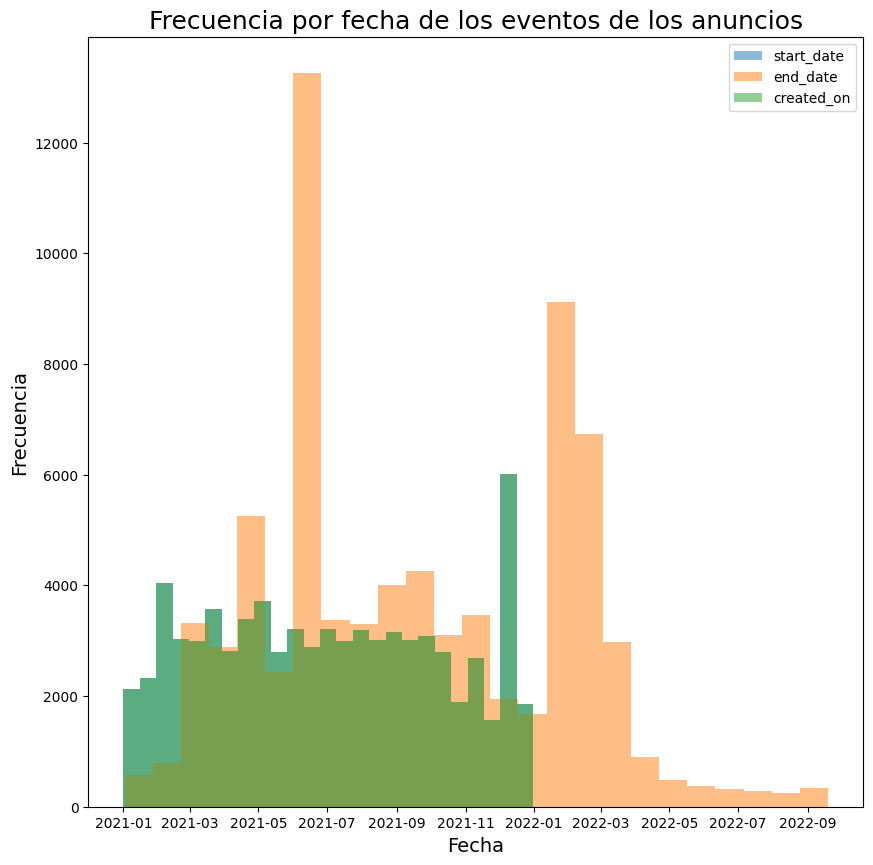

In [24]:

plt.figure(figsize=(10, 10))
plt.hist(ds_train.start_date, bins=25, alpha=0.5, label="start_date")
plt.hist(ds_train.end_date, bins=25, alpha=0.5, label="end_date")
plt.hist(ds_train.created_on, bins=25, alpha=0.5, label="created_on")
plt.xlabel("Fecha", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Frecuencia por fecha de los eventos de los anuncios", size=18)
plt.legend(loc='upper right')


En este grafico se puede apreciar la distribución de las variables que hacen referencia a las fechas de creacion, alta y baja de los anuncios. Podemos ver que la distribución de las fechas de creación coincide con la distribución de las fechas de alta del anuncio, lo cual tiene sentido que así sea ya que la fecha de creación del anuncio es la primer versión del anuncio en ser dada de alta. 

###  Distribución de barrios
Primero vemos la cantidad de apariciones de los barrios por anuncio en la siguiente tabla:

In [25]:
ds_train['place_l3'].value_counts()

Palermo                 11506
Belgrano                 7197
Caballito                5699
Recoleta                 5017
Villa Urquiza            3703
Almagro                  3245
Nuñez                    2848
Villa Crespo             2560
Flores                   2522
Barrio Norte             2357
Balvanera                2066
Colegiales               1590
Villa Devoto             1541
Villa del Parque         1472
Saavedra                 1440
Puerto Madero            1172
San Telmo                1103
San Nicolás              1060
San Cristobal            1029
Barracas                 1017
Retiro                    982
Boedo                     979
Floresta                  955
Monserrat                 887
Parque Chacabuco          836
Coghlan                   805
Villa Pueyrredón          775
Villa Luro                597
Mataderos                 594
Chacarita                 556
Liniers                   537
Villa Ortuzar             530
Parque Patricios          502
Villa Luga

Como podemos observar, hay demasiados barrios con pocas apariciones, por lo que nos centraremos en visualizar los primeras 25 barrios que mas aparecen. Agrupando al resto en una nueva categoria llamada "Otras".

In [26]:
top25 = ds_train['place_l3'].value_counts().head(25)

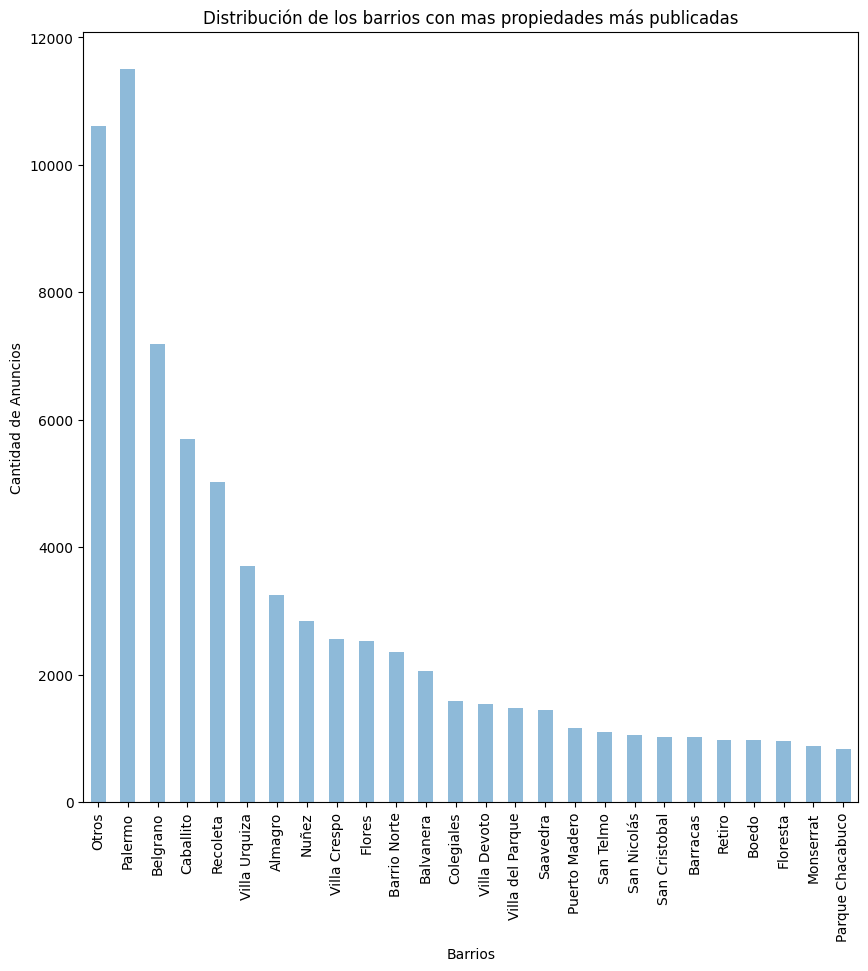

In [27]:
ds_otros_barrios = ds_train[~ds_train['place_l3'].isin(
    top25.index)]  # tomamos solo con las observaciones que no pertenecen al top 25 de barrios
frecuencia_otras = ds_otros_barrios.shape[0]
otras = pd.Series(data=[frecuencia_otras], index=["Otros"])
distribucion_por_barrios = pd.concat([otras, top25])

ax = distribucion_por_barrios.plot.bar(alpha=0.5,
                                       title="Distribución de los barrios con mas propiedades más publicadas",
                                       xlabel="Barrios", ylabel="Cantidad de Anuncios", figsize=(10, 10))

El barrio de Palermo es la que tiene mas propiedades publicadas

### Distribución de tipos de propiedad

Para analizar la distribucion de la variable property_type vamos a agrupar las apariciones en un grafico de barras por tipo de propiedad

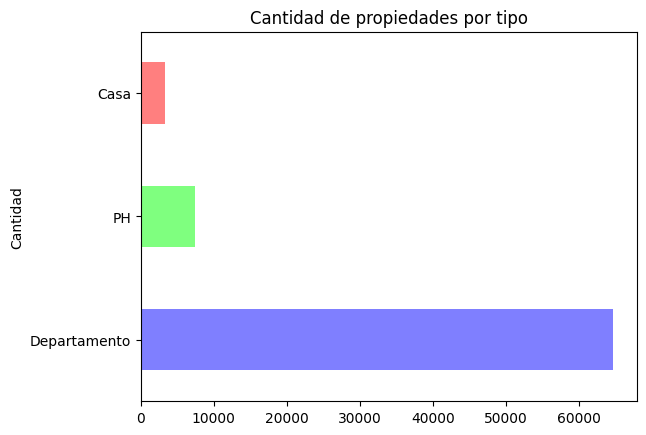

In [28]:
colores = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
grf = ds_train['property_type'].value_counts().plot.barh(alpha=0.5, color=colores,
                                                         title="Cantidad de propiedades por tipo", ylabel="Cantidad")

A simple vista se puede ver que la mayoria de publicaciones son de departamentos por una amplia diferencia

### Distribución de latitud y longitud
Para analizar la longitud y latitud vamos a utilizar un grafico de a pares ya que nos aporta más información sobre su distribución, pudiendo visualizar la localización de la propiedad. Adicionalmente se distinguirá por el tipo de propiedad.

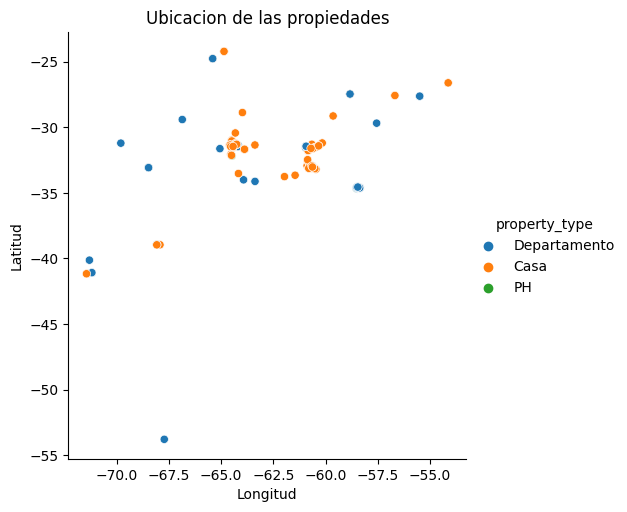

In [29]:
sns.relplot(data=ds_train, x="longitud", y="latitud", hue="property_type").set(title="Ubicacion de las propiedades",
                                                                               xlabel='Longitud', ylabel='Latitud')

Podemos ver que la mayoria de propiedades publicadas se encuentran concentradas en un área en particular, donde mayormente son de tipo Casa. Y al alejarse se ven departamentos distanciados entre sí.

### Distribución de habitaciones y baños

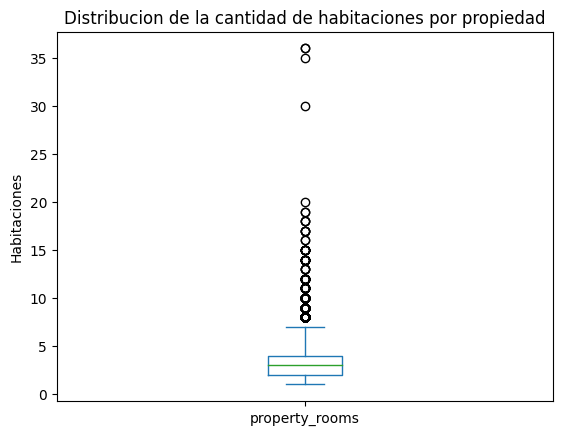

In [30]:
grf = ds_train.property_rooms.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad",
                                       ylabel="Habitaciones")

Podemos ver que hay una gran cantidad de outliers, siendo 40 el que mas se aleja, para visualizar mejor la distribucion del boxplot veremos un nuevo grafico sin considerar los outliers.

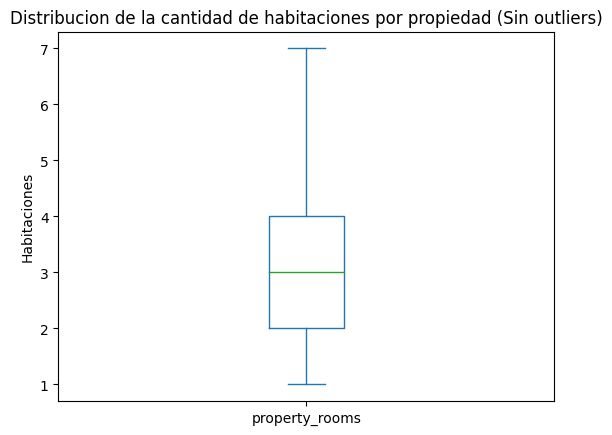

In [31]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_rooms_filtrado = ds_train[ds_train.property_rooms <= max].property_rooms
grf = property_rooms_filtrado.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad (Sin outliers)",
                                       ylabel="Habitaciones")

Ahora si podemos visualizar mejor los valores de la mediana, q3, q1 y los bigotes. Que toman la siguiente cantidad de habitaciones:

*   Bigotes: 1 y 7.
*   Cuartil 1: 2
*   Mediana: 3.
*   Cuartil 3: 4.





Hacemos el mismo procedimiento ver la distribución de la cantidad de baños por propiedad

<AxesSubplot: title={'center': 'Distribucion de la cantidad de baños por propiedad'}, ylabel='Baños'>

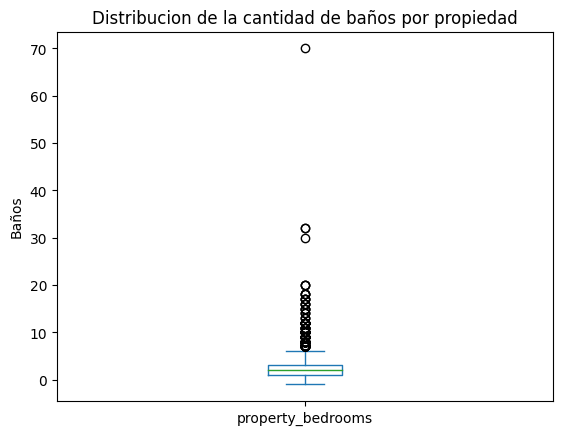

In [32]:
ds_train.property_bedrooms.plot.box(title="Distribucion de la cantidad de baños por propiedad", ylabel="Baños")

Vemos que esta vez hay mas distancia entre el outlier mas alejado y el resto de outliers.

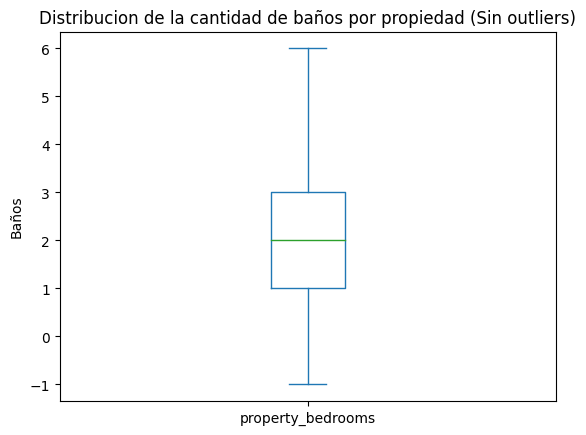

In [33]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_bedrooms_filtrado = ds_train[ds_train.property_bedrooms < max].property_bedrooms
grf = property_bedrooms_filtrado.plot.box(title="Distribucion de la cantidad de baños por propiedad (Sin outliers)",
                                          xlabel=" ", ylabel="Baños")

En este caso toman los siguientes valores:

*   Bigotes: -1 y 6.
*   Cuartil 1: 1.
*   Mediana: 2.
*   Cuartil 3: 3.


### Distribución de precio

Para analizar la distribución del precio, como es un tipo de variable continua y cada observación puede tomar un valor en un rango muy grande, optamos por hacer una agrupación por rangos de precios, obteniendo una categoria por cada rango.
Vamos a considerar la mediana para establecer los limites entre cada grupo, consideramos que es un buen valor para dividir al conjunto en partes ya que no se ve afectado drasticamente por outliers (como si sucede con la media).

In [34]:
print(f"La mediana del precio es: {ds_train.property_price.median()}")

La mediana del precio es: 144000.0


<AxesSubplot: title={'center': 'Distribucion de los precios de las propiedades'}, ylabel='Rango de precios'>

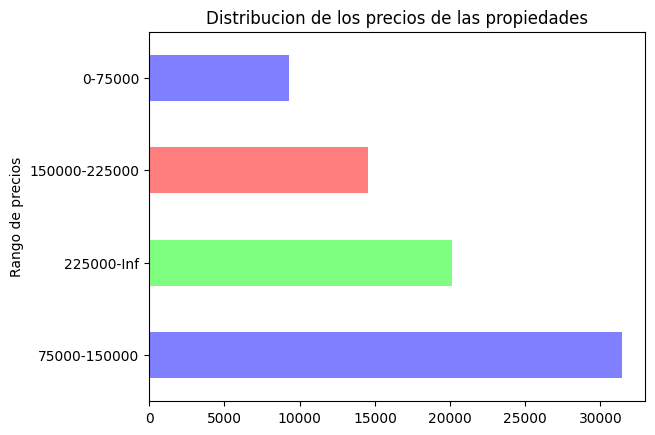

In [35]:
# Tomamos valores alrededor de la mediana
property_price_grouped = pd.cut(ds_train.property_price, bins=[0, 75000, 150000, 225000, float("inf")],
                                labels=["0-75000", "75000-150000", "150000-225000", "225000-Inf"], include_lowest=True)
property_price_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                title="Distribucion de los precios de las propiedades",
                                                xlabel="Rango de precios", ylabel="Frecuencia")

Podemos ver que la mayoria de propiedades estan dentro del rango de 75000 y 150000 USD.

### Distribución de superficie total y cubierta

Utilizaremos un violin plot para cada variable. 

<AxesSubplot: >

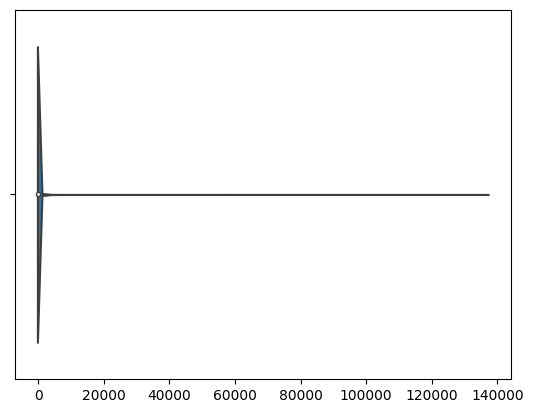

In [36]:
sns.violinplot(ds_train.property_surface_total.values)

A simple vista no esta muy claro el gráfico por la cantidad de outliers que hay, por lo que dejaremos de lado la mayoria de outliers para interpretarlo mas en detalle.

<AxesSubplot: >

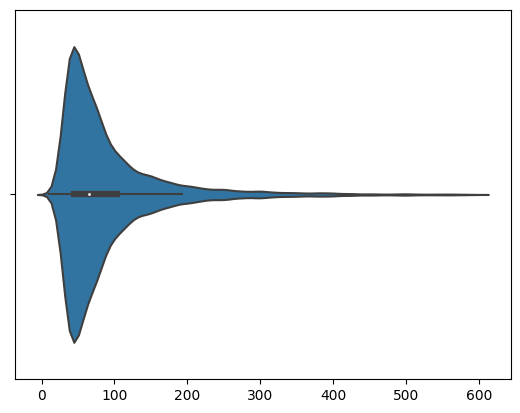

In [37]:
ds_surface_sin_outliers = ds_train[ds_train.property_surface_total < 600]
sns.violinplot(ds_surface_sin_outliers.property_surface_total.values)

Podemos ver que entre 0 y 100 se encuentra la mayor densidad

Hacemos el mismo procedimiento para visualizar la distribución de la superficie cubierta de la propiedad

<AxesSubplot: >

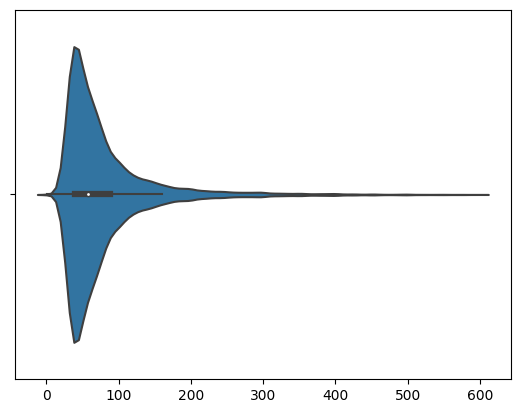

In [38]:
ds_surface_covered_sin_outliers = ds_train[ds_train.property_surface_covered < 600]
sns.violinplot(ds_surface_covered_sin_outliers.property_surface_covered.values)

Se nota que el grafico de property_surface_total es similar al de property_surface_covered, teniendo el segundo una densidad levemente menor. 

## Correlación entre variables

A continuación analizaremos la correlación entre las variables cuantitativas, primero visualizando la distribución a pares entre estas.

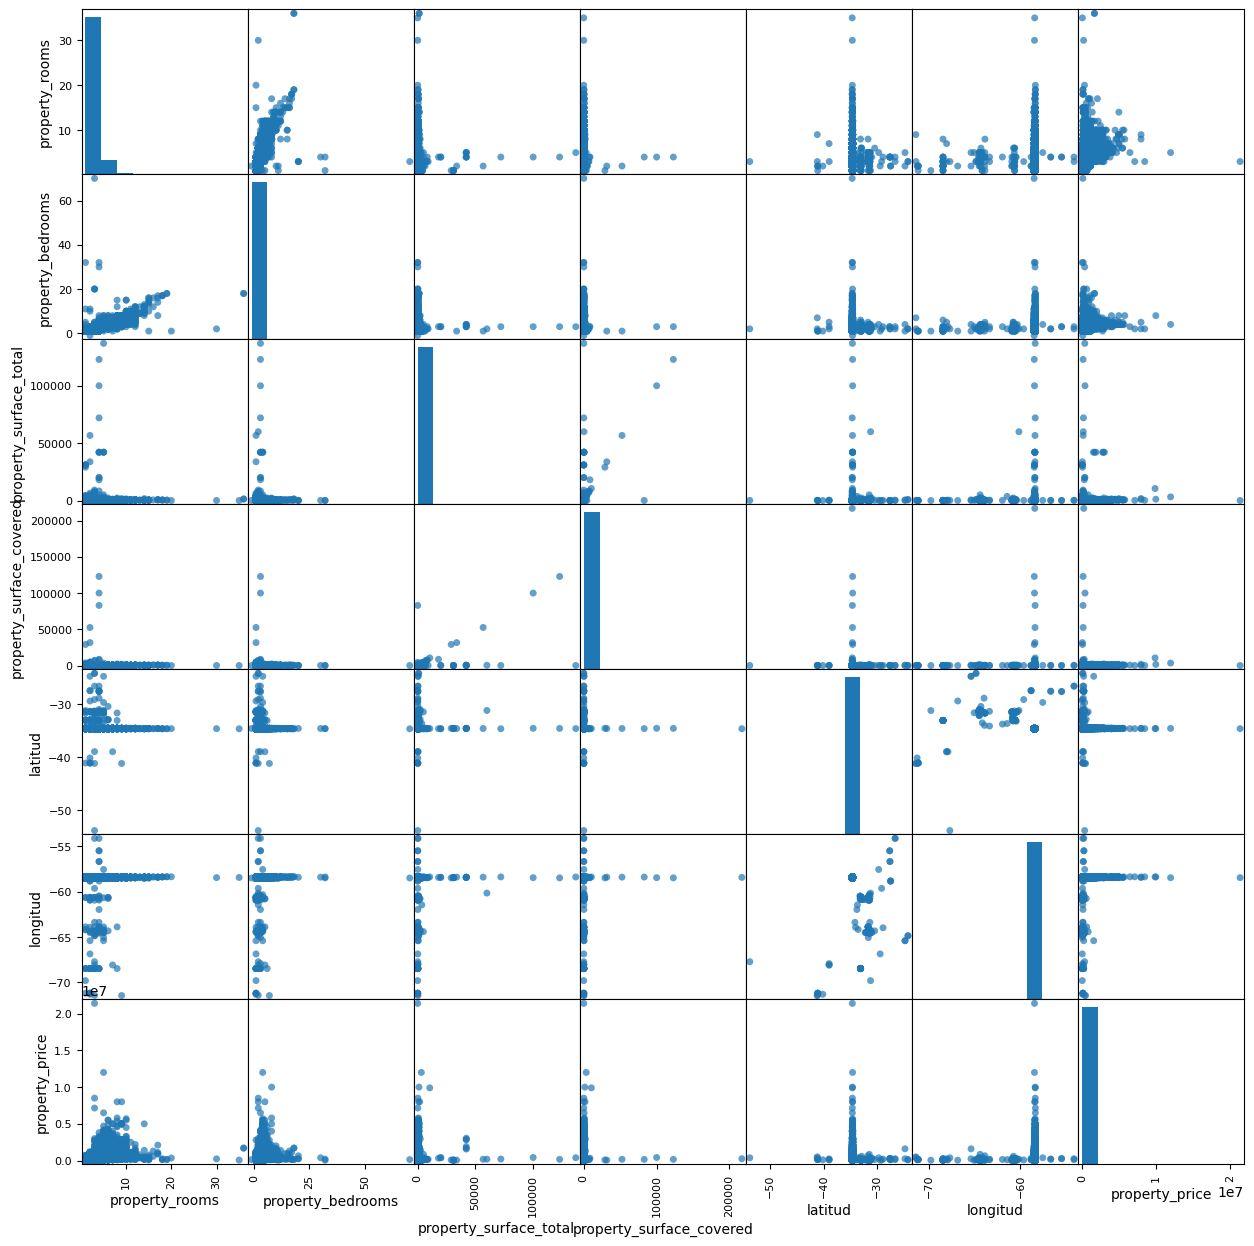

In [39]:
quantitative_dataset = ds_train[cuantitativas_filtradas]
ax = scatter_matrix(quantitative_dataset, alpha=0.7, figsize=(15, 15), s=100)

Si bien a simple vista no esta muy claro que variables están correlacionadas entre sí, podemos suponer que puede llegar a haber relación entre property_rooms y property_bedrooms, property_surface_total y property_surface_covered, property_price y property_rooms, property_price y property_bedrooms. Las cuales tiene sentido que pudiesen tener algún tipo de relación.

Además podemos considerar en menor medida que haya una relación entre longitud y latitud (cosa que no necesariamente tendría que ser así)




Analizaremos la correlación lineal entre variables por medio de la medición del coeficiente de Pearson

In [40]:
correlations = quantitative_dataset.corr()
correlations

property_rooms  property_bedrooms  \
property_rooms                  1.000000           0.871305   
property_bedrooms               0.871305           1.000000   
property_surface_total          0.066502           0.065349   
property_surface_covered        0.073967           0.073278   
latitud                         0.004857           0.004030   
longitud                       -0.007941          -0.007242   
property_price                  0.490836           0.424015   

                          property_surface_total  property_surface_covered  \
property_rooms                          0.066502                  0.073967   
property_bedrooms                       0.065349                  0.073278   
property_surface_total                  1.000000                  0.582076   
property_surface_covered                0.582076                  1.000000   
latitud                                 0.025644                  0.001951   
longitud                               -0.013768                 -0.000940   
property_price                          0.082340                  0.052436   

                           latitud  longitud  property_price  
property_rooms            0.004857 -0.007941        0.490836  
property_bedrooms         0.004030 -0.007242        0.424015  
property_surface_total    0.025644 -0.013768        0.082340  
property_surface_covered  0.001951 -0.000940        0.052436  
latitud                   1.000000 -0.201291        0.016713  
longitud                 -0.201291  1.000000        0.023159  
property_price            0.016713  0.023159        1.000000

Haremos un heatmap que nos permite visualizar mejor la correlación

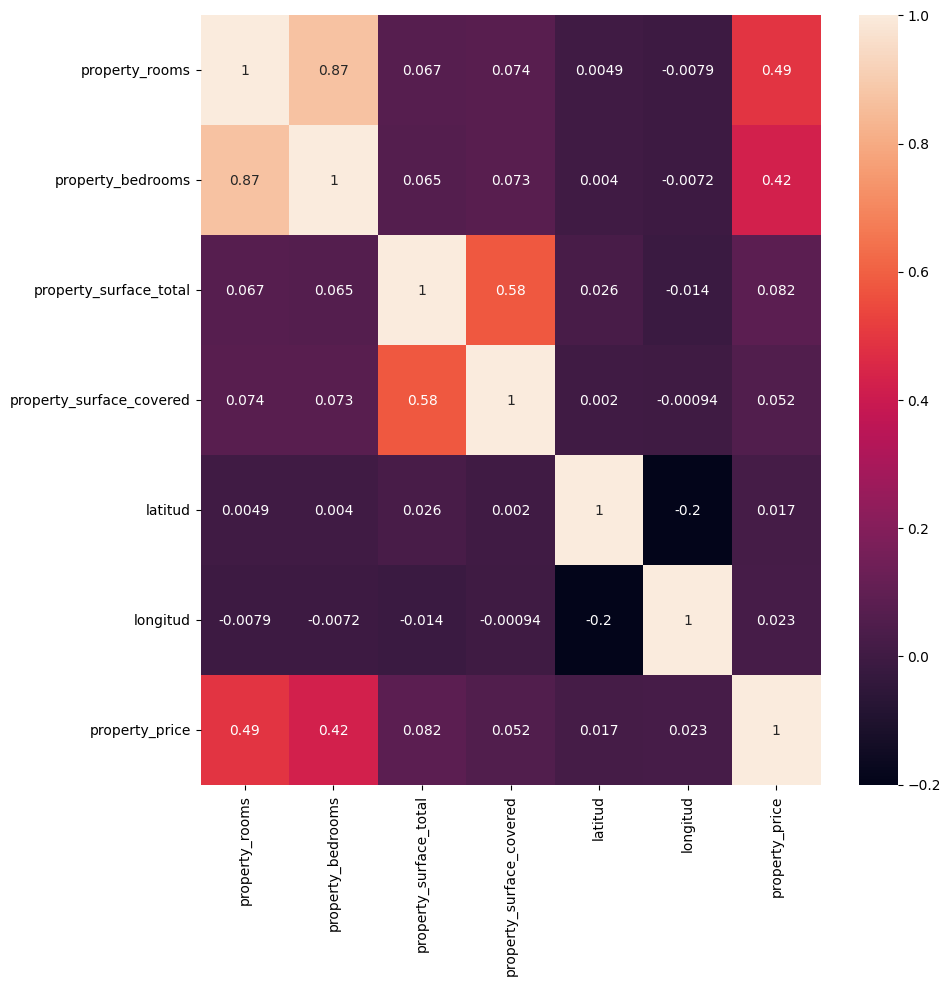

In [41]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(quantitative_dataset.corr(), annot=True)

Luego de calcular el coeficiente de Pearson donde los que resultan cercanos a 1 indican una gran correlación entre sí, los que tienden a 0 tienen poca correlación y los cercanos a -1 presentan una notable correlación negativa.

Veremos si las variables que parecían relacionarse anteriormente realmente lo hacen:


In [42]:
posible_correlations = [('property_rooms', 'property_bedrooms'), ('property_price', 'property_bedrooms'),
                        ('property_price', 'property_rooms'), ('property_surface_total', 'property_surface_covered'),
                        ('longitud', 'latitud')]
for corr in posible_correlations:
    print(f"Entre {corr[0]} y {corr[1]}:{round(correlations.loc[corr[0], corr[1]], 2)}")

Entre property_rooms y property_bedrooms:0.87
Entre property_price y property_bedrooms:0.42
Entre property_price y property_rooms:0.49
Entre property_surface_total y property_surface_covered:0.58
Entre longitud y latitud:-0.2


Podemos sacar las siguientes conclusiones sobre las variables que parecian relacionarse:


*   Hay mucha relación entre la cantidad de habitaciones y ambientes.
*   Hay tambien bastante relación entre la superficie total y superficie cubierta de la propiedad.
*   Casi no hay relación entre el precio y la cantidad de habitaciones.
*   Casi no hay relación entre el precio y la cantidad de ambientes.
*   No hay relación entre la latitud y la longitud.





## Análisis de valores faltantes

Ahora analizaremos los datos faltantes del dataset.

### Porcentaje de valores faltantes por columna



id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.973528
longitud                      3.973528
place_l2                      0.000000
place_l3                      0.435019
place_l4                     96.136554
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.110094
property_bedrooms            11.685831
property_surface_total        5.214923
property_surface_covered      3.583602
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


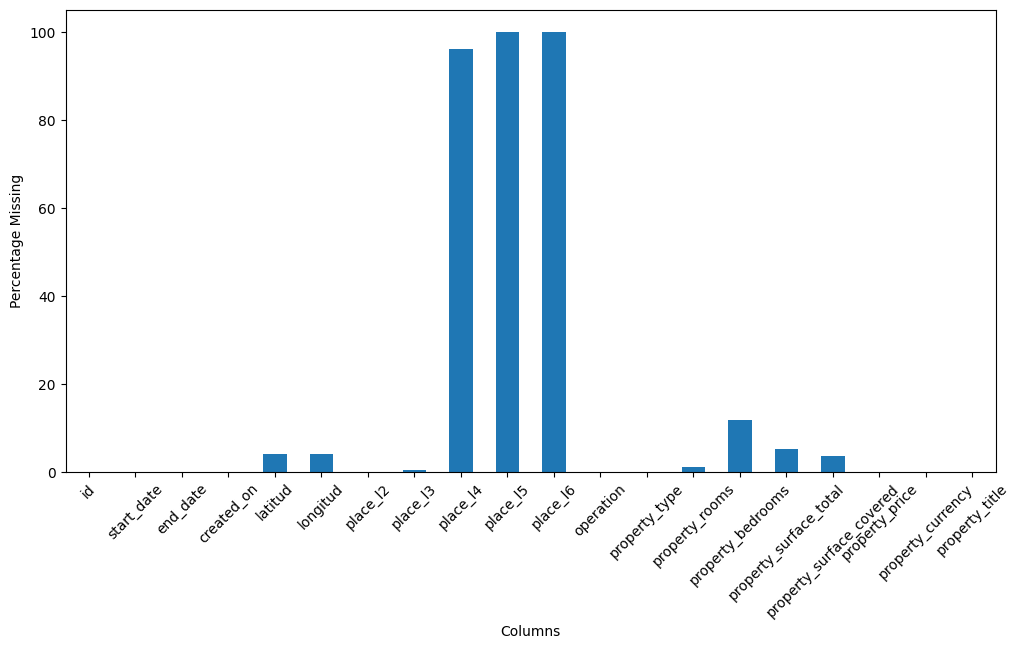

In [43]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

A simple vista podemos ver que las columnas place_l4,place_l5 y place_l6 practicamente no tienen datos, procederemos a eliminarlas.

### Porcentaje de datos faltantes por fila

<AxesSubplot: >

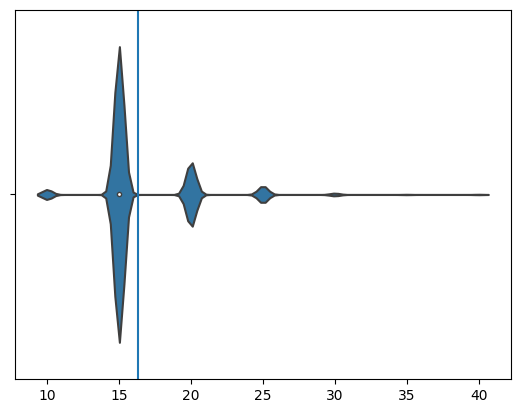

In [44]:
column_count = ds_train.shape[1]
ds_plot = ds_train.T.isna().sum() * 100 / column_count

plt.axvline(ds_plot.mean())
sns.violinplot(ds_plot.values)

Analizaremos nuevamente el porcentaje por fila luego de trabajar con las columnas

### Procesado de columnas

Descartaremos la columna id debido a que no es relevante para nuestro análisis. No podemos usar un dato uníco porque no representa ninguna característica relevante.

In [45]:
ds_train['id'].head()

398521    kF0bkHgPamCYCqXRPCkz6A==
62011     +PS3s7A+625etA9FbozFfg==
162533    h7yKWe6AxLEXDuiie8H1Lw==
335927    N+EXjJzYi3nQjO00RitsSg==
215696    Zn+HbEZkzNah/nBC6OolNg==
Name: id, dtype: object

Como mencionamos anteriormente, evaluaremos descartar place_l4 por la cantidad de valores faltantes que hay.

In [46]:
ds_train['place_l4'].value_counts()

Palermo Hollywood    1254
Palermo Chico         874
Palermo Soho          651
Palermo Viejo         134
Name: place_l4, dtype: int64

In [47]:
ds_train['place_l2'].value_counts()

Capital Federal    75399
Name: place_l2, dtype: int64

In [48]:
ds_train['property_currency'].value_counts()

USD    75399
Name: property_currency, dtype: int64

In [49]:
ds_train['operation'].value_counts()

Venta    75399
Name: operation, dtype: int64

Como place_l4 tiene pocas observaciones y todas corresponden al barrio de Palermo, descartaremos esta columna.
Además, como mencionamos más arriba, la columna created_on siempre es igual a la columna start_date, por lo que también la descartaremos.
Por otro lado, como filtramos solo las propiedades de CABA eliminaremos la columna place_l2 ya que tiene un único valor. Por el mismo motivo eliminaremos la columna property_currency y la columna property_operation.

In [50]:
row_missing_data = ds_train.T.isna().sum() * 100 / column_count
row_missing_data.value_counts()

15.0    56844
20.0    12597
25.0     3338
10.0     1922
30.0      538
40.0       84
35.0       76
dtype: int64

In [51]:
dataset_perc = row_missing_data.value_counts() * 100 / ds_train.shape[0]
print(f"La cantidad de faltantes segun porcentaje representan\n{dataset_perc}")

La cantidad de faltantes segun porcentaje representan
15.0    75.390920
20.0    16.707118
25.0     4.427114
10.0     2.549105
30.0     0.713537
40.0     0.111407
35.0     0.100797
dtype: float64


Ahora que elegimos las columnas deseadas, veremos nuevamente los porcentajes por columna para preparar algunas imputaciones

In [52]:
def plot_missing_by_column(dataset):
    percent_missing = dataset.isna().sum() * 100 / len(dataset)
    plt.figure(figsize=(12, 6))
    percent_missing.plot.bar(x='index', rot=45)
    plt.xlabel("Columns")
    plt.ylabel("Percentage Missing")
    rows = dataset.shape[0]
    print(dataset.isna().sum() / rows * 100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.973528
longitud                      3.973528
place_l2                      0.000000
place_l3                      0.435019
place_l4                     96.136554
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.110094
property_bedrooms            11.685831
property_surface_total        5.214923
property_surface_covered      3.583602
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


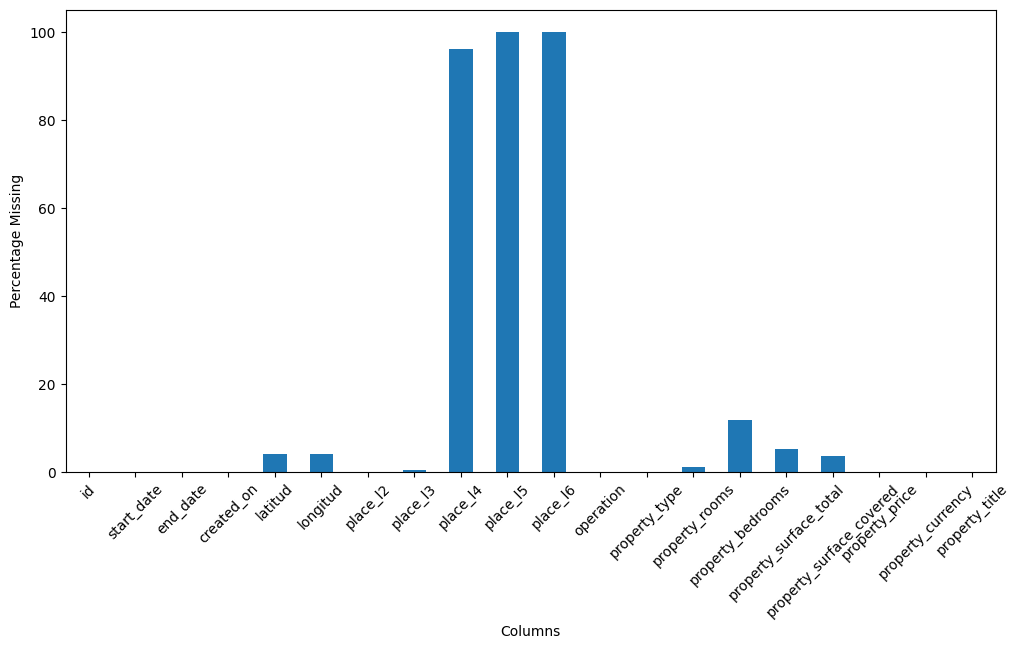

In [53]:
plot_missing_by_column(ds_train)

Eliminaremos las columnas mencionadas anteriormente. Luego, haremos algunas imputaciones sobre los datos faltantes para reparar algunos.


In [54]:
## Train

ds_train.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'],
              inplace=True, axis=1)

## Test
ds_test.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'],
             inplace=True, axis=1)

## Reparacion de datos faltantes

Ahora analizaremos columna a columna como podemos reparar esos datos.

### Pre Imputacion de latitud y longitud

latitud    3.973528
dtype: float64


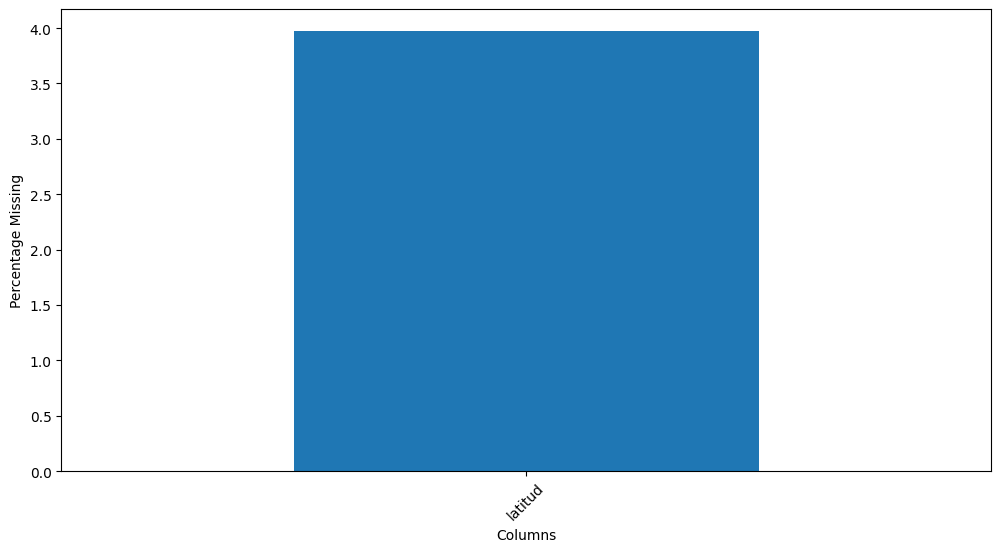

In [55]:
plot_missing_by_column(ds_train[['latitud']])

longitud    3.973528
dtype: float64


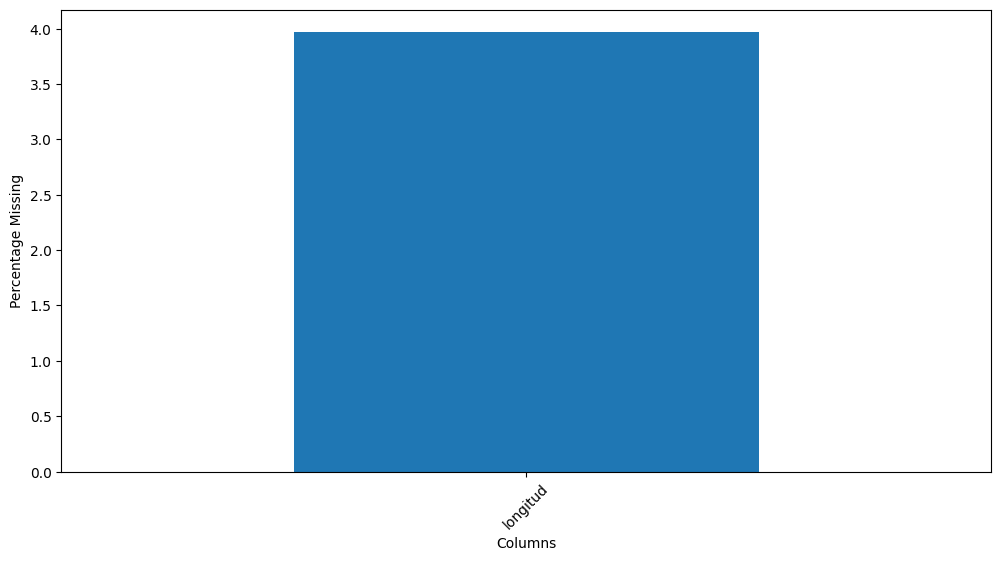

In [56]:
plot_missing_by_column(ds_train[['longitud']])

Vemos que de las coordenadas faltantes, siempre que falta una falta la otra también. No hay casos donde solo falte 1 de las 2 coordenadas.

In [57]:
ds_train[(ds_train.latitud.isna()) & (~ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [58]:
ds_train[(~ds_train.latitud.isna()) & (ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [59]:
# Train
percentage_train = ds_train[ds_train.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_train[ds_train.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para train representan el {round(percentage_train, 3)}%")

# Test
percentage_test = ds_test[ds_test.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_test[ds_test.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para test representan el {round(percentage_test, 3)}%")

Los datos faltantes en la columna place_l3 para train representan el 4.372%
Los datos faltantes en la columna place_l3 para test representan el 5.313%


Para reconstruir los datos faltantes nos vamos a basar en el barrio marcado por 'place_l3' calculando la latitud y longitud media de cada uno y asignarle esos datos.

In [60]:
# Train
for barrio in ds_train.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.latitud.isna()), ['latitud']] = latitud_media
    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.longitud.isna()), ['longitud']] = longitud_media

# Test
for barrio in ds_test.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.latitud.isna()), ['latitud']] = latitud_media
    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.longitud.isna()), ['longitud']] = longitud_media

Vemos que los datos restantes ahora mismo son aquellos que tampoco tienen asignado un barrio. Dichos datos son irreparables, ya que no tenemos ninguna información respecto a la ubicación.

In [61]:
ds_train[ds_train.latitud.isna()]

id start_date                      end_date  \
83547   HMcd5R2BH3ZwFht+Xr31fA== 2021-02-05 2021-04-30 00:00:00.000000000   
158340  p4w3F3utyN2K+OyuuCkzbA== 2021-05-26 2021-06-05 00:00:00.000000000   
343265  ivCufxbxoTGNCsW8IF72Iw== 2021-08-11 2021-10-24 12:00:03.026354504   
130464  ZRuBHv9VeFO7JSugv+Bbrg== 2021-05-27 2021-06-05 00:00:00.000000000   
80203   vHP8fy5SyLNedX7t7fgoKQ== 2021-08-17 2021-08-31 00:00:00.000000000   
...                          ...        ...                           ...   
335089  WAiIsbKUbeHfLcMXlqdRSw== 2021-07-21 2021-10-03 12:00:03.026354504   
31871   BKX/oZw0f3iowrtswwdbMA== 2021-05-17 2021-06-05 00:00:00.000000000   
6699    v+sxjFL/W8jKIb6kZ/utHQ== 2021-02-09 2021-06-05 00:00:00.000000000   
19426   0q0FwIHkex8jywo1x1Q6mA== 2021-01-27 2021-01-29 00:00:00.000000000   
106696  iV7+4ns6JXgPJSEj0D9ezg== 2021-03-11 2021-03-25 00:00:00.000000000   

        latitud  longitud place_l3 property_type  property_rooms  \
83547       NaN       NaN      NaN  Departamento             NaN   
158340      NaN       NaN      NaN          Casa             NaN   
343265      NaN       NaN      NaN  Departamento             7.0   
130464      NaN       NaN      NaN          Casa             NaN   
80203       NaN       NaN      NaN  Departamento             2.0   
...         ...       ...      ...           ...             ...   
335089      NaN       NaN      NaN          Casa             NaN   
31871       NaN       NaN      NaN  Departamento             NaN   
6699        NaN       NaN      NaN          Casa             NaN   
19426       NaN       NaN      NaN  Departamento             3.0   
106696      NaN       NaN      NaN  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
83547                 3.0                   145.0                     145.0   
158340                4.0                   228.0                     193.0   
343265                2.0                   164.0                     164.0   
130464                6.0                     NaN                     421.0   
80203                 1.0                     NaN                      29.0   
...                   ...                     ...                       ...   
335089                5.0                   282.0                     282.0   
31871                 2.0                    90.0                       NaN   
6699                  3.0                     NaN                     390.0   
19426                 3.0                   220.0                     200.0   
106696                2.0                    87.0                      87.0   

        property_price                                     property_title  
83547         225000.0  Departamento  Centro tres dormitorios de categ...  
158340        340000.0  Casa en Venta sobre 3 has en El Argentino Farm...  
343265        290000.0  VENTA DOS DORMITORIOS DOS BAÑOS - JOYA ART DEC...  
130464        610000.0   EXCELENTE casa rodeada de naturaleza...Soñada...  
80203          85000.0                     Departamento - Capital Federal  
...                ...                                                ...  
335089        250000.0              HERMOSA CASA CON PISCINA Y PARQUE !!!  
31871         250000.0  DEPTO 3 AMBIENTES - EDIFICIO ESTRELLA DE MAR -...  
6699          795000.0  Magnífica casa a la venta de 7 ambientes en Ab...  
19426         380000.0  Amplio loft en venta con doble vista al agua e...  
106696        129000.0  3 Ambientes amplios, 2 baños, prox galerias pa...  

[131 rows x 13 columns]

In [62]:
ds_test[ds_test.latitud.isna()]

id start_date end_date  latitud  longitud  \
318737  /GQgeYB366orgPmlswOlew==        NaT      NaT      NaN       NaN   
346564  aJ+TIfF6ee30ip5+ik0Upw==        NaT      NaT      NaN       NaN   
381103  O4yEtUmMXzMQRltyV5QZ9w==        NaT      NaT      NaN       NaN   
214731  eznwOHdDYqYAdOfh8ANvBA==        NaT      NaT      NaN       NaN   
142639  Rz0b5avJ+Y05s1qSNFVmsw==        NaT      NaT      NaN       NaN   
218048  vRA/0y8xkAUweY9h1T7EzA==        NaT      NaT      NaN       NaN   
358077  wmC/iDXdmQtR4vYq4kzdvQ==        NaT      NaT      NaN       NaN   
119175  iBAE80MSUHIX96PwAFleUA==        NaT      NaT      NaN       NaN   
176947  HfMK9hfLadGV1BfCX6KK1A==        NaT      NaT      NaN       NaN   
158449  /j3wYMmm9WUqKnvnVvlZlQ==        NaT      NaT      NaN       NaN   
169680  4uu6b2tzOIdwFnsGO1OIzA==        NaT      NaT      NaN       NaN   
101428  gF45Up7vyzAOFVs11JkikQ==        NaT      NaT      NaN       NaN   
84681   FDP0I8rP+WzTtwUj4Gc2iQ==        NaT      NaT      NaN       NaN   
389004  CPXCgjqRI/3js9VHc63/ew==        NaT      NaT      NaN       NaN   
318282  OR5WhCzgKUhaDY9kcPPKug==        NaT      NaT      NaN       NaN   
286942  pZB+0gvwe9FrFT26y3ChZw==        NaT      NaT      NaN       NaN   
180567  VeUeVZzvn6CG1admtOWObg==        NaT      NaT      NaN       NaN   
324195  yZbN/7naQCAKZfRIbH9lqw==        NaT      NaT      NaN       NaN   
143123  m281LUJMceK6Z3pN9+h3cg==        NaT      NaT      NaN       NaN   
114489  m840XwQvdPOmo1l4HKF73Q==        NaT      NaT      NaN       NaN   
93803   MbzcuMKtbLgu0MSLdMv8gw==        NaT      NaT      NaN       NaN   
335758  WHW43q4WY6/9r8onU+XHlA==        NaT      NaT      NaN       NaN   
161811  OBEJUlZ0HWzDeQOdVfUQ5g==        NaT      NaT      NaN       NaN   
441481  HaLzJ47x5J7a+LN0if6Jug==        NaT      NaT      NaN       NaN   
97180   tFdkkcTHiZcNpifiq0EJuQ==        NaT      NaT      NaN       NaN   
32679   l6NUlcdSPVsmmKdQIMzWrw==        NaT      NaT      NaN       NaN   
308187  UHPrrt0xvMZ+CHRHoq3wFQ==        NaT      NaT      NaN       NaN   
143142  wrCkIm73SkbSvkaT5lI1NQ==        NaT      NaT      NaN       NaN   
151047  7Vj5JIBtVFUQQPDASV8LMQ==        NaT      NaT      NaN       NaN   
308980  yHH+c/hrvj+80CmVIyH+iw==        NaT      NaT      NaN       NaN   
142552  7lG/owYTkpnfFFv4mY2AAg==        NaT      NaT      NaN       NaN   
101456  pYxy/6HZGMBjHgbngmG70Q==        NaT      NaT      NaN       NaN   
292987  gmeAri/mkwnQfifJlZgNYg==        NaT      NaT      NaN       NaN   
177602  fGNGYFbRxuKwIidrnXD8EQ==        NaT      NaT      NaN       NaN   
71492   Ur3JttwFZloGubSEDsarDg==        NaT      NaT      NaN       NaN   
221835  cQOhFHR/RFEu7RjROsN4Rw==        NaT      NaT      NaN       NaN   
241085  j/qJT+DHmdmfygjem/H1sw==        NaT      NaT      NaN       NaN   
402217  Hq7uSgPfrfVz1UnBOUUwOA==        NaT      NaT      NaN       NaN   
313732  tvxDz5wn65wHWzDUkzb35Q==        NaT      NaT      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
318737      NaN  Departamento             1.0                NaN   
346564      NaN          Casa             4.0                3.0   
381103      NaN  Departamento             3.0                NaN   
214731      NaN          Casa             NaN                3.0   
142639      NaN          Casa             5.0                NaN   
218048      NaN          Casa             NaN                2.0   
358077      NaN  Departamento             2.0                1.0   
119175      NaN  Departamento             1.0                NaN   
176947      NaN          Casa             NaN                4.0   
158449      NaN          Casa            10.0                7.0   
169680      NaN  Departamento             2.0                NaN   
101428      NaN          Casa             NaN                2.0   
84681       NaN  Departamento             3.0                2.0   
389004      NaN            PH             3.0                2.0   
318282   

In [63]:
## Train
print(
    f"El porcentaje de valores a eliminar train corresponden a un {round((len(ds_train[ds_train.latitud.isna()]) / len(ds_train)), 4)}%")

## Test
print(
    f"El porcentaje de valores a eliminar en test corresponden a un {round((len(ds_test[ds_test.latitud.isna()]) / len(ds_test)), 4)}%")

El porcentaje de valores a eliminar train corresponden a un 0.0017%
El porcentaje de valores a eliminar en test corresponden a un 0.0021%


In [64]:
## Train

ds_train.drop(ds_train[ds_train.latitud.isna()].index, inplace=True)

## Test
ds_test.drop(ds_test[ds_test.latitud.isna()].index, inplace=True)

### Post Imputacion de latitud y longitud

latitud    0.0
dtype: float64


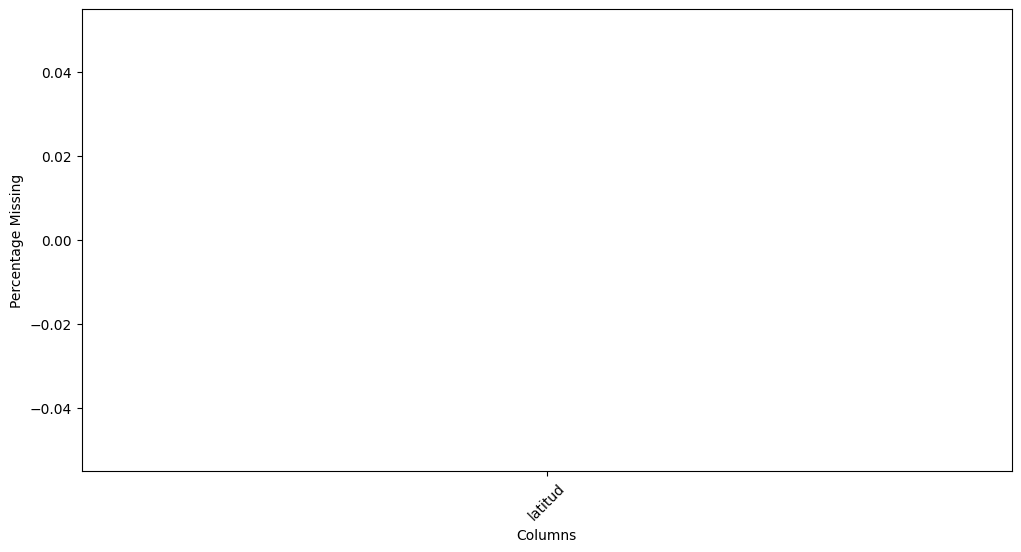

In [65]:
plot_missing_by_column(ds_train[['latitud']])

longitud    0.0
dtype: float64


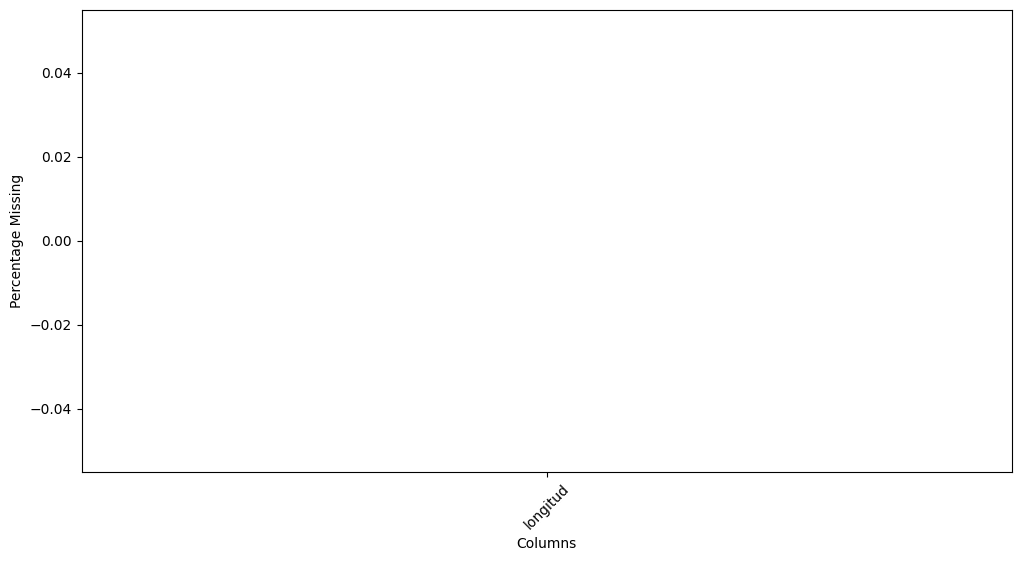

In [66]:
plot_missing_by_column(ds_train[['longitud']])

### Pre imputación de ambientes

property_rooms    1.086783
dtype: float64


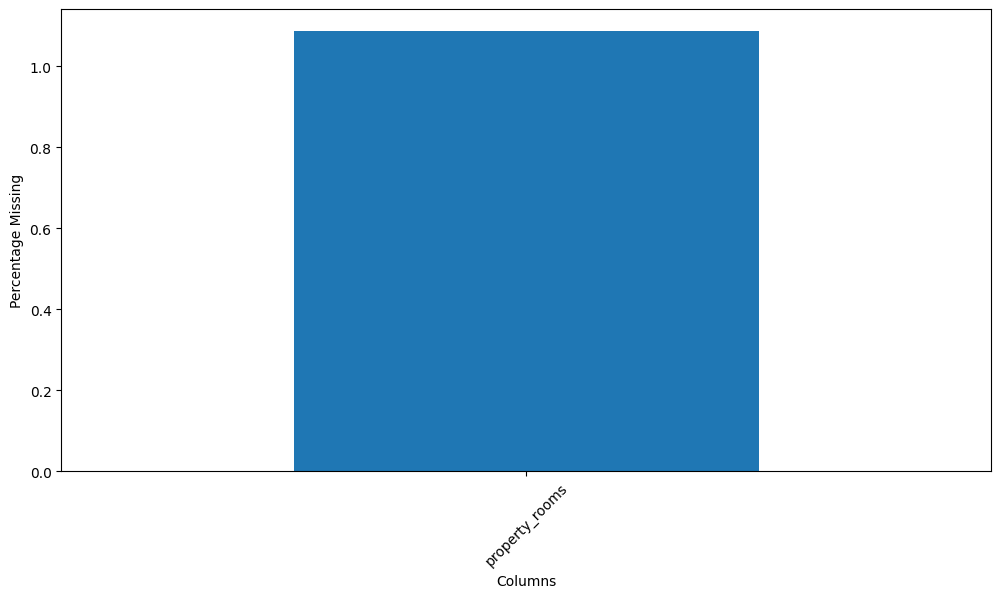

In [67]:
plot_missing_by_column(ds_train[['property_rooms']])

#### Reparacion de ambientes faltantes en base al titulo de la propiedad

In [68]:
def reparacion_amb_por_titulo_prop(ambientes_faltantes, ds):
    print(f"cantidad inicial de ambientes a reparar: {len(ds[ds['property_rooms'].isna()])}")
    regex = re.compile(r"(\d+ \bambientes?\b)")
    regex2 = re.compile(r"(\d+\ \b\bamb\b *)")

    a = {}
    for titulo in ambientes_faltantes.property_title:
        if (len(re.findall(regex, titulo.lower())) > 0):
            a[titulo] = re.findall(regex, titulo.lower())
        if (len(re.findall(regex2, titulo.lower())) > 0):
            a[titulo] = re.findall(regex2, titulo.lower())

    for i in ds.index:
        if ds.loc[i, 'property_title'] in a:
            if len(a[ds.loc[i, 'property_title']]) > 0:
                ds.loc[i, 'property_rooms'] = float("".join(a[ds.loc[i, 'property_title']]).split(" ")[0])
            if ("monoambiente" or "un ambiente" or "mono" or "mono ambiente") in str(
                    ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(1)
            if "dos ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(2)
            if "tres ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(3)
            if "cuatro ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(4)
            if "cinco ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(5)
            if "seis ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(6)

    print(f"cantidad de ambientes faltantes post reparacion: {len(ds[ds['property_rooms'].isna()])}")


In [69]:
datos_a_reparar = ds_train[['property_title', 'property_rooms']].reset_index()

# Train

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_train)

# Test

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_test)

cantidad inicial de ambientes a reparar: 818
cantidad de ambientes faltantes post reparacion: 651
cantidad inicial de ambientes a reparar: 196
cantidad de ambientes faltantes post reparacion: 189


### Post Imputacion de ambientes

property_rooms    0.864909
dtype: float64


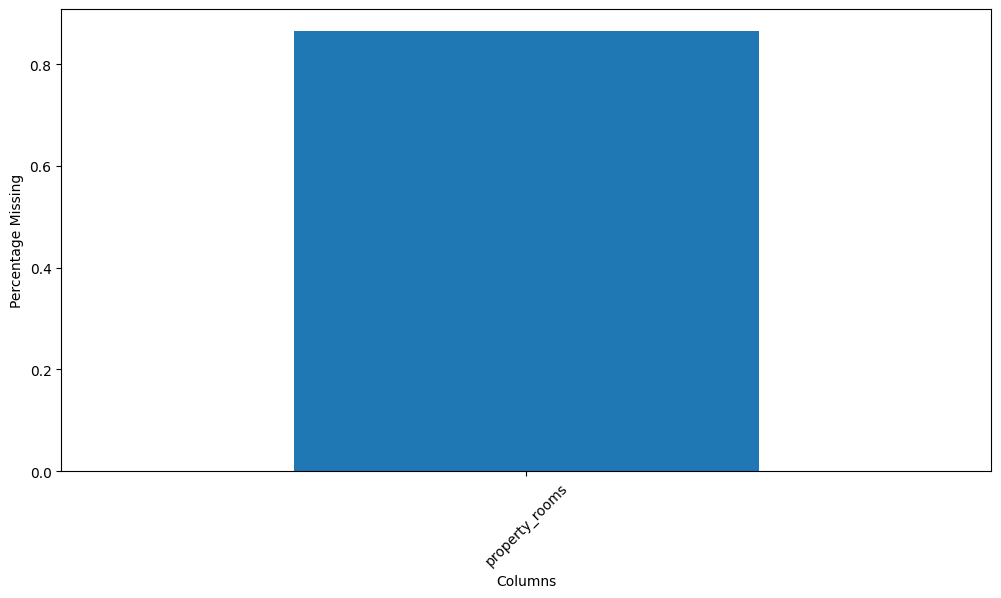

In [70]:
plot_missing_by_column(ds_train[['property_rooms']])

Como las que quedan sin datos son pocas observaciones, las eliminaremos

In [71]:
# Train
ds_train.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_train[ds_train.property_rooms.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_test[ds_test.property_rooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

property_rooms    0.0
dtype: float64


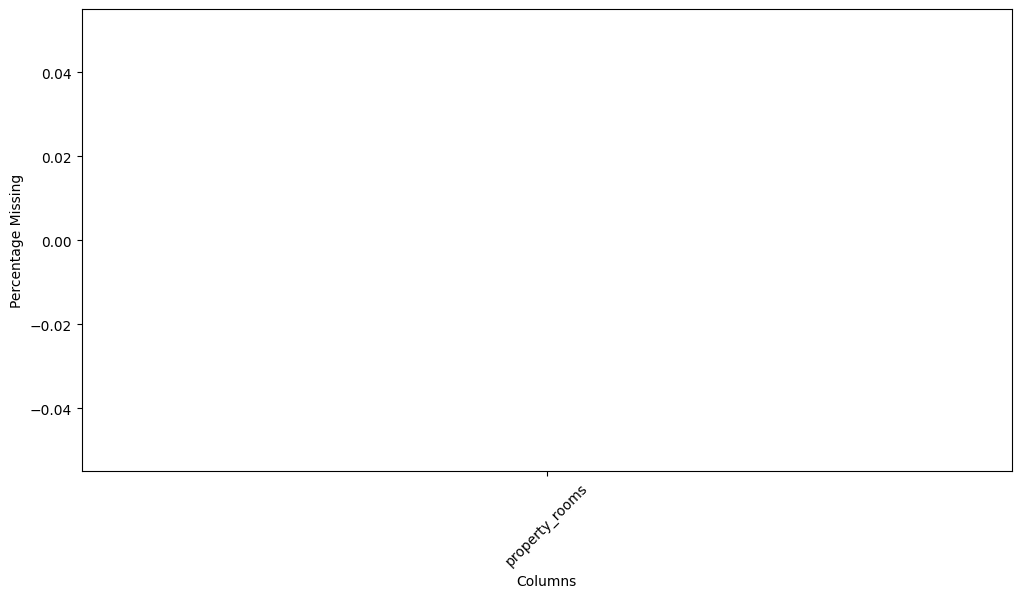

In [72]:
plot_missing_by_column(ds_train[['property_rooms']])

### Pre Imputacion de Habitaciones

property_bedrooms    11.309755
dtype: float64


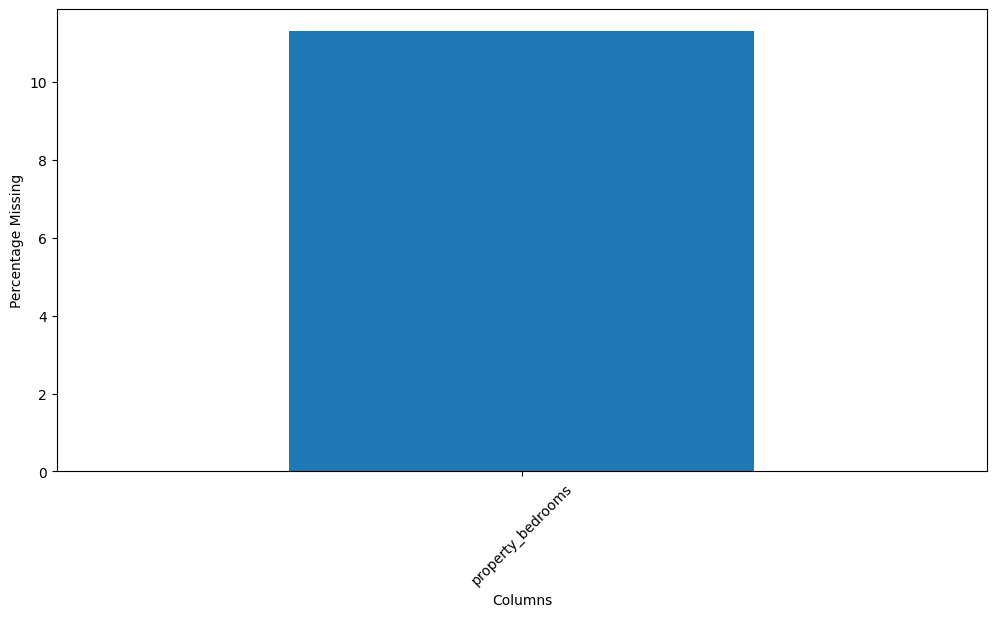

In [73]:
plot_missing_by_column(ds_train[['property_bedrooms']])

#### Reparacion de habitaciones faltantes en base a los ambientes

In [74]:
# Train
print(f"El total de habitaciones en train es: {len(ds_train.property_bedrooms)}")
habitaciones_invalidas = ds_train.loc[(ds_train['property_bedrooms'] > ds_train['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_train.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

# Test
print(f"El total de habitaciones en test es: {len(ds_test.property_bedrooms)}")
habitaciones_invalidas = ds_test.loc[(ds_test['property_bedrooms'] > ds_test['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_test.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas



El total de habitaciones en train es: 74617
El total de habitaciones invalidas es: 136. Constituye al 0% de los datos del ds
El total de habitaciones en test es: 18622
El total de habitaciones invalidas es: 26. Constituye al 0% de los datos del ds


id start_date end_date    latitud   longitud  \
4928    69j280NshNyMCYcFqsmhlw==        NaT      NaT -34.645031 -58.373672   
13814   TnCilO6Upsd/m6vIdWSOLA==        NaT      NaT -34.594361 -58.382751   
338919  xkxeuRCy0RtLzQkKyhCaNw==        NaT      NaT -34.669249 -58.474285   
204154  v4jFEcUT4A4X1EMIs8Nqjw==        NaT      NaT -34.591401 -58.378142   
140832  2aHER3AXQs3zb3EegLhmgg==        NaT      NaT -34.588454 -58.385257   
100807  3u2SeeteiBPk/c3nU9WQnA==        NaT      NaT -34.565974 -58.433832   
428097  5Q58aJJXojGC5f6ryqbJjw==        NaT      NaT -34.595668 -58.389490   
337149  cMA0xBBQnANFa/wNTQtZcw==        NaT      NaT -34.607496 -58.421754   
14163   TSH/MP+ATH7g5J0BzcENvg==        NaT      NaT -34.562445 -58.453890   
115504  qsmPAKJ9brIGa8jbUAtQ1Q==        NaT      NaT -34.613261 -58.361513   
137659  mAzAqXdmAZYrERB6k3F51w==        NaT      NaT -34.585134 -58.394394   
150228  Lk0e2KiZLt5LPGGQfbj8xQ==        NaT      NaT -34.605254 -58.468938   
404398  2h+d0j/474llaBCMxsopeA==        NaT      NaT -34.632353 -58.470828   
258718  k8B5YFFJR/qAum7Vo/NTlg==        NaT      NaT -34.603809 -58.461512   
459594  Vb8DwDZfI4nCtVA93y+uZg==        NaT      NaT -34.573595 -58.442591   
2516    uKy3ZC5YQ9kPZ1ztj7CKjw==        NaT      NaT -34.557573 -58.459926   
127231  wn7j0YSM4rEE0Tfl6S2lIQ==        NaT      NaT -34.618449 -58.505422   
115492  kRvcqrsStWAxxf/kUOa4Kg==        NaT      NaT -34.613261 -58.361513   
126403  ETzg09MPRQDliI9p8PzeBg==        NaT      NaT -34.564988 -58.444710   
115481  WQtd+fpYGscEqzse5BCckA==        NaT      NaT -34.613037 -58.360984   
113814  BrWCt7KwuYGEW5/x5LsTkg==        NaT      NaT -34.577669 -58.428640   
389785  27m+gMqYeF33x/dnieQKjw==        NaT      NaT -34.614298 -58.427139   
115502  tNDmYqYiETKsquAIP857XA==        NaT      NaT -34.613261 -58.361513   
6355    PZJRORTIAvMTvI3A+FLDUQ==        NaT      NaT -34.577180 -58.451264   
115490  4SB68b9pUEe+GxRTEbEbDw==        NaT      NaT -34.613037 -58.360984   
34437   3mkvrKJwUQJcyATeXceZVQ==        NaT      NaT -34.595668 -58.389490   

                place_l3 property_type  property_rooms  property_bedrooms  \
4928            Barracas  Departamento             1.0                2.0   
13814       Barrio Norte  Departamento             4.0                5.0   
338919      Villa Lugano          Casa             3.0                4.0   
204154          Recoleta  Departamento             3.0                4.0   
140832          Recoleta  Departamento             5.0               22.0   
100807           Palermo  Departamento             3.0                4.0   
428097          Recoleta  Departamento             4.0                5.0   
337149           Almagro  Departamento             3.0               20.0   
14163           Belgrano  Departamento             4.0                5.0   
115504     Puerto Madero  Departamento             3.0                4.0   
137659          Recoleta  Departamento             3.0                4.0   
150228  Villa del Parque          Casa             3.0                5.0   
404398            Flores  Departamento             3.0                4.0   
258718  Villa Pueyrredón            PH             3.0                6.0   
459594          Belgrano  Departamento             1.0                2.0   
2516            Belgrano  Departamento             1.0                2.0   
127231      Monte Castro  Departamento             1.0                2.0   
115492     Puerto Madero  Departamento             3.0                4.0   
126403          Belgrano  Departamento             5.0                7.0   
115481     Puerto Madero  Departamento             3.0                4.0   
113814          Belgrano  Departamento             1.0                2.0   
389785           Almagro  Departamento             3.0                4.0   
115502     Puerto Madero  Departamento             3.0                4.0   
6355          Colegiales  Departamento             6.0                8.0  

Si tomamos en cuenta que 128 (train) y 35 (test) de los valores (0% aproximado) tienen mas habitaciones que ambientes, podriamos pensar en imputar los datos faltantes elimanando estas filas y haciendo que los valores que sean NAN, ahora sean habitaciones = ambientes - 1

In [75]:
# Train
habitaciones_con_amb_menos_1_train = ds_train[ds_train.property_rooms == (ds_train.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en train son: {len(habitaciones_con_amb_menos_1_train)}. Constituyen al {(len(habitaciones_con_amb_menos_1_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test
habitaciones_con_amb_menos_1_test = ds_test[ds_test.property_rooms == (ds_test.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en test son: {len(habitaciones_con_amb_menos_1_test)}. Constituyen al {(len(habitaciones_con_amb_menos_1_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Las habitaciones que son Ambientes - 1 en train son: 55792. Constituyen al 74% de los datos
Las habitaciones que son Ambientes - 1 en test son: 13898. Constituyen al 74% de los datos


Las habitaciones que son Ambientes - 1 son: 55797. Constituyen al 74% de los datos. Como notamos que es un valor muy representativo del dataset, optamos por imputar los datos faltantes como mencionamos antes, es decir, los ambientes que no esten vacios y que tengan habitaciones vacias, ahora tendran habitaciones = ambientes -1.

In [76]:
print(f"Valor inicial de habitaciones faltantes en el ds de train: {ds_train.property_bedrooms.isna().sum()}")
print(f"Valor inicial de habitaciones faltantes en el ds de test: {ds_test.property_bedrooms.isna().sum()}")

Valor inicial de habitaciones faltantes en el ds de train: 8439
Valor inicial de habitaciones faltantes en el ds de test: 2087


In [77]:
habitaciones_faltantes = ds_train[ds_train.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_train.loc[i, 'property_rooms'] == 1:
        ds_train.loc[i, 'property_bedrooms'] = 1
    else:
        ds_train.loc[i, 'property_bedrooms'] = ds_train.loc[i, 'property_rooms'] - 1
ds_train[ds_train.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [78]:
habitaciones_faltantes = ds_test[ds_test.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_test.loc[i, 'property_rooms'] == 1:
        ds_test.loc[i, 'property_bedrooms'] = 1
    else:
        ds_test.loc[i, 'property_bedrooms'] = ds_test.loc[i, 'property_rooms'] - 1
ds_test[ds_test.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

### Post Imputacion de habitaciones

property_bedrooms    0.0
dtype: float64


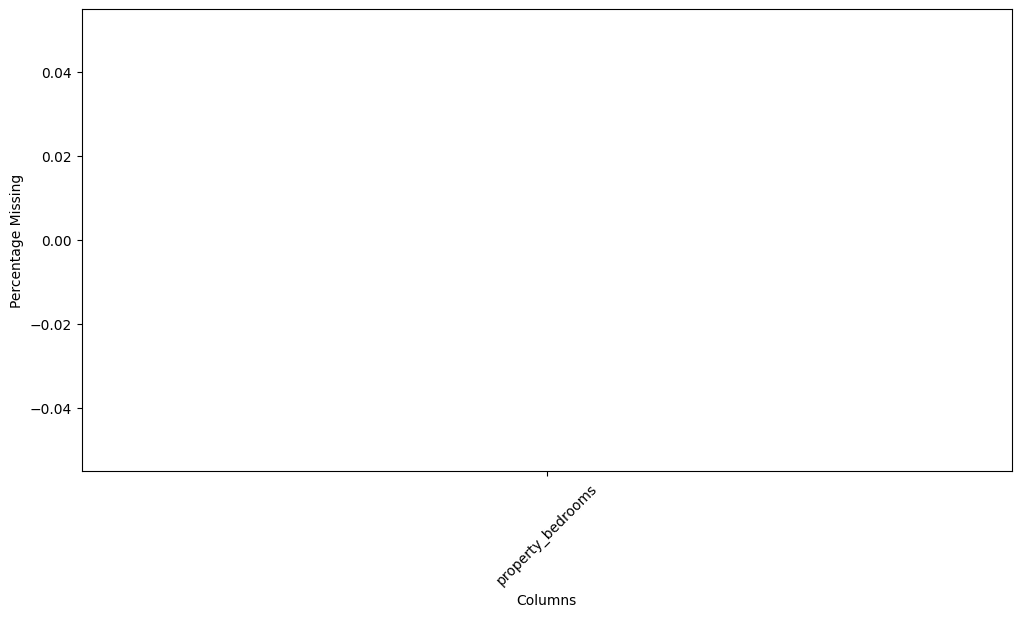

In [79]:
plot_missing_by_column(ds_train[['property_bedrooms']])

### Pre Imputación de Superficie total

property_surface_total    5.004222
dtype: float64


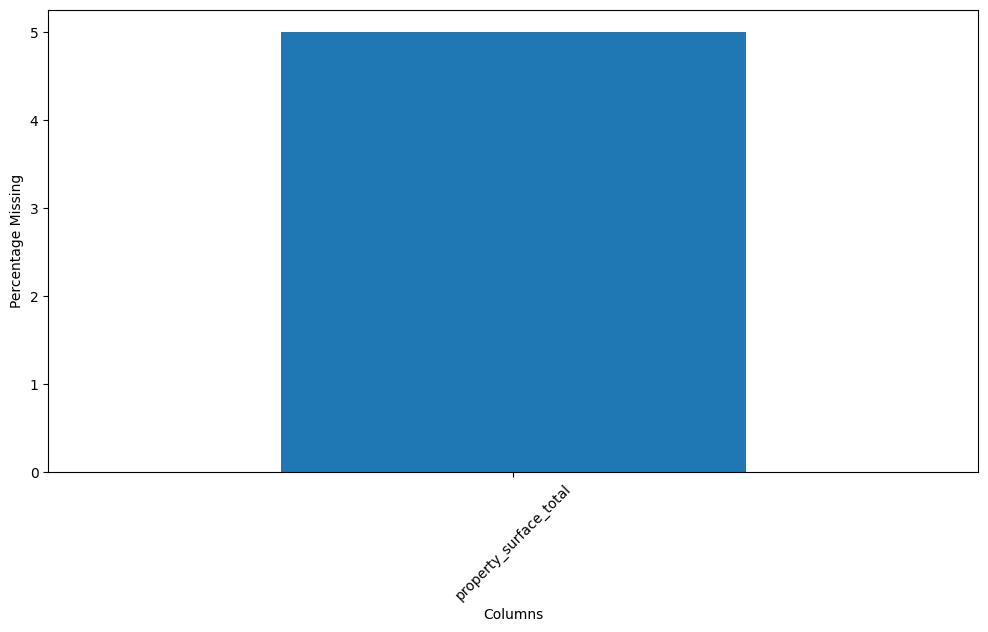

In [80]:
plot_missing_by_column(ds_train[['property_surface_total']])

Como a simple vista muchos registros tienen superficie cubierta, veremos en cuantos faltan ambos datos

In [81]:
ds_train[ds_train.property_surface_total.isna()][ds_train.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

#### Reparación de datos faltantes en superficie cubierta

Como todos los datos tienen la superficie cubierta, repararemos estos datos tomando ese valor como superficie total

In [82]:
# Train
ds_train.loc[ds_train.property_surface_total.isna(), 'property_surface_total'] = ds_train.loc[
    ds_train.property_surface_total.isna(), 'property_surface_covered']
len(ds_train.loc[ds_train.property_surface_total.isna()])

# Test
ds_test.loc[ds_test.property_surface_total.isna(), 'property_surface_total'] = ds_test.loc[
    ds_test.property_surface_total.isna(), 'property_surface_covered']
len(ds_test.loc[ds_test.property_surface_total.isna()])

0

### Post Imputación de Superficie total

property_surface_total    0.0
dtype: float64


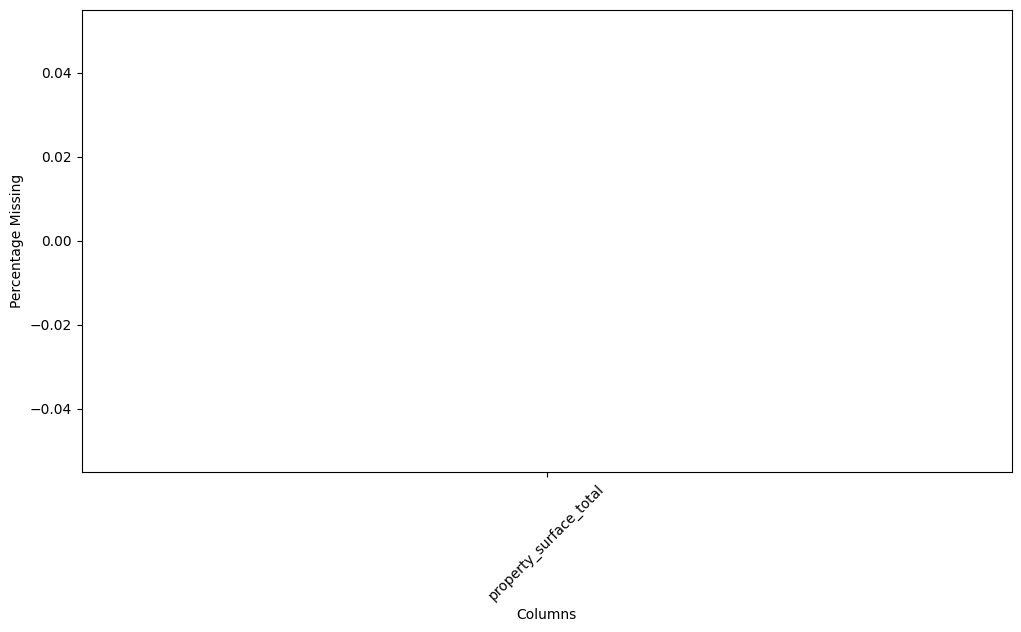

In [83]:
plot_missing_by_column(ds_train[['property_surface_total']])

### Pre Imputación de superficie cubierta

In [84]:
ds_train[ds_train.property_surface_covered.isna()]

id start_date                      end_date  \
84142   pTwkV5c6RrC8roXoOIbK3Q== 2021-02-05 2022-03-05 00:00:00.000000000   
70204   JrrzJGWzjD7AzeXufaZWHw== 2021-09-23 2022-01-27 00:00:00.000000000   
124512  IjfMC+HYS0auFkkdptO8aA== 2021-11-26 2021-12-05 00:00:00.000000000   
242589  wCgQzrJFpBMULYjaf7q1vg== 2021-04-01 2021-04-15 00:00:00.000000000   
13453   PEkVSv4G9PDqtfNh+Pjtjg== 2021-03-01 2021-06-05 00:00:00.000000000   
...                          ...        ...                           ...   
276995  Uh9LllhMC1ydm6p37uDTig== 2021-12-23 2022-03-07 12:00:03.026354504   
318122  cpt4bEjdmumHVMKIvTOJ4A== 2021-02-28 2021-06-02 00:00:00.000000000   
182310  oXPsn2rJ8VLWDS6cJQsKug== 2021-08-06 2021-12-15 00:00:00.000000000   
59962   FzPWecHlZ4+yhAMM4cmTNA== 2021-01-25 2021-05-17 00:00:00.000000000   
443032  1+V6wANuHxZJp5CEU90Elg== 2021-05-07 2021-06-05 00:00:00.000000000   

          latitud   longitud       place_l3 property_type  property_rooms  \
84142  -34.621534 -58.436695      Caballito  Departamento             3.0   
70204  -34.629193 -58.447745      Caballito  Departamento             3.0   
124512 -34.579645 -58.431355        Palermo  Departamento             2.0   
242589 -34.572893 -58.478189  Villa Urquiza  Departamento             1.0   
13453  -34.635670 -58.388558       Barracas  Departamento             3.0   
...           ...        ...            ...           ...             ...   
276995 -34.623151 -58.513376            NaN  Departamento             1.0   
318122 -34.591311 -58.401455   Barrio Norte  Departamento             2.0   
182310 -34.586645 -58.487206    Parque Chas  Departamento             1.0   
59962  -34.559804 -58.449174       Belgrano  Departamento             4.0   
443032 -34.599790 -58.390012    San Nicolás  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
84142                 2.0                    43.0                       NaN   
70204                 2.0                    60.0                       NaN   
124512                1.0                    45.0                       NaN   
242589                1.0                    45.0                       NaN   
13453                 2.0                    38.0                       NaN   
...                   ...                     ...                       ...   
276995                1.0                    38.0                       NaN   
318122                1.0                    42.0                       NaN   
182310                1.0                    44.0                       NaN   
59962                 3.0                   108.0                       NaN   
443032                1.0                    40.0                       NaN   

        property_price                                     property_title  
84142         128000.0                           Departamento - Caballito  
70204         179000.0                           Departamento - Caballito  
124512        109000.0  Bajó de precio!! 45 m2 - 2 amb con patio- Palermo  
242589        105000.0                       Departamento - Villa Urquiza  
13453          58000.0                            Departamento - Barracas  
...                ...                                                ...  
276995         68000.0                                 Departamento venta  
318122        115000.0  Amplio, Luminoso y con buena vibra en  Barrio ...  
182310         90000.0  VENTA MONOAMBIENTE EN PARQUE CHAS. MUY  LUMINO...  
59962         465000.0  Hermoso 4 amb. super luminoso. c/cochera. RECI...  
443032         87000.0                         Departamento - San Nicolas  

[2632 rows x 13 columns]

property_surface_covered    3.527346
dtype: float64


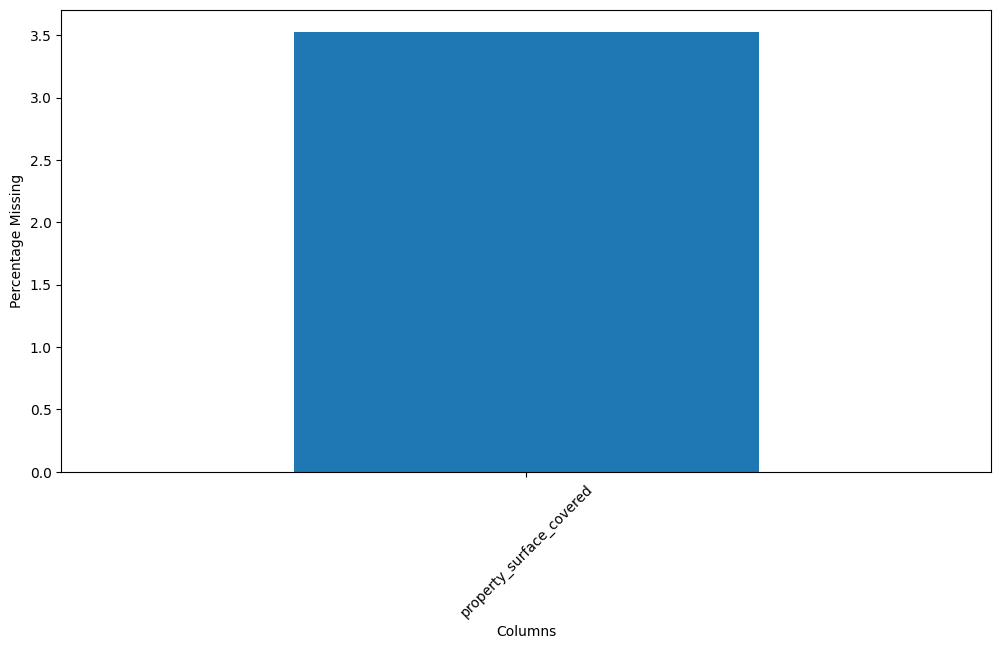

In [85]:
plot_missing_by_column(ds_train[['property_surface_covered']])

##### Reparación de datos faltantes en Superficie cubierta

Como tenemos 2672 registros nulos para la superficie cubierta, imputaremos de la misma forma los registros que son Departamentos porque su superficie total suele ser muy cercana a la cubierta

In [86]:
ds_train[ds_train.property_surface_covered.isna()].property_type.value_counts()

Departamento    2350
PH               192
Casa              90
Name: property_type, dtype: int64

In [87]:
# Test
ds_test.loc[(ds_test.property_surface_covered.isna()) & (
        ds_test.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_test.loc[(ds_test.property_surface_covered.isna()) & (ds_test.property_type == 'Departamento')])

# Train
ds_train.loc[(ds_train.property_surface_covered.isna()) & (
        ds_train.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_train.loc[(ds_train.property_surface_covered.isna()) & (ds_train.property_type == 'Departamento')])

0

In [88]:
print(f"Registros Train: {ds_train.property_surface_covered.isna().sum()}")

Registros Train: 282


In [89]:
print(f"Registros Test: {ds_test.property_surface_covered.isna().sum()}")

Registros Test: 630


Los 262 registros restantes de train los eliminaremos porque representan un porcentaje muy bajo y repararlos de esta forma puede ser impreciso.

Los 651 registros restantes de test tambien los eliminaremos porque representan un porcentaje muy bajo y repararlos de esta forma puede ser impreciso.

In [90]:
# Train
ds_train.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_train[ds_train.property_surface_covered.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_test[ds_test.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

Volvemos a evaluar el porcentaje de datos faltantes

id                          0.000000
start_date                  0.000000
end_date                    0.000000
latitud                     0.000000
longitud                    0.000000
place_l3                    0.212551
property_type               0.000000
property_rooms              0.000000
property_bedrooms           0.000000
property_surface_total      0.000000
property_surface_covered    0.000000
property_price              0.000000
property_title              0.000000
dtype: float64


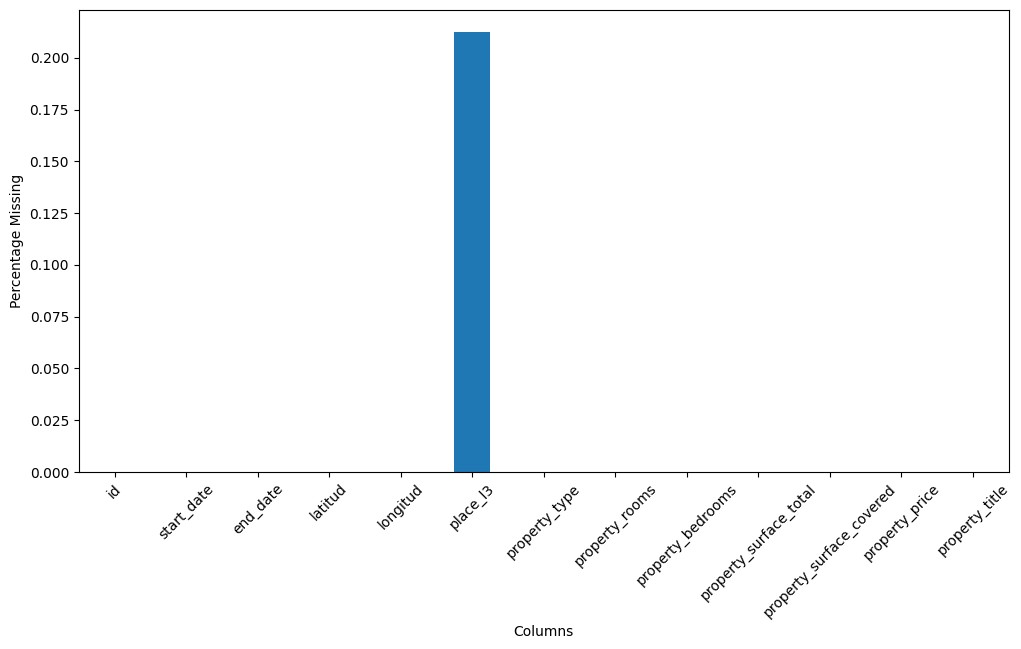

In [91]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

## Grafico de los barrios de CABA

In [92]:
# Proceso el archivo de los barrios de CABA
barrios = gpd.read_file('./barrios.geojson')
barrios.head()

NameError: name 'gpd' is not defined

In [ ]:
# Realizo el grafico de los barrios de CABA
fig, ax = plt.subplots(figsize=(8, 10))
barrios.plot(column='BARRIO', categorical=True, legend=True, ax=ax, cmap='tab20b')

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.4, 1.2))

ax.set(title='Barrios CABA')
plt.show()

## Analisis de Valores Atipicos

### Univariados

#### Metodo IQR

In [93]:
def calculate_univariate_iqr(column, dataset):
    print(f"cantidad de datos del ds: {len(dataset)}")

    # 1er cuartil para property_rooms
    q1 = column.quantile(0.25)

    # 3er cuartil para property_rooms
    q3 = column.quantile(0.75)
    med = column.median()

    # region IQR
    iqr = q3 - q1

    # Bigotes altos y bajos
    limite_superior = q3 + (1.5 * iqr)
    limite_inferior = q1 - (1.5 * iqr)

    outliers = dataset[(column <= limite_inferior) | (column >= limite_superior)]
    print(f"outliers encontrados para los {column.name}: {len(outliers)}")
    print(f"hay {len(outliers) * 100 // len(dataset)}% de outliers de {column.name} sobre el ds")
    print(f"limit sup: {limite_superior}, limite inf: {limite_inferior}")

    outliers_grafico = dataset[(column >= limite_inferior) & (column <= limite_superior)][column.name]

    plt.figure(figsize=(5, 5))
    plt.boxplot(outliers_grafico)
    plt.title(f"Boxplot de IQR para {column.name}")
    plt.show()


In [94]:
def boxplot_outliers_edges(series, moderated_outliers=True):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    if moderated_outliers:
        value = 1.5
    else:
        value = 3

    max = q3 + (value * iqr)
    min = q1 - (value * iqr)

    return min, max

In [95]:
def boxplot_with_outliers(dataset, column_name):
    column = dataset[column_name]
    moderated_min, moderated_max = boxplot_outliers_edges(column)
    severe_min, severe_max = boxplot_outliers_edges(column, moderated_outliers=False)

    print(f"Moderated outliers limits [min: {moderated_min},max: {moderated_max}]")
    print(f"Severe outliers limits [min: {severe_min},max: {severe_max}]")

    plt.figure(figsize=(5, 10))
    column.plot.box()

    plt.axhline(moderated_min, label="Moderated")
    plt.axhline(moderated_max)
    plt.axhline(severe_min, color="r", label="Severe")
    plt.axhline(severe_max, color="r")
    #plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.legend(title="Limites")

##### Ambientes

cantidad de datos del ds: 74335
outliers encontrados para los property_rooms: 1188
hay 1% de outliers de property_rooms sobre el ds
limit sup: 7.0, limite inf: -1.0


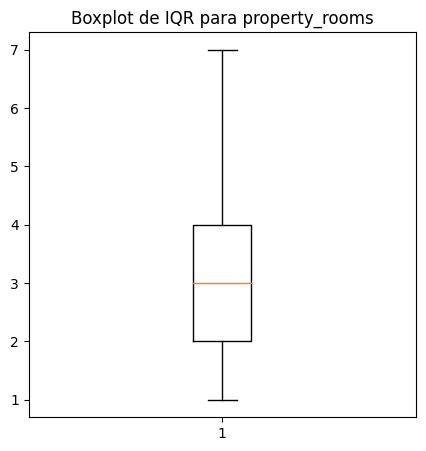

In [96]:
calculate_univariate_iqr(ds_train.property_rooms, ds_train)

Tomaremos 7 como límite superior y 0 como límite inferior ya que no tiene sentido que haya cantidad de habitaciones negativas.

In [97]:
# Train
outlier_inf_rooms_iqr_train = ds_train[ds_train['property_rooms'] < 0]
outlier_sup_rooms_iqr_train = ds_train[ds_train['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en train son: {len(outlier_inf_rooms_iqr_train)}. Constituyen al {(len(outlier_inf_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en train son: {len(outlier_sup_rooms_iqr_train)}. Constituyen al {(len(outlier_sup_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test
outlier_inf_rooms_iqr_test = ds_test[ds_test['property_rooms'] < 0]
outlier_sup_rooms_iqr_test = ds_test[ds_test['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en test son: {len(outlier_inf_rooms_iqr_test)}. Constituyen al {(len(outlier_inf_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en test son: {len(outlier_sup_rooms_iqr_test)}. Constituyen al {(len(outlier_sup_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")



Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en train son: 599. Constituyen al 0% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 130. Constituyen al 0% de los datos


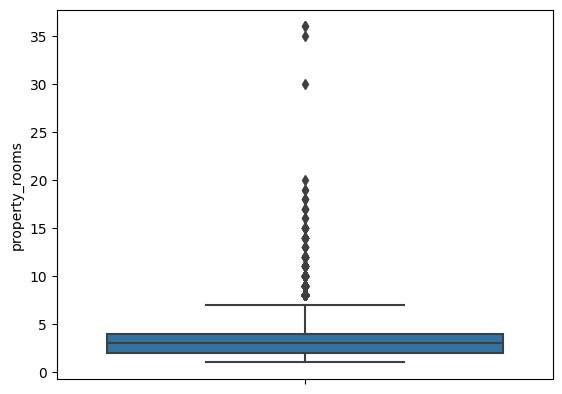

In [98]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

##### Eliminamos los ambientes que son > 7 ya que rompen la media y representan solamente a un porcentaje minúsculo del dataset (1% sobre el 100% del ds).

In [99]:
# Train
ds_train.drop(outlier_sup_rooms_iqr_train.index, inplace=True)
print(f"Los outliers sup de rooms en train post eliminacion son: {len(ds_train[ds_train['property_rooms'] > 7])}")

# Test
ds_test.drop(outlier_sup_rooms_iqr_test.index, inplace=True)
print(f"Los outliers sup de rooms en test post eliminacion son: {len(ds_test[ds_test['property_rooms'] > 7])}")

Los outliers sup de rooms en train post eliminacion son: 0
Los outliers sup de rooms en test post eliminacion son: 0


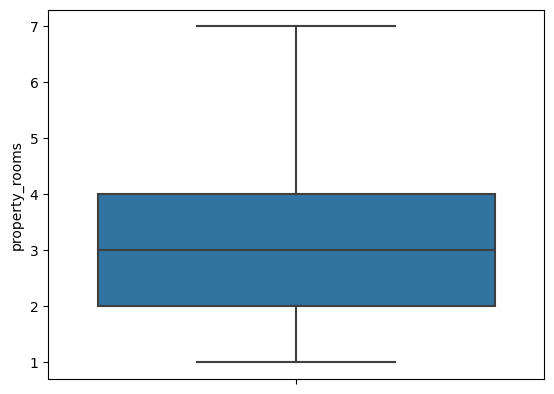

In [100]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

##### Habitaciones

Moderated outliers limits [min: -0.5,max: 3.5]
Severe outliers limits [min: -2.0,max: 5.0]


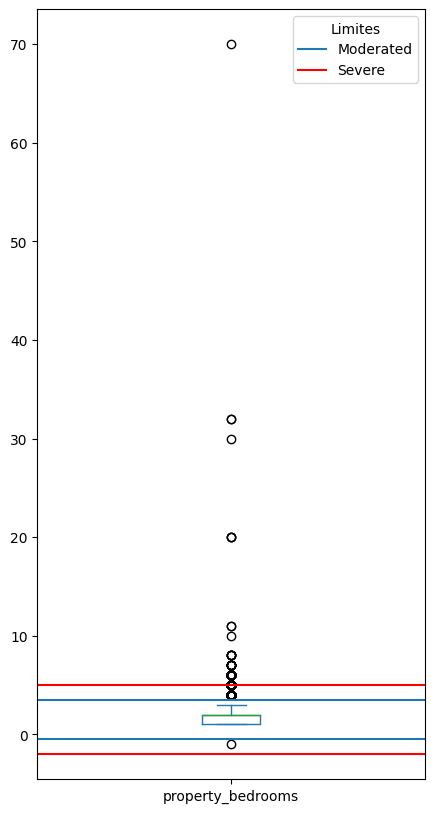

In [101]:
boxplot_with_outliers(ds_train, 'property_bedrooms')

cantidad de datos del ds: 73736
outliers encontrados para los property_bedrooms: 4395
hay 5% de outliers de property_bedrooms sobre el ds
limit sup: 3.5, limite inf: -0.5


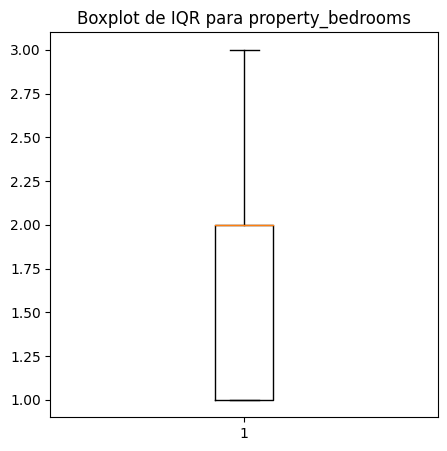

In [102]:
calculate_univariate_iqr(ds_train.property_bedrooms, ds_train)

In [103]:
# Train
outlier_inf_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_train)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_train)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test

outlier_inf_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_test)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_test)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")


Los outliers inf de bedrooms son: 1. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 27. Constituyen al 0% de los datos
Los outliers inf de bedrooms son: 0. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 7. Constituyen al 0% de los datos


###### Eliminaremos una observacion en particular que fue detectada como outlier ya que dice tener -1 habitaciones. Este valor no tiene ningun sentido logico en nuestro domino de problema.


In [104]:
# Train

print(f"fila a eliminar: {ds_train[ds_train['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_train.index
ds_train.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en train")

# Test

print(f"filas a eliminar: {ds_test[ds_test['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_test.index
ds_test.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en test")

fila a eliminar:                               id start_date   end_date    latitud   longitud  \
406880  3WI+zCCMeb9TR5kOBm7rhg== 2021-01-07 2021-03-18 -34.577595 -58.495185   

             place_l3 property_type  property_rooms  property_bedrooms  \
406880  Villa Urquiza  Departamento             2.0               -1.0   

        property_surface_total  property_surface_covered  property_price  \
406880                    61.0                      43.0        125000.0   

                                           property_title  
406880  Jardines de Roosevelt - Hermoso 3 ambientes co...  
Se han eliminado: 1 registros en train
filas a eliminar: Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []
Se han eliminado: 0 registros en test


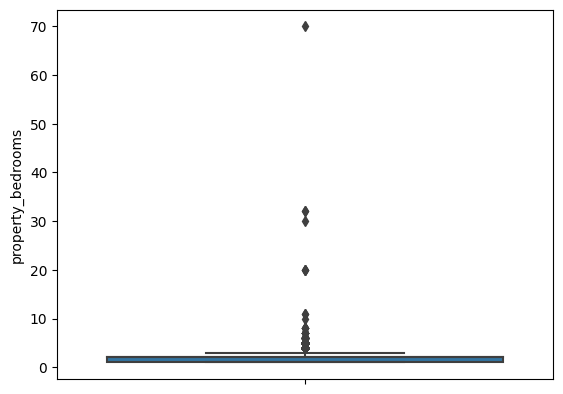

In [105]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

###### Cuando analizamos los valores atipicos detectados notamos que algunas observaciones eran mayores a los ambientes, esto no es posible en nuestro dominio de problema. Por ende, procederemos a eliminarlos. Podemos hacer esto ya que estos valores representan un valor minusculo del dataset.

In [106]:
print("Ejemplos: ")
len(f"AMB < HAB = {len(outlier_sup_bedrooms_iqr_train[outlier_sup_bedrooms_iqr_train.property_rooms < outlier_sup_bedrooms_iqr_train.property_bedrooms])}")

Ejemplos: 


14

In [107]:
# Train

indice_outlier_train = outlier_sup_bedrooms_iqr_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_bedrooms_iqr_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 27 registros en train
Se han eliminado: 7 registros en test


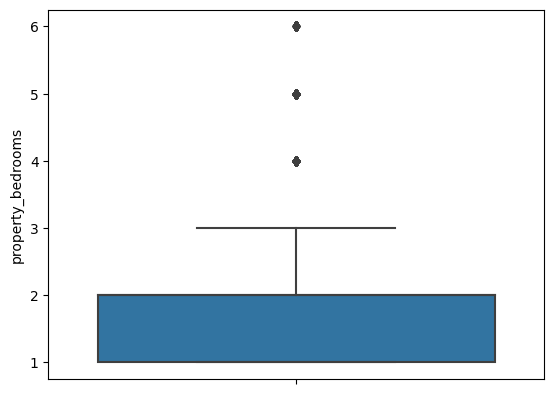

In [108]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

##### Superficie Total

cantidad de datos del ds: 73708
outliers encontrados para los property_surface_total: 5863
hay 7% de outliers de property_surface_total sobre el ds
limit sup: 186.5, limite inf: -41.5


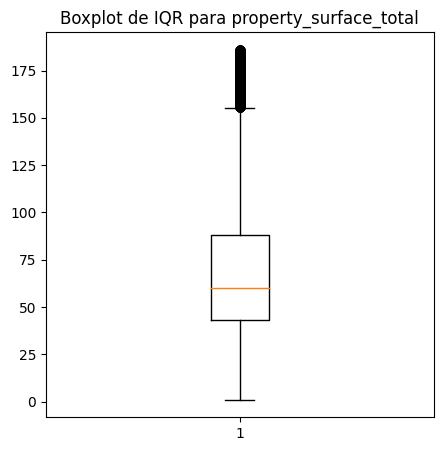

In [109]:
calculate_univariate_iqr(ds_train.property_surface_total, ds_train)

Elegimos tomar como outlier a viviendas que tengan una superifice menor a 18 ya que, en base a los documentos que leimos, este es el minimo necesario para que una persona viva en una vivienda. 18 m2 minimo. Observar los links adjuntos:

https://observatoriociudad.org/microdepartamentos-y-codigo-de-edificacion/

http://ssplan.buenosaires.gob.ar/webfiles/100_preguntas/ce_art_3_8_1_1_1_areas_y_lados_minimos_de_locales_de_vivienda_individual_y_colectiva.pdf

###### Eliminaremos las viviendas que tienen menos de 18 m2 de superficie

In [110]:
# Train

indice_outlier_train = ds_train[ds_train.property_surface_total < 18].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = ds_test[ds_test.property_surface_total < 18].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 77 registros en train
Se han eliminado: 17 registros en test


In [111]:
inf, sup = boxplot_outliers_edges(ds_train.property_surface_total, False)
print(f"Nuestro rango intercuartil está comprendido entre: {inf}, {sup}")

Nuestro rango intercuartil está comprendido entre: -127.0, 272.0


In [112]:
# Train

outlier_inf_total_iqr_train = ds_train[ds_train['property_surface_total'] < -44]
outlier_sup_total_iqr_train = ds_train[ds_train['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en train son: {len(outlier_inf_total_iqr_train)}. Constituyen al {(len(outlier_inf_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en train son: {len(outlier_sup_total_iqr_train)}. Constituyen al {(len(outlier_sup_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_inf_total_iqr_test = ds_test[ds_test['property_surface_total'] < -44]
outlier_sup_total_iqr_test = ds_test[ds_test['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en test son: {len(outlier_inf_total_iqr_test)}. Constituyen al {(len(outlier_inf_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en test son: {len(outlier_sup_total_iqr_test)}. Constituyen al {(len(outlier_sup_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")


Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en train son: 5531. Constituyen al 7% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en test son: 1395. Constituyen al 7% de los datos


Visualizamos nuevamente el box-plot para entender que valores tienen las nuevas observaciones atipicas y ver si debemos seguir eliminando

Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


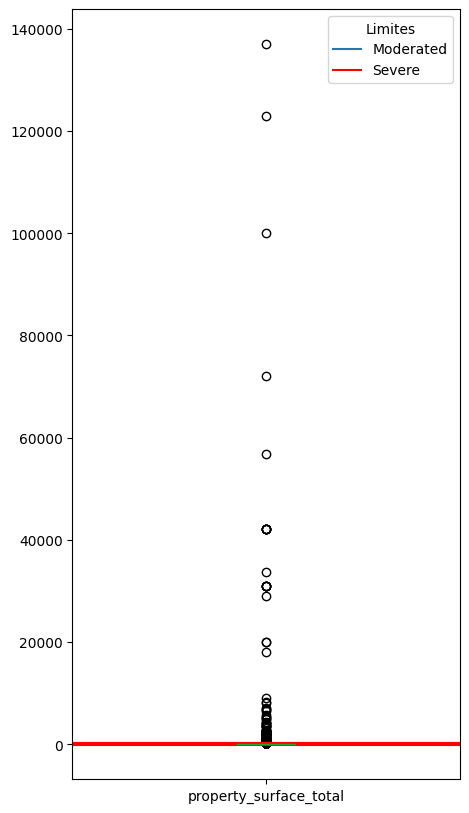

In [113]:
boxplot_with_outliers(ds_train, ds_train.property_surface_total.name)

Como tenemos outliers muy altos, el boxplot no se aprecia. Tomaremos solo los outliers severos para un primer análisis

0-272       3176
272-500     2049
500-750      198
1000-inf      86
750-1000      22
Name: property_surface_total, dtype: int64


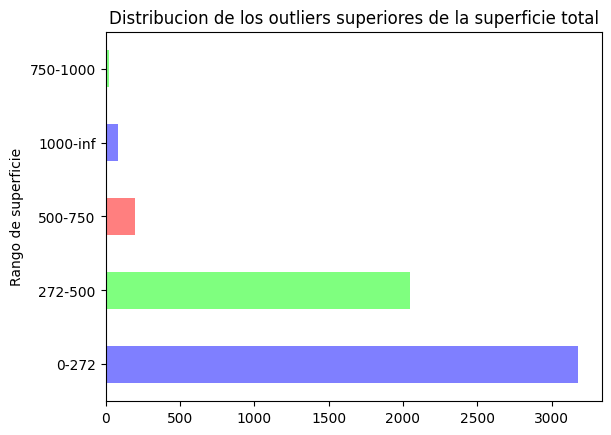

In [114]:
property_surface_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_total,
                                  bins=[0, 272, 500, 750, 1000, float("inf")],
                                  labels=["0-272", "272-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(property_surface_grouped.value_counts())
ax = property_surface_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                       title="Distribucion de los outliers superiores de la superficie total",
                                                       xlabel="Rango de superficie", ylabel="Frecuencia")

In [115]:
surface_median = ds_train[ds_train.property_type == 'Casa'].property_surface_total.median()
print(
    f"Si bien la mediana de la superficite total es {surface_median} y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500")

Si bien la mediana de la superficite total es 222.0 y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500


In [116]:
# Train

outlier_sup_total_500_train = ds_train[ds_train['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en train son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_train[ds_train['property_surface_total'] > 500]) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_sup_total_500_test = ds_test[ds_test['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en test son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_test[ds_test['property_surface_total'] > 500]) * 100) // len(ds_test.property_surface_total)}% de los datos")

Los outliers superiores de sup total en train son: 306. Constituyen al 0% de los datos
Los outliers superiores de sup total en test son: 306. Constituyen al 0% de los datos


Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


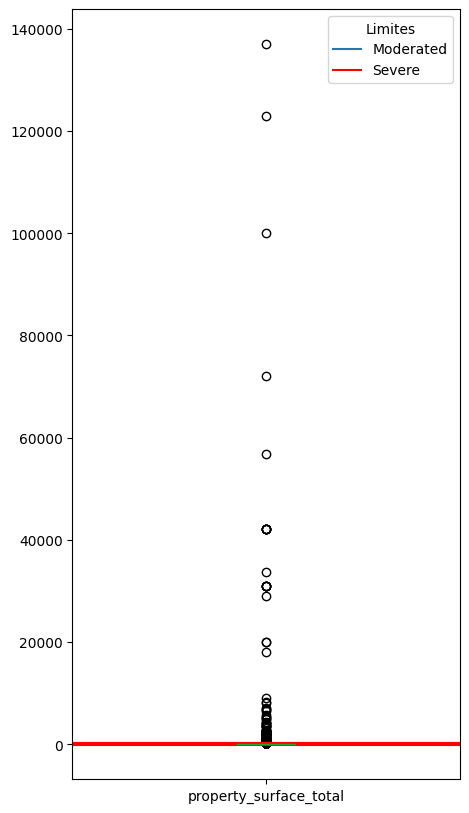

In [117]:
boxplot_with_outliers(ds_train, 'property_surface_total')

###### Procederemos a eliminar las superifices mayores a 500m^2

In [118]:
# Train

indice_outlier_train = outlier_sup_total_500_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_total_500_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 306 registros en train
Se han eliminado: 61 registros en test


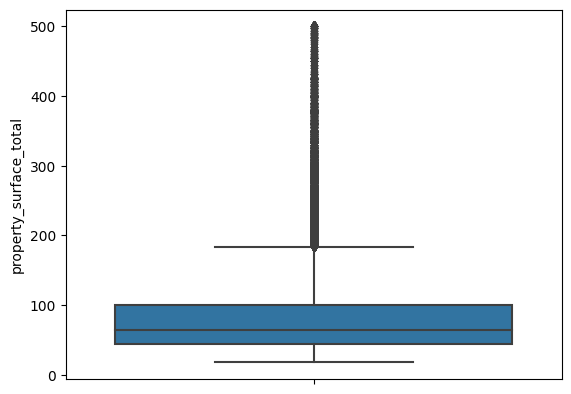

In [119]:
sns.boxplot(y=ds_train.property_surface_total)
plt.show()

##### Superficie cubierta

cantidad de datos del ds: 73325
outliers encontrados para los property_surface_covered: 5780
hay 7% de outliers de property_surface_covered sobre el ds
limit sup: 155.0, limite inf: -29.0


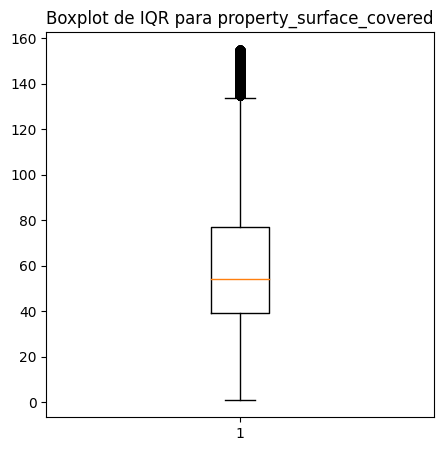

In [120]:
calculate_univariate_iqr(ds_train.property_surface_covered, ds_train)

In [121]:
# Train

outlier_inf_covered_iqr_train = ds_train[ds_train['property_surface_covered'] < 0]
outlier_sup_covered_iqr_train = ds_train[ds_train['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en train son: {len(outlier_inf_covered_iqr_train)}. Constituyen al {(len(outlier_inf_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en train son: {len(outlier_sup_covered_iqr_train)}. Constituyen al {(len(outlier_sup_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")

# Test

outlier_inf_covered_iqr_test = ds_test[ds_test['property_surface_covered'] < 0]
outlier_sup_covered_iqr_test = ds_test[ds_test['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en test son: {len(outlier_inf_covered_iqr_test)}. Constituyen al {(len(outlier_inf_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en test son: {len(outlier_sup_covered_iqr_test)}. Constituyen al {(len(outlier_sup_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")

Los outliers inf de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en train son: 5686. Constituyen al 7% de los datos
Los outliers inf de sup cubierta en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en test son: 1391. Constituyen al 7% de los datos


Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


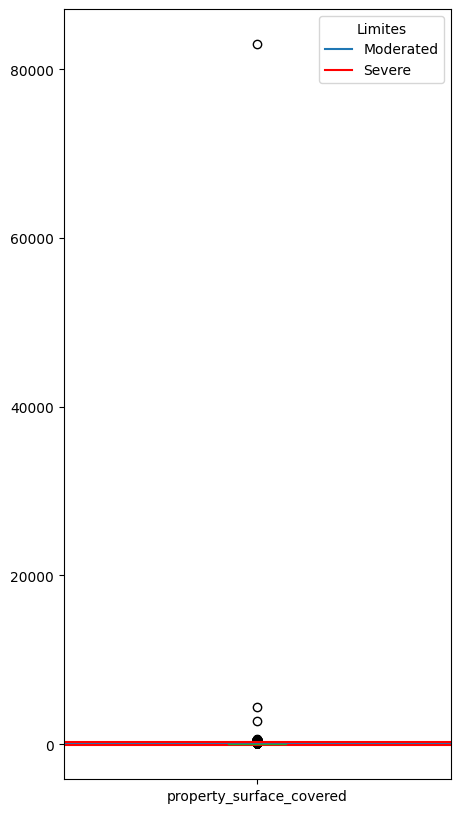

In [122]:
boxplot_with_outliers(ds_train, 'property_surface_covered')

Como hay algunas observacion demasiado anómalas, las excluímos para ver mejor

Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


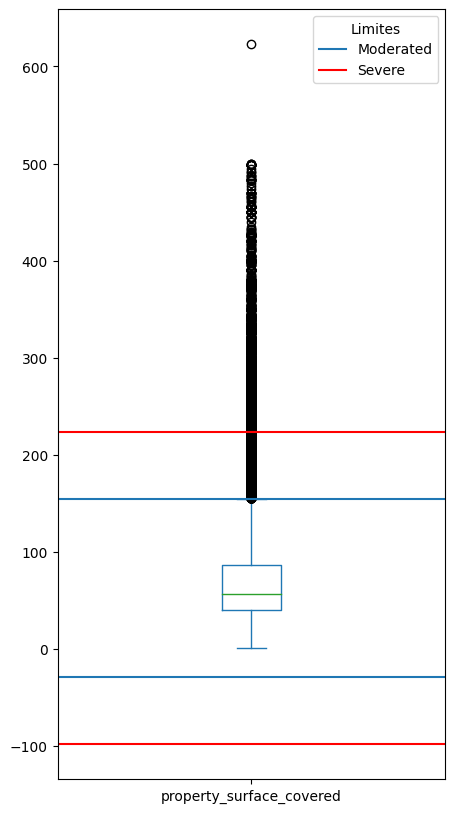

In [123]:
boxplot_with_outliers(ds_train[ds_train.property_surface_covered < 750], 'property_surface_covered')

0-224       3095
224-500     2348
500-750       62
1000-inf      16
750-1000      10
Name: property_surface_covered, dtype: int64


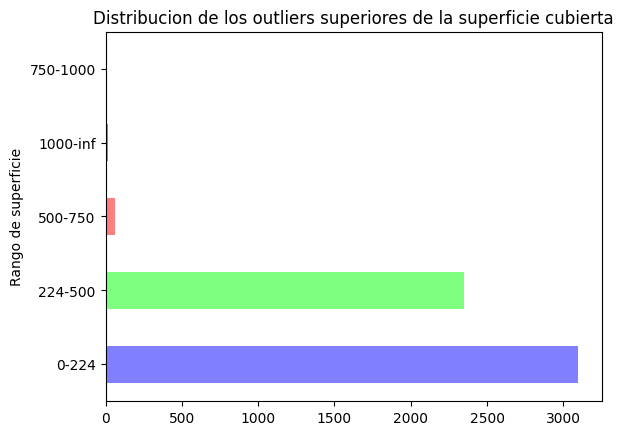

In [124]:
surface_total_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_covered,
                               bins=[0, 224, 500, 750, 1000, float("inf")],
                               labels=["0-224", "224-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(surface_total_grouped.value_counts())
ax = surface_total_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                    title="Distribucion de los outliers superiores de la superficie cubierta",
                                                    xlabel="Rango de superficie", ylabel="Frecuencia")

Inspeccionaremos los datos que se encuentran entre 224 y 500 $m^2$ de superficie cubierta

###### Como decidimos tomar como maximo valor de superificie total 500m^2, ese tambien va a ser nuestro maximo limite para la superificie cubierta para mantener la coherencia y el sentido en nuestro dominio. Procederemos a eliminar los valores que se encuentren por arriba. 

In [125]:
# Train

outlier_sup_cubierta_500 = ds_train[ds_train['property_surface_covered'] > 500]
indice_outlier_train = outlier_sup_cubierta_500.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

outlier_sup_cubierta_500 = ds_test[ds_test['property_surface_covered'] > 500]
indice_outlier_test = outlier_sup_cubierta_500.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 4 registros en train
Se han eliminado: 3 registros en test


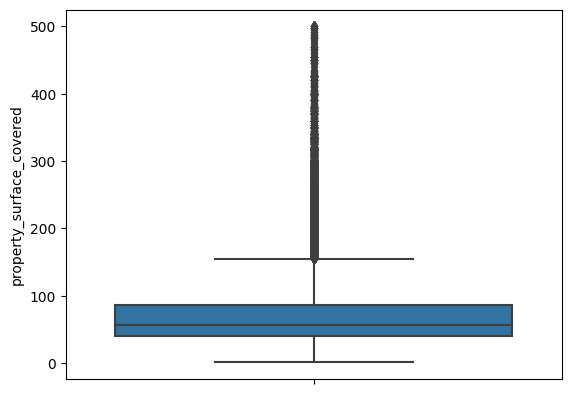

In [126]:
sns.boxplot(y=ds_train.property_surface_covered)
plt.show()

##### Latitud y longitud

cantidad de datos del ds: 73321
outliers encontrados para los latitud: 422
hay 0% de outliers de latitud sobre el ds
limit sup: -34.5201351, limite inf: -34.6724431


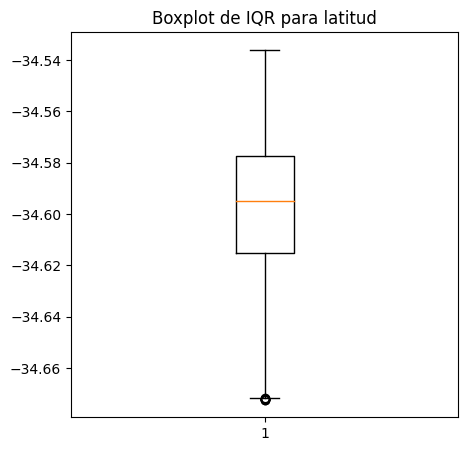

In [127]:
calculate_univariate_iqr(ds_train.latitud, ds_train)

cantidad de datos del ds: 73321
outliers encontrados para los longitud: 87
hay 0% de outliers de longitud sobre el ds
limit sup: -58.324872549999995, limite inf: -58.54966975000001


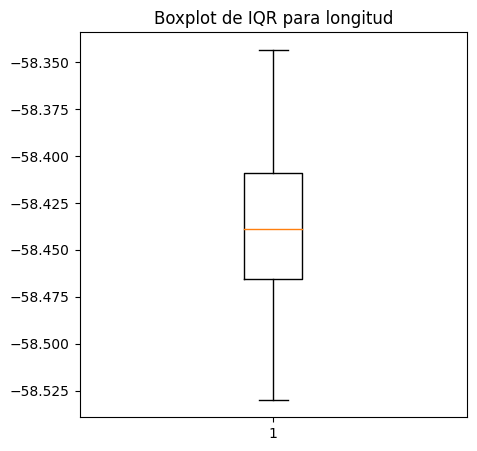

In [128]:
calculate_univariate_iqr(ds_train.longitud, ds_train)

Los datos de latitud y longitud son dificiles de analizar por medio del rango intercuartil dado que los datos representan variaciones muy pequeñas y no son faciles de imaginar sin una ubicación en el mapa. Haremos este análisis más adelante.

In [129]:
# Train

outlier_inf_latitud_iqr_train = ds_train[ds_train['latitud'] < -34]
outlier_sup_latitud_iqr_train = ds_train[ds_train['latitud'] > -34]
print(
    f"Los outliers inf de latitud en train son: {len(outlier_inf_latitud_iqr_train)}. Constituyen al {(len(outlier_inf_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en train son: {len(outlier_sup_latitud_iqr_train)}. Constituyen al {(len(outlier_sup_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")

# Test

outlier_inf_latitud_iqr_test = ds_test[ds_test['latitud'] < -34]
outlier_sup_latitud_iqr_test = ds_test[ds_test['latitud'] > -34]
print(
    f"Los outliers inf de latitud en test son: {len(outlier_inf_latitud_iqr_test)}. Constituyen al {(len(outlier_inf_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en test son: {len(outlier_sup_latitud_iqr_test)}. Constituyen al {(len(outlier_sup_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")

Los outliers inf de latitud en train son: 73245. Constituyen al 99% de los datos
Los outliers sup de latitud en train son: 76. Constituyen al 0% de los datos
Los outliers inf de latitud en test son: 17754. Constituyen al 99% de los datos
Los outliers sup de latitud en test son: 20. Constituyen al 0% de los datos


#### Metodo Z score

In [130]:
def calculate_zscore_st(dataset, column):
    dataset_copy = dataset.copy()
    media = np.mean(column)
    std = np.std(column)
    dataset_copy[f'z_{column.name}'] = (column - media) / std
    return dataset_copy

Analisis de outliers con el metodo zscore para los ambientes

##### Ambientes

In [131]:
z_rooms_ds = calculate_zscore_st(ds_train, ds_train.property_rooms)

Verificamos si se cumple la regla de oro para el caso de la variable Rooms

In [132]:
# Train

print(
    f"Los outliers sup de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test

print(
    f"Los outliers sup de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers sup de rooms en train son: 531. Constituyen al 0% de los datos
Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 531. Constituyen al 2% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos


Aunque Zscore haya encontrado outliers, no consideramos que haya algun motivo valido para borrar estos datos. Por otro lado, corrimos Zscore modificado y despues de haber borrado los outliers por el metodo de IQR, no detecto ningun outlier. Proseguiremos sin borrar mas nada para rooms

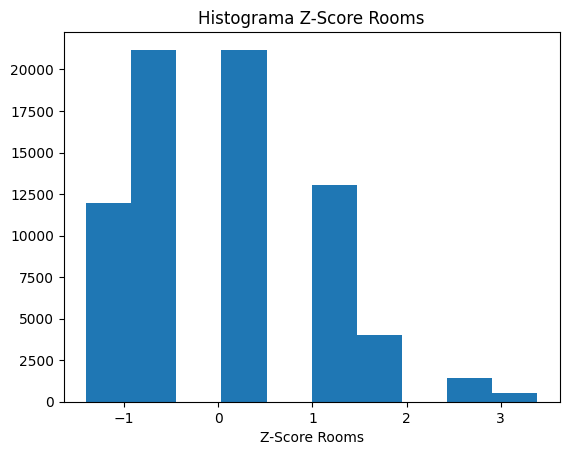

In [133]:
plt.hist(z_rooms_ds.z_property_rooms)
plt.title('Histograma Z-Score Rooms')
plt.xlabel('Z-Score Rooms')
plt.show()

##### Habitaciones

In [134]:
z_bedrooms_ds = calculate_zscore_st(ds_train, ds_train.property_bedrooms)

In [135]:
# Train

print(
    f"Los outliers sup de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

print(
    f"Los outliers sup de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

Los outliers sup de bedrooms en train son: 661.Constituyen al 0% de los datos
Los outliers sup de bedrooms en test son: 661.Constituyen al 3% de los datos


id start_date                      end_date  \
6878    i/egGqeX0B/k/wEBXyBKrw== 2021-02-09 2021-04-24 12:00:03.026354504   
163123  +o86l6OZMfiF8AVZ+CMHkA== 2021-11-28 2022-01-27 00:00:00.000000000   
44111   1T+ZhhIJYiEmAlDd/9fKkg== 2021-11-23 2021-12-04 00:00:00.000000000   
322682  +nDjyS/WOwTI/P9/mHyAyQ== 2021-06-15 2021-08-28 12:00:03.026354504   
254809  8OaCr2R2WeaN8VN29d4BQw== 2021-08-20 2021-09-11 00:00:00.000000000   
...                          ...        ...                           ...   
186090  peC16weaVj/dxDi1xfn0Xw== 2021-08-07 2022-03-29 00:00:00.000000000   
179137  CUa3qxrSKY3m3Sm5/4ejXQ== 2021-09-27 2021-11-10 00:00:00.000000000   
249281  CMSIlaGhb21q2k8CUtnlUQ== 2021-04-29 2021-09-02 00:00:00.000000000   
262760  lkWxxqKpmI8XnJF/xXP1ag== 2021-11-20 2022-08-03 00:00:00.000000000   
23961   ZxzM5p0ZGYTh8ecm0mV9ug== 2021-05-03 2021-06-05 00:00:00.000000000   

          latitud   longitud       place_l3 property_type  property_rooms  \
6878   -34.641094 -58.377395       Barracas          Casa             6.0   
163123 -34.592078 -58.396134       Recoleta  Departamento             6.0   
44111  -34.592623 -58.378420       Recoleta  Departamento             6.0   
322682 -34.622785 -58.459926         Flores  Departamento             6.0   
254809 -34.610046 -58.361382  Puerto Madero  Departamento             7.0   
...           ...        ...            ...           ...             ...   
186090 -34.609893 -58.414915        Almagro  Departamento             5.0   
179137 -34.562445 -58.453890       Belgrano  Departamento             6.0   
249281 -34.629535 -58.383354   Constitución          Casa             6.0   
262760 -34.611644 -58.379033      Monserrat  Departamento             6.0   
23961  -34.570631 -58.499003  Villa Urquiza          Casa             7.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
6878                  5.0                   275.0                     275.0   
163123                5.0                   203.0                     203.0   
44111                 5.0                   360.0                     360.0   
322682                5.0                   280.0                     280.0   
254809                5.0                   420.0                     420.0   
...                   ...                     ...                       ...   
186090                5.0                   249.0                     235.0   
179137                5.0                   270.0                     240.0   
249281                5.0                   141.0                     128.0   
262760                5.0                   145.0                     145.0   
23961                 6.0                   340.0                     310.0   

        property_price                                     property_title  \
6878          590000.0  Espectacular casa en terreno propio   6 ambien...   
163123        390000.0  Excelente piso antiguo de 6 ambientes! Santa F...   
44111        1100000.0  Departamento - PALACIO ESTRUGAMOU - 360 METROS...   
322682        330000.0                              Departamento - Flores   
254809       3200000.0                       Departamento - Puerto Madero   
...                ...                                                ...   
186090        435000.0    Departamento de 6 ambientes en Venta en Almagro   
179137        690000.0  Venta-Departamento -6 ambientes -Belgrano-Segu...   
249281         79000.0   OPORTUNIDAD VENTA CASA 6 AMBIENTES CONSTITUCION    
262760        195000.0                                 Departamento venta   
23961         426000.0  CASA · 7 AMBIENTES · CERETTI AL 3200 · VILLA U...   

        z_property_bedrooms  
6878               3.289652  
163123             3.289652  
44111              3.289652  
322682             3.289652  
254809             3.289652  
...                     ...  
186090             3.289652  
179137             3.289652  
249281             3.289652  
262760

In [136]:
# Train

print(
    f"Los outliers inf de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

# Test

print(
    f"Los outliers inf de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

Los outliers inf de bedrooms en train son: 0.Constituyen al 0% de los datos
Los outliers inf de bedrooms en test son: 0.Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_bedrooms]
Index: []

Mismo caso que para los rooms, al haber borrado los outliers de bedrooms por el metodo IQR notamos que al correr Zscore modificado ya no hay outliers aunque Zscore si detecta algunos. No los eliminaremos porque tras analizar el dataset resultante no vemos ningun valor extraño en nuestro dominio.

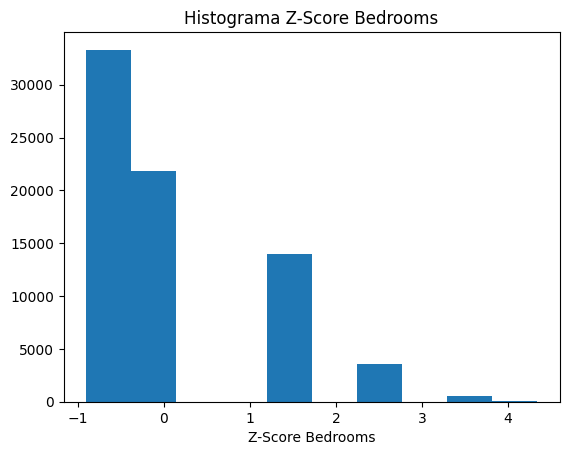

In [137]:
plt.hist(z_bedrooms_ds.z_property_bedrooms)
plt.title('Histograma Z-Score Bedrooms')
plt.xlabel('Z-Score Bedrooms')
plt.show()

##### Superficie Total

In [138]:
z_total_ds = calculate_zscore_st(ds_train, ds_train.property_surface_total)

In [139]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

Los outliers superiores de sup total en train son: 1848. Constituyen al 2% de los datos
Los outliers superiores de sup total en test son: 1848. Constituyen al 10% de los datos


id start_date   end_date    latitud   longitud  \
44111   1T+ZhhIJYiEmAlDd/9fKkg== 2021-11-23 2021-12-04 -34.592623 -58.378420   
145849  xcdhdsuMpC5qrVM8oqYe5Q== 2021-08-30 2021-10-08 -34.566995 -58.446433   
74891   Wp9yR5OBHwSTsnsL49OY7Q== 2021-01-24 2021-02-15 -34.596275 -58.394813   
254809  8OaCr2R2WeaN8VN29d4BQw== 2021-08-20 2021-09-11 -34.610046 -58.361382   
47899   hmMCvRAKwEvc4ZcAcM8mqQ== 2021-03-14 2021-05-03 -34.570631 -58.499003   

             place_l3 property_type  property_rooms  property_bedrooms  \
44111        Recoleta  Departamento             6.0                5.0   
145849       Belgrano  Departamento             5.0                4.0   
74891        Recoleta  Departamento             6.0                3.0   
254809  Puerto Madero  Departamento             7.0                5.0   
47899   Villa Urquiza          Casa             7.0                6.0   

        property_surface_total  property_surface_covered  property_price  \
44111                    360.0                     360.0       1100000.0   
145849                   349.0                     349.0       1390000.0   
74891                    312.0                     264.0        580000.0   
254809                   420.0                     420.0       3200000.0   
47899                    340.0                     310.0        450000.0   

                                           property_title  \
44111   Departamento - PALACIO ESTRUGAMOU - 360 METROS...   
145849  U$S 1.390.000  - 5 amb - Family - 2 Dep. y 2 C...   
74891   VENTA DEPARTAMENTO 6 AMBIENTES RECOLETA DUPLEX...   
254809                       Departamento - Puerto Madero   
47899   CASA · 7 AMBIENTES · CERETTI AL 3200 · VILLA U...   

        z_property_surface_total  
44111                   4.172208  
145849                  4.004866  
74891                   3.441985  
254809                  5.084987  
47899                   3.867949

In [140]:
# Train

print(
    f"Los outliers inf de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

# Test

print(
    f"Los outliers inf de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_total]
Index: []

Los valores que nos devolvio el metodo Zscore como outliers son aquellas viviendas que tienen mas de 200 m^2 pero que nosotros en el analisis de IQR decidimos mantener. No lo vamos a borrar por lo explicado anteriormente

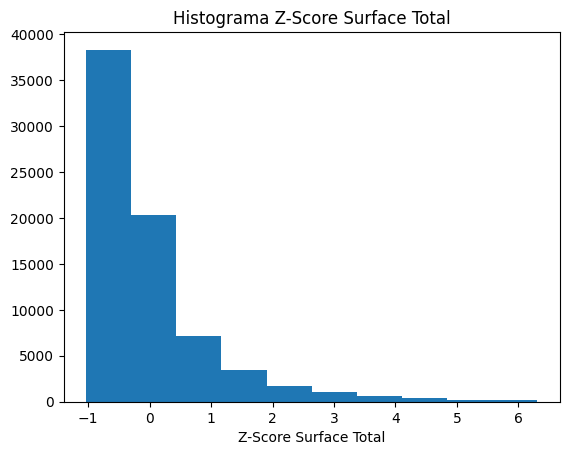

In [141]:
plt.hist(z_total_ds.z_property_surface_total)
plt.title('Histograma Z-Score Surface Total')
plt.xlabel('Z-Score Surface Total')
plt.show()

##### Superficie Cubierta

In [142]:
z_covered_ds = calculate_zscore_st(ds_train, ds_train.property_surface_covered)

In [143]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

Los outliers superiores de sup cubierta en train son: 1773. Constituyen al 2% de los datos
Los outliers superiores de sup cubierta en test son: 1773. Constituyen al 9% de los datos


id start_date                      end_date  \
6878    i/egGqeX0B/k/wEBXyBKrw== 2021-02-09 2021-04-24 12:00:03.026354504   
44111   1T+ZhhIJYiEmAlDd/9fKkg== 2021-11-23 2021-12-04 00:00:00.000000000   
145849  xcdhdsuMpC5qrVM8oqYe5Q== 2021-08-30 2021-10-08 00:00:00.000000000   
322682  +nDjyS/WOwTI/P9/mHyAyQ== 2021-06-15 2021-08-28 12:00:03.026354504   
256239  IvfKKaLDNDWPzLyjLXODVw== 2021-11-03 2022-02-02 00:00:00.000000000   
...                          ...        ...                           ...   
126056  4HDbubf9xJuD+g6pZcaycA== 2021-10-05 2022-01-27 00:00:00.000000000   
46470   P7oztioGl6T9JMYCIUPdag== 2021-04-21 2021-05-22 00:00:00.000000000   
271198  vvuW8UrdDT0VnDQ5ZgBcxA== 2021-07-13 2021-08-18 00:00:00.000000000   
147404  RlXQQ4E+2d9wZClLvuu9sQ== 2021-08-19 2021-11-01 12:00:03.026354504   
23961   ZxzM5p0ZGYTh8ecm0mV9ug== 2021-05-03 2021-06-05 00:00:00.000000000   

          latitud   longitud       place_l3 property_type  property_rooms  \
6878   -34.641094 -58.377395       Barracas          Casa             6.0   
44111  -34.592623 -58.378420       Recoleta  Departamento             6.0   
145849 -34.566995 -58.446433       Belgrano  Departamento             5.0   
322682 -34.622785 -58.459926         Flores  Departamento             6.0   
256239 -34.583213 -58.405903        Palermo  Departamento             5.0   
...           ...        ...            ...           ...             ...   
126056 -34.576741 -58.404830        Palermo  Departamento             5.0   
46470  -34.580739 -58.398251        Palermo  Departamento             6.0   
271198 -34.566409 -58.432300        Palermo  Departamento             7.0   
147404 -34.578787 -58.406842        Palermo  Departamento             7.0   
23961  -34.570631 -58.499003  Villa Urquiza          Casa             7.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
6878                  5.0                   275.0                     275.0   
44111                 5.0                   360.0                     360.0   
145849                4.0                   349.0                     349.0   
322682                5.0                   280.0                     280.0   
256239                3.0                   266.0                     266.0   
...                   ...                     ...                       ...   
126056                4.0                   316.0                     300.0   
46470                 2.0                   248.0                     248.0   
271198                4.0                   498.0                     498.0   
147404                3.0                   265.0                     260.0   
23961                 6.0                   340.0                     310.0   

        property_price                                     property_title  \
6878          590000.0  Espectacular casa en terreno propio   6 ambien...   
44111        1100000.0  Departamento - PALACIO ESTRUGAMOU - 360 METROS...   
145849       1390000.0  U$S 1.390.000  - 5 amb - Family - 2 Dep. y 2 C...   
322682        330000.0                              Departamento - Flores   
256239       1390000.0                            1 - Diaz Cnel. Av. 2500   
...                ...                                                ...   
126056       3700000.0       Torre LE PARC Alcorta 4 ambientes piso alto!   
46470        1100000.0  VENTA: Encantador piso bajo con muy importante...   
271198       2500000.0  VENTA PISO ALTO 500 m2 con excelente vista Río...   
147404       1150000.0  Excelente Piso alto sobre Avda. del Libertador...   
23961         426000.0  CASA · 7 AMBIENTES · CERETTI AL 3200 · VILLA U...   

        z_property_surface_covered  
6878                      3.575136  
44111                     5.092081  
145849                    4.895771  
322682                    3.664368  
256239                    3.414518  
...                            ...  
126056                    4.021296  
46470     

In [144]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_covered]
Index: []

Los outliers encontrados por Zscore son los valores que decidimos mantener. Se encuentran en el rango de > 200m^2 y < 500m^2. No eliminaremos nada. 

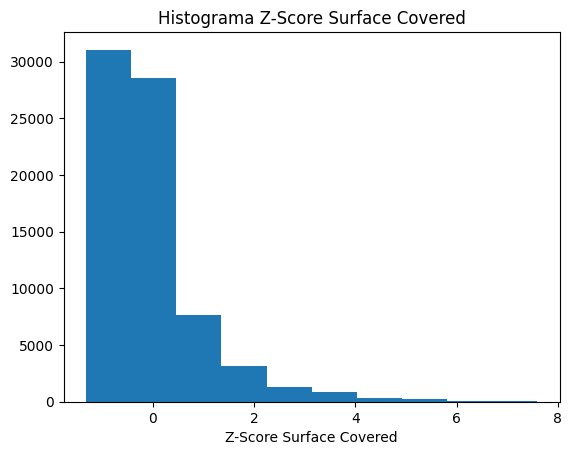

In [145]:
plt.hist(z_covered_ds.z_property_surface_covered)
plt.title('Histograma Z-Score Surface Covered')
plt.xlabel('Z-Score Surface Covered')
plt.show()

##### Latitud y Longitud

In [146]:
z_latitud_ds = calculate_zscore_st(ds_train, ds_train.latitud)

In [147]:
# Train

print(
    f"Los outliers superiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

# Test

print(
    f"Los outliers superiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

Los outliers superiores de latitud en train son: 78. Constituyen al 0% de los datos
Los outliers superiores de latitud en test son: 78. Constituyen al 0% de los datos


id start_date                      end_date  \
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 00:00:00.000000000   
102563  2RElZjaDk7sMtqYaODP8PA== 2021-05-28 2021-06-05 00:00:00.000000000   
284385  VI55L0vKxTBvvMD4h0MjWQ== 2021-02-24 2021-03-29 00:00:00.000000000   
32755   pB1BY0UXXU7cfX6YqEVZ+A== 2021-02-08 2021-04-23 12:00:03.026354504   
138208  rH7O71AzCmR6suehzNkPQQ== 2021-07-15 2021-07-31 00:00:00.000000000   
...                          ...        ...                           ...   
131209  pa9/Vy4bCIi4iu1MbNMUng== 2021-05-27 2021-06-05 00:00:00.000000000   
32740   nOBxQPld60VNJ2F6dcVY3w== 2021-02-08 2021-03-18 00:00:00.000000000   
225660  OlSMVXL0J9CACcKoIk2ZVA== 2021-01-09 2021-01-10 00:00:00.000000000   
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 00:00:00.000000000   
232782  oomNDfWx0vNNdjgZos7TBg== 2021-03-20 2021-06-05 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
173667 -27.631190 -55.496357      NaN  Departamento             4.0   
102563 -32.962151 -60.646585      NaN  Departamento             1.0   
284385 -33.081030 -68.468140      NaN  Departamento             3.0   
32755  -32.967756 -60.671092      NaN  Departamento             5.0   
138208 -31.465924 -64.418035      NaN          Casa             2.0   
...           ...        ...      ...           ...             ...   
131209 -31.448986 -60.930366      NaN  Departamento             4.0   
32740  -31.678900 -63.879640      NaN          Casa             4.0   
225660 -29.140755 -59.638836      NaN          Casa             3.0   
220851 -27.581620 -56.682310      NaN          Casa             4.0   
232782 -31.632518 -65.055367      NaN  Departamento             5.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
173667                3.0                    98.0                      88.0   
102563                1.0                    47.0                      47.0   
284385                2.0                    62.0                      57.0   
32755                 3.0                   150.0                     150.0   
138208                1.0                   500.0                     100.0   
...                   ...                     ...                       ...   
131209                2.0                   150.0                     150.0   
32740                 3.0                   405.0                     160.0   
225660                2.0                   110.0                      76.0   
220851                2.0                   105.0                     105.0   
232782                3.0                   130.0                     130.0   

        property_price                                     property_title  \
173667        269000.0  Venta departamento 4 amb Vicente Lopez con cochea   
102563         59000.0            Departamento en venta de un dormitorio    
284385         88000.0   VENTA SAN MARTIN DEPARTAMENTO 3 AMB MUY LUMINOSO   
32755          75000.0  OPORTUNIDAD!!! departamento planta baja tres d...   
138208         80000.0  CASA EN VENTA · 2 AMBIENTES · VILLA SIERRAS DE...   
...                ...                                                ...   
131209        200000.0  SE VENDE SEMIPISO DE CATEGORÍA EN EL CENTRO DE...   
32740         190000.0  Alquiler cada 4 amb B°Los Arces,La Cañada de P...   
225660         87000.0  Venta  Casa duplex 3 amb con altillo, patio, c...   
220851        190000.0       Casa jardín 2 dorm escrit. a 1 cdra Estación   
232782         40000.0   421- Dos departamentos al frente de la plaza ...   

        z_latitud  
173667  45.063267  
102563  10.558398  
284385   9.788946  
32755   10.522117  
138208  20.242788  
...           ...  
131209  20.352421  
32740   18.864292  
225660  35.292544  
220851  45.384111  
232782  19.164504  

[78 rows x 14 columns]

In [148]:
# Train

print(
    f"Los outliers inferiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

# Test

print(
    f"Los outliers inferiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

Los outliers inferiores de latitud en train son: 9. Constituyen al 0% de los datos
Los outliers inferiores de latitud en test son: 9. Constituyen al 0% de los datos


id start_date                      end_date  \
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 12:00:03.026354504   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 00:00:00.000000000   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   
324200  SSbx+/6MNgxE6rIDYPA0+A== 2021-03-03 2021-06-05 00:00:00.000000000   
155333  j+0Iyd6D8YGQxE3u+nJiQQ== 2021-04-05 2021-04-15 00:00:00.000000000   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 00:00:00.000000000   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 00:00:00.000000000   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
208085 -41.085373 -71.185766      NaN  Departamento             2.0   
106288 -40.131723 -71.299436      NaN  Departamento             2.0   
106297 -41.086352 -71.185720      NaN  Departamento             2.0   
324200 -38.940227 -68.073865      NaN  Departamento             3.0   
155333 -41.164123 -71.415420      NaN          Casa             3.0   
410404 -38.964493 -68.075830      NaN          Casa             7.0   
457631 -53.788624 -67.718089      NaN  Departamento             3.0   
105792 -41.084900 -71.187159      NaN  Departamento             1.0   
131188 -41.083002 -71.182747      NaN  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
208085                1.0                    60.0                      50.0   
106288                1.0                    44.0                      44.0   
106297                1.0                    53.0                      53.0   
324200                2.0                    55.0                      55.0   
155333                2.0                    70.0                      70.0   
410404                5.0                   218.0                     218.0   
457631                2.0                   121.0                     100.0   
105792                1.0                    53.0                      53.0   
131188                1.0                    66.0                      56.0   

        property_price                                     property_title  \
208085        142000.0  Excelente departamento en venta en Dina Huapi ...   
106288        105000.0  Hermoso departamento en venta, totalmente equi...   
106297        145000.0  POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...   
324200        120000.0  DEPTO 2 DORM EN COMPLEJO CALLE LOS LIRIOS BARR...   
155333        380000.0  HERMOSO LOTE CON CABAÑA EN BARILOCHE, V. LOS C...   
410404        230000.0  CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...   
457631        375000.0                Depto 3 ambientes Arboris Las Lomas   
105792        145000.0  Villa Huapi - Dina Huapi - Río Negro - APTO CR...   
131188        135000.0  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO    

         z_latitud  
208085  -42.019508  
106288  -35.846965  
106297  -42.025843  
324200  -28.134956  
155333  -42.529220  
410404  -28.292021  
457631 -124.241838  
105792  -42.016441  
131188  -42.004159

Comprarandolo con los valores de lat/long del gráfico de CABA, podemos ver que los datos corresponden a valores que no están dentro del rango. Procederemos a eliminarlos en base al zscore.

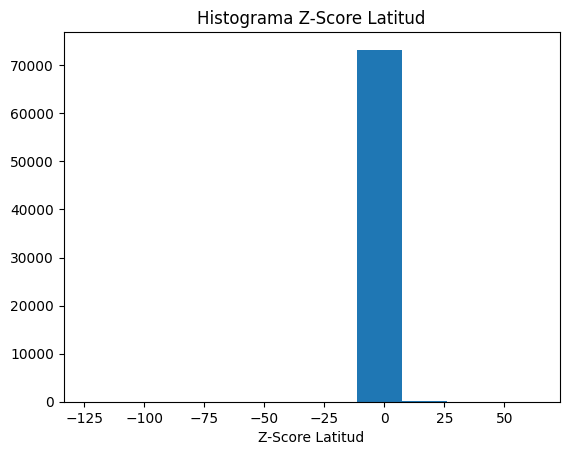

In [149]:
plt.hist(z_latitud_ds.z_latitud)
plt.title('Histograma Z-Score Latitud')
plt.xlabel('Z-Score Latitud')
plt.show()

In [150]:
z_longitud_ds = calculate_zscore_st(ds_train, ds_train.longitud)
z_latitud_ds.head()

id start_date   end_date    latitud   longitud  \
398521  kF0bkHgPamCYCqXRPCkz6A== 2021-02-13 2021-03-18 -34.598472 -58.390382   
62011   +PS3s7A+625etA9FbozFfg== 2021-05-01 2021-06-05 -34.579804 -58.428419   
162533  h7yKWe6AxLEXDuiie8H1Lw== 2021-10-07 2022-02-09 -34.605690 -58.379238   
335927  N+EXjJzYi3nQjO00RitsSg== 2021-07-21 2021-09-17 -34.558359 -58.474674   
215696  Zn+HbEZkzNah/nBC6OolNg== 2021-11-17 2021-12-16 -34.568760 -58.488861   

             place_l3 property_type  property_rooms  property_bedrooms  \
398521       Recoleta  Departamento             3.0                2.0   
62011         Palermo  Departamento             1.0                1.0   
162533    San Nicolás  Departamento             3.0                2.0   
335927        Coghlan  Departamento             2.0                1.0   
215696  Villa Urquiza  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
398521                    68.0                      68.0        196000.0   
62011                     25.0                      23.0         78500.0   
162533                    64.0                      61.0        135000.0   
335927                    75.0                      68.0        175000.0   
215696                    43.0                      38.0         89000.0   

                                           property_title  z_latitud  
398521                  Departamento de 3 amb en Recoleta  -0.032764  
62011                              Departamento - Palermo   0.088067  
162533   Venta 3 ambientes piso 18 con cochera y baulera   -0.079482  
335927    2 AMB EN COGHLAN MUY LUMINOSO C COCHERA PILETA.   0.226871  
215696  Departamento 2 ambientes - balcón - vista abie...   0.159552

In [151]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

# Test

print(
    f"Los outliers superiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

Los outliers superiores de longitud en train son: 7. Constituyen al 0% de los datos
Los outliers superiores de longitud en test son: 7. Constituyen al 0% de los datos


id start_date   end_date   latitud   longitud  \
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   
134196  s3z8Y8u6UYiGamjl7GKWUA== 2021-04-06 2021-04-25 -27.58162 -56.682310   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.61667 -54.133330   
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.61667 -54.133330   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   

       place_l3 property_type  property_rooms  property_bedrooms  \
173667      NaN  Departamento             4.0                3.0   
134196      NaN          Casa             4.0                2.0   
234893      NaN  Departamento             4.0                3.0   
405382      NaN          Casa             3.0                2.0   
241662      NaN          Casa             4.0                3.0   
187631      NaN  Departamento             5.0                4.0   
220851      NaN          Casa             4.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
173667                    98.0                      88.0        269000.0   
134196                   105.0                     105.0        200000.0   
234893                    98.0                      88.0        269000.0   
405382                   205.0                     102.0        125000.0   
241662                   230.0                     200.0        255000.0   
187631                   158.0                     150.0        380000.0   
220851                   105.0                     105.0        190000.0   

                                           property_title  z_longitud  
173667  Venta departamento 4 amb Vicente Lopez con cochea   11.837725  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    7.077116  
234893  Venta departamento 4 amb Vicente Lopez con cochea   11.837725  
405382      Depto Venta, Fincas de San Vicente II,  3 amb   17.309138  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   17.309138  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    3.567332  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    7.077116

In [152]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

Los outliers inferiores de longitud en train son: 77. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 77. Constituyen al 0% de los datos


id start_date                      end_date  \
102563  2RElZjaDk7sMtqYaODP8PA== 2021-05-28 2021-06-05 00:00:00.000000000   
284385  VI55L0vKxTBvvMD4h0MjWQ== 2021-02-24 2021-03-29 00:00:00.000000000   
32755   pB1BY0UXXU7cfX6YqEVZ+A== 2021-02-08 2021-04-23 12:00:03.026354504   
138208  rH7O71AzCmR6suehzNkPQQ== 2021-07-15 2021-07-31 00:00:00.000000000   
102592  5+JsTC29EXbmjzmQK0jV/w== 2021-05-28 2021-06-05 00:00:00.000000000   
...                          ...        ...                           ...   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   
32740   nOBxQPld60VNJ2F6dcVY3w== 2021-02-08 2021-03-18 00:00:00.000000000   
225660  OlSMVXL0J9CACcKoIk2ZVA== 2021-01-09 2021-01-10 00:00:00.000000000   
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 00:00:00.000000000   
232782  oomNDfWx0vNNdjgZos7TBg== 2021-03-20 2021-06-05 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
102563 -32.962151 -60.646585      NaN  Departamento             1.0   
284385 -33.081030 -68.468140      NaN  Departamento             3.0   
32755  -32.967756 -60.671092      NaN  Departamento             5.0   
138208 -31.465924 -64.418035      NaN          Casa             2.0   
102592 -32.967901 -60.628964      NaN  Departamento             2.0   
...           ...        ...      ...           ...             ...   
105792 -41.084900 -71.187159      NaN  Departamento             1.0   
32740  -31.678900 -63.879640      NaN          Casa             4.0   
225660 -29.140755 -59.638836      NaN          Casa             3.0   
131188 -41.083002 -71.182747      NaN  Departamento             2.0   
232782 -31.632518 -65.055367      NaN  Departamento             5.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
102563                1.0                    47.0                      47.0   
284385                2.0                    62.0                      57.0   
32755                 3.0                   150.0                     150.0   
138208                1.0                   500.0                     100.0   
102592                1.0                    54.0                      54.0   
...                   ...                     ...                       ...   
105792                1.0                    53.0                      53.0   
32740                 3.0                   405.0                     160.0   
225660                2.0                   110.0                      76.0   
131188                1.0                    66.0                      56.0   
232782                3.0                   130.0                     130.0   

        property_price                                     property_title  \
102563         59000.0            Departamento en venta de un dormitorio    
284385         88000.0   VENTA SAN MARTIN DEPARTAMENTO 3 AMB MUY LUMINOSO   
32755          75000.0  OPORTUNIDAD!!! departamento planta baja tres d...   
138208         80000.0  CASA EN VENTA · 2 AMBIENTES · VILLA SIERRAS DE...   
102592         65000.0              Venta! duplex, 1 dormitorio con PATIO   
...                ...                                                ...   
105792        145000.0  Villa Huapi - Dina Huapi - Río Negro - APTO CR...   
32740         190000.0  Alquiler cada 4 amb B°Los Arces,La Cañada de P...   
225660         87000.0  Venta  Casa duplex 3 amb con altillo, patio, c...   
131188        135000.0  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO    
232782         40000.0   421- Dos departamentos al frente de la plaza ...   

        z_longitud  
102563   -8.836130  
284385  -40.233129  
32755    -8.934504  
138208  -23.975348  
102592   -8.765398  
...            ...  
105792  -51.147713  
32740   -21.814141  
225660   -4.790862  
131188  -51.130004  
232782  -26.533701  

[77 rows x 14 columns]

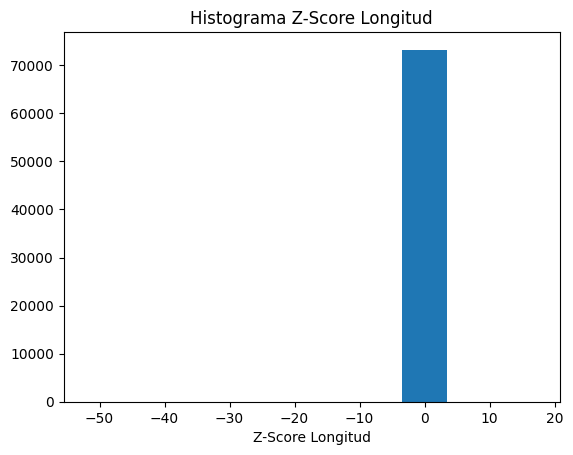

In [153]:
plt.hist(z_longitud_ds.z_longitud)
plt.title('Histograma Z-Score Longitud')
plt.xlabel('Z-Score Longitud')
plt.show()

#### Metodo Z Score modificado

In [154]:
def calculate_modified_zscore_st(dataset, column):
    new_df = dataset.copy()
    mediana = column.median()
    MAD = np.absolute(column - mediana).median()

    new_df[f'zm_{column.name}'] = (column - mediana) * 0.6745 / MAD
    return new_df

##### Ambientes

In [155]:
zm_rooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_rooms)

Verificamos si se cumple la regla de oro para la variable Rooms en el zscore modificado

In [156]:
# Train

print(
    f"Los outliers superiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de rooms en test son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

Los outliers superiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de rooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

In [157]:
# Train

print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

# Test


print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

Notamos que despues de haber borrado los outliers por el metodo de IQR para rooms, no se detectan outliers por este metodo. Lo mas seguro es que hayan sido outliers compartidos, al borrarlos por un metodo la interseccion nos da vacio.

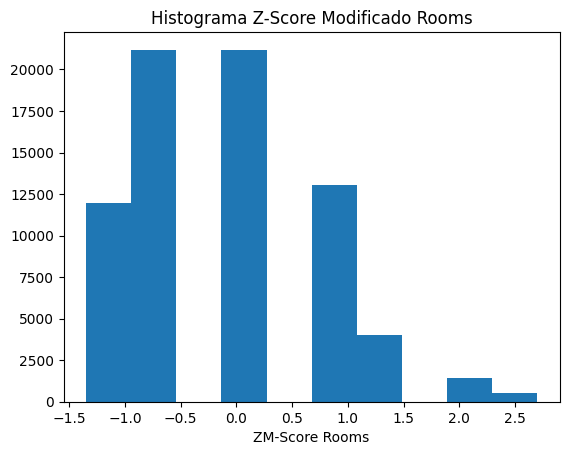

In [158]:
plt.hist(zm_rooms_ds.zm_property_rooms)
plt.title('Histograma Z-Score Modificado Rooms')
plt.xlabel('ZM-Score Rooms')
plt.show()

##### Habitaciones

In [159]:
zm_bedrooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_bedrooms)

In [160]:
# Train

print(
    f"Los outliers superiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

Los outliers superiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

In [161]:
# Train

print(
    f"Los outliers inferiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

# Test

print(
    f"Los outliers inferiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

Los outliers inferiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

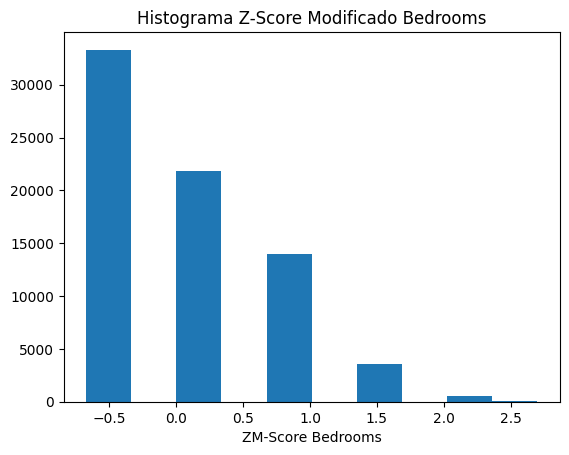

In [162]:
plt.hist(zm_bedrooms_ds.zm_property_bedrooms)
plt.title('Histograma Z-Score Modificado Bedrooms')
plt.xlabel('ZM-Score Bedrooms')
plt.show()

##### Superficie Total

In [163]:
zm_total_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_total)
zm_total_ds.head()

id start_date   end_date    latitud   longitud  \
398521  kF0bkHgPamCYCqXRPCkz6A== 2021-02-13 2021-03-18 -34.598472 -58.390382   
62011   +PS3s7A+625etA9FbozFfg== 2021-05-01 2021-06-05 -34.579804 -58.428419   
162533  h7yKWe6AxLEXDuiie8H1Lw== 2021-10-07 2022-02-09 -34.605690 -58.379238   
335927  N+EXjJzYi3nQjO00RitsSg== 2021-07-21 2021-09-17 -34.558359 -58.474674   
215696  Zn+HbEZkzNah/nBC6OolNg== 2021-11-17 2021-12-16 -34.568760 -58.488861   

             place_l3 property_type  property_rooms  property_bedrooms  \
398521       Recoleta  Departamento             3.0                2.0   
62011         Palermo  Departamento             1.0                1.0   
162533    San Nicolás  Departamento             3.0                2.0   
335927        Coghlan  Departamento             2.0                1.0   
215696  Villa Urquiza  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
398521                    68.0                      68.0        196000.0   
62011                     25.0                      23.0         78500.0   
162533                    64.0                      61.0        135000.0   
335927                    75.0                      68.0        175000.0   
215696                    43.0                      38.0         89000.0   

                                           property_title  \
398521                  Departamento de 3 amb en Recoleta   
62011                              Departamento - Palermo   
162533   Venta 3 ambientes piso 18 con cochera y baulera    
335927    2 AMB EN COGHLAN MUY LUMINOSO C COCHERA PILETA.   
215696  Departamento 2 ambientes - balcón - vista abie...   

        zm_property_surface_total  
398521                   0.112417  
62011                   -1.096062  
162533                   0.000000  
335927                   0.309146  
215696                  -0.590187

Verificamos si se cumple la regla de oro para la variable sup total en el zscore modificado

In [164]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

Los outliers superiores de sup total en train son: 5444. Constituyen al 7% de los datos
Los outliers superiores de sup total en test son: 5444. Constituyen al 30% de los datos


id start_date                      end_date  \
6878    i/egGqeX0B/k/wEBXyBKrw== 2021-02-09 2021-04-24 12:00:03.026354504   
338145  l8Qt73sNpMCYJF41TJFr7A== 2021-04-13 2021-04-25 00:00:00.000000000   
389850  s/b1tnaP3XjxW+48DfnE8A== 2021-05-05 2021-05-07 00:00:00.000000000   
163123  +o86l6OZMfiF8AVZ+CMHkA== 2021-11-28 2022-01-27 00:00:00.000000000   
44111   1T+ZhhIJYiEmAlDd/9fKkg== 2021-11-23 2021-12-04 00:00:00.000000000   
...                          ...        ...                           ...   
23961   ZxzM5p0ZGYTh8ecm0mV9ug== 2021-05-03 2021-06-05 00:00:00.000000000   
169043  JtVORX+pK2X7BPijTRN+nQ== 2021-07-28 2021-08-23 00:00:00.000000000   
137846  n1jX3jT9/wQ2JbLeNoE+yQ== 2021-01-22 2021-04-07 00:00:00.000000000   
436727  ERr/1CLm4PJTUph06oVn/A== 2021-08-25 2022-07-30 00:00:00.000000000   
204159  gpt9Umv7wKrO/vKOCrOldg== 2021-05-10 2021-06-05 00:00:00.000000000   

          latitud   longitud       place_l3 property_type  property_rooms  \
6878   -34.641094 -58.377395       Barracas          Casa             6.0   
338145 -34.680605 -58.491553   Villa Lugano            PH             3.0   
389850 -34.566294 -58.434664        Palermo  Departamento             4.0   
163123 -34.592078 -58.396134       Recoleta  Departamento             6.0   
44111  -34.592623 -58.378420       Recoleta  Departamento             6.0   
...           ...        ...            ...           ...             ...   
23961  -34.570631 -58.499003  Villa Urquiza          Casa             7.0   
169043 -34.632283 -58.512349      Versalles            PH             5.0   
137846 -34.585970 -58.396197   Barrio Norte  Departamento             4.0   
436727 -34.618153 -58.362615  Puerto Madero  Departamento             4.0   
204159 -34.592512 -58.389092       Recoleta  Departamento             7.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
6878                  5.0                   275.0                     275.0   
338145                2.0                   218.0                      85.0   
389850                3.0                   200.0                     200.0   
163123                5.0                   203.0                     203.0   
44111                 5.0                   360.0                     360.0   
...                   ...                     ...                       ...   
23961                 6.0                   340.0                     310.0   
169043                4.0                   203.0                     114.0   
137846                3.0                   235.0                     225.0   
436727                3.0                   252.0                     192.0   
204159                4.0                   220.0                     215.0   

        property_price                                     property_title  \
6878          590000.0  Espectacular casa en terreno propio   6 ambien...   
338145        150000.0            PH de 3 ambientes en venta Villa Lugano   
389850       1095000.0  VENTA DEPTO LA IMPRENTA 4 AMB DEP 2 COCH CATEG...   
163123        390000.0  Excelente piso antiguo de 6 ambientes! Santa F...   
44111        1100000.0  Departamento - PALACIO ESTRUGAMOU - 360 METROS...   
...                ...                                                ...   
23961         426000.0  CASA · 7 AMBIENTES · CERETTI AL 3200 · VILLA U...   
169043        180000.0                                     PH - Versalles   
137846        690000.0  Retasado PB en VENTA Plaza FRANCIA Edificio BU...   
436727       1850000.0                       Departamento - Puerto Madero   
204159        750000.0                                    Montevideo 1500   

        zm_property_surface_total  
6878                     5.929979  
338145                   4.328042  
389850                   3.822167  
163123                   3.906479  
44111                    8.318833  
...                           ...  
23961                    7.756750  
169043            

In [165]:
# Train

print(
    f"Los outliers inferiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

Los outliers inferiores de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_total]
Index: []

Los valores que nos devolvio el metodo Zscore Modificado, asi como tambien el Zscore, son aquellas viviendas que tienen mas de 200 m^2 y menos de 500m^2pero que nosotros en el analisis de IQR decidimos mantener. No lo vamos a borrar por lo explicado anteriormente

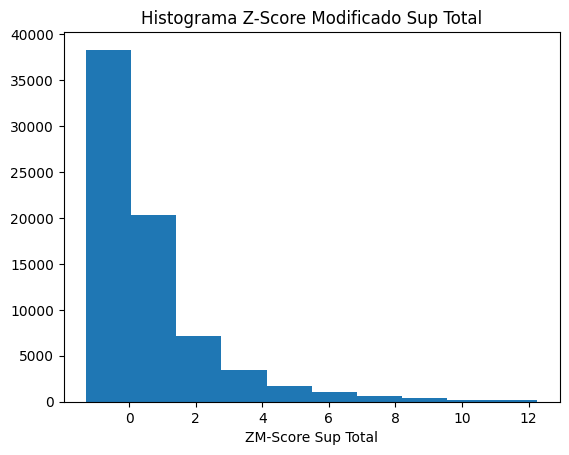

In [166]:
plt.hist(zm_total_ds.zm_property_surface_total)
plt.title('Histograma Z-Score Modificado Sup Total')
plt.xlabel('ZM-Score Sup Total')
plt.show()

##### Superficie Cubierta

In [167]:
zm_covered_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_covered)

Verificamos si se cumple la regla de oro para la variable sup cubierta en el zscore modificado

In [168]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

Los outliers superiores de sup cubierta en train son: 7% de los datos
Los outliers superiores de sup cubierta en test son: 29% de los datos


id start_date                      end_date  \
6878    i/egGqeX0B/k/wEBXyBKrw== 2021-02-09 2021-04-24 12:00:03.026354504   
389850  s/b1tnaP3XjxW+48DfnE8A== 2021-05-05 2021-05-07 00:00:00.000000000   
163123  +o86l6OZMfiF8AVZ+CMHkA== 2021-11-28 2022-01-27 00:00:00.000000000   
44111   1T+ZhhIJYiEmAlDd/9fKkg== 2021-11-23 2021-12-04 00:00:00.000000000   
177173  FTNkvKP86Do1+apEQh5uuQ== 2021-03-23 2021-07-17 00:00:00.000000000   
...                          ...        ...                           ...   
113552  SvF/gXZhc2my2ilHDV2jbw== 2021-06-09 2022-07-01 00:00:00.000000000   
23961   ZxzM5p0ZGYTh8ecm0mV9ug== 2021-05-03 2021-06-05 00:00:00.000000000   
137846  n1jX3jT9/wQ2JbLeNoE+yQ== 2021-01-22 2021-04-07 00:00:00.000000000   
436727  ERr/1CLm4PJTUph06oVn/A== 2021-08-25 2022-07-30 00:00:00.000000000   
204159  gpt9Umv7wKrO/vKOCrOldg== 2021-05-10 2021-06-05 00:00:00.000000000   

          latitud   longitud       place_l3 property_type  property_rooms  \
6878   -34.641094 -58.377395       Barracas          Casa             6.0   
389850 -34.566294 -58.434664        Palermo  Departamento             4.0   
163123 -34.592078 -58.396134       Recoleta  Departamento             6.0   
44111  -34.592623 -58.378420       Recoleta  Departamento             6.0   
177173 -34.551106 -58.475366       Saavedra          Casa             4.0   
...           ...        ...            ...           ...             ...   
113552 -34.575751 -58.406229        Palermo  Departamento             4.0   
23961  -34.570631 -58.499003  Villa Urquiza          Casa             7.0   
137846 -34.585970 -58.396197   Barrio Norte  Departamento             4.0   
436727 -34.618153 -58.362615  Puerto Madero  Departamento             4.0   
204159 -34.592512 -58.389092       Recoleta  Departamento             7.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
6878                  5.0                   275.0                     275.0   
389850                3.0                   200.0                     200.0   
163123                5.0                   203.0                     203.0   
44111                 5.0                   360.0                     360.0   
177173                3.0                   212.0                     178.0   
...                   ...                     ...                       ...   
113552                3.0                   175.0                     175.0   
23961                 6.0                   340.0                     310.0   
137846                3.0                   235.0                     225.0   
436727                3.0                   252.0                     192.0   
204159                4.0                   220.0                     215.0   

        property_price                                     property_title  \
6878          590000.0  Espectacular casa en terreno propio   6 ambien...   
389850       1095000.0  VENTA DEPTO LA IMPRENTA 4 AMB DEP 2 COCH CATEG...   
163123        390000.0  Excelente piso antiguo de 6 ambientes! Santa F...   
44111        1100000.0  Departamento - PALACIO ESTRUGAMOU - 360 METROS...   
177173        395000.0  VENTA CASA C/COCHERA, PATIO Y TERRAZA EN SAAVEDRA   
...                ...                                                ...   
113552        820000.0  Espectacular Piso a nuevo Palermo Chico 3 dorm...   
23961         426000.0  CASA · 7 AMBIENTES · CERETTI AL 3200 · VILLA U...   
137846        690000.0  Retasado PB en VENTA Plaza FRANCIA Edificio BU...   
436727       1850000.0                       Departamento - Puerto Madero   
204159        750000.0                                    Montevideo 1500   

        zm_property_surface_covered  
6878                       7.352050  
389850                     4.822675  
163123                     4.923850  
44111                     10.218675  
177173                     4.080725  
...                             ...  
113552                     3.979550  
23

In [169]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_covered]
Index: []

Mismo caso que el explicado para Zscore, Zscore modificado esta tomando como outliers a las superificies cubiertas que estan entre 200 y 500 m^2, nosotros optamos por mantener este valor ya nos parece valido, no eliminaremos nada.

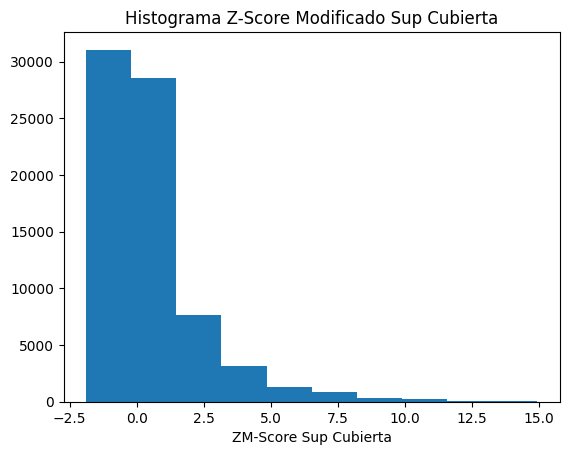

In [170]:
plt.hist(zm_covered_ds.zm_property_surface_covered)
plt.title('Histograma Z-Score Modificado Sup Cubierta')
plt.xlabel('ZM-Score Sup Cubierta')
plt.show()

##### Latitud y longitud

In [171]:
zm_latitud_ds = calculate_modified_zscore_st(ds_train, ds_train.latitud)

Verificamos si se cumple la regla de oro para la variable latitud en el zscore modificado

In [172]:
# Train

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

Los outliers superiores de latitud son: 0% de los datos
Los outliers superiores de latitud son: 0% de los datos


id start_date                      end_date  \
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 00:00:00.000000000   
102563  2RElZjaDk7sMtqYaODP8PA== 2021-05-28 2021-06-05 00:00:00.000000000   
284385  VI55L0vKxTBvvMD4h0MjWQ== 2021-02-24 2021-03-29 00:00:00.000000000   
32755   pB1BY0UXXU7cfX6YqEVZ+A== 2021-02-08 2021-04-23 12:00:03.026354504   
138208  rH7O71AzCmR6suehzNkPQQ== 2021-07-15 2021-07-31 00:00:00.000000000   
...                          ...        ...                           ...   
131209  pa9/Vy4bCIi4iu1MbNMUng== 2021-05-27 2021-06-05 00:00:00.000000000   
32740   nOBxQPld60VNJ2F6dcVY3w== 2021-02-08 2021-03-18 00:00:00.000000000   
225660  OlSMVXL0J9CACcKoIk2ZVA== 2021-01-09 2021-01-10 00:00:00.000000000   
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 00:00:00.000000000   
232782  oomNDfWx0vNNdjgZos7TBg== 2021-03-20 2021-06-05 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
173667 -27.631190 -55.496357      NaN  Departamento             4.0   
102563 -32.962151 -60.646585      NaN  Departamento             1.0   
284385 -33.081030 -68.468140      NaN  Departamento             3.0   
32755  -32.967756 -60.671092      NaN  Departamento             5.0   
138208 -31.465924 -64.418035      NaN          Casa             2.0   
...           ...        ...      ...           ...             ...   
131209 -31.448986 -60.930366      NaN  Departamento             4.0   
32740  -31.678900 -63.879640      NaN          Casa             4.0   
225660 -29.140755 -59.638836      NaN          Casa             3.0   
220851 -27.581620 -56.682310      NaN          Casa             4.0   
232782 -31.632518 -65.055367      NaN  Departamento             5.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
173667                3.0                    98.0                      88.0   
102563                1.0                    47.0                      47.0   
284385                2.0                    62.0                      57.0   
32755                 3.0                   150.0                     150.0   
138208                1.0                   500.0                     100.0   
...                   ...                     ...                       ...   
131209                2.0                   150.0                     150.0   
32740                 3.0                   405.0                     160.0   
225660                2.0                   110.0                      76.0   
220851                2.0                   105.0                     105.0   
232782                3.0                   130.0                     130.0   

        property_price                                     property_title  \
173667        269000.0  Venta departamento 4 amb Vicente Lopez con cochea   
102563         59000.0            Departamento en venta de un dormitorio    
284385         88000.0   VENTA SAN MARTIN DEPARTAMENTO 3 AMB MUY LUMINOSO   
32755          75000.0  OPORTUNIDAD!!! departamento planta baja tres d...   
138208         80000.0  CASA EN VENTA · 2 AMBIENTES · VILLA SIERRAS DE...   
...                ...                                                ...   
131209        200000.0  SE VENDE SEMIPISO DE CATEGORÍA EN EL CENTRO DE...   
32740         190000.0  Alquiler cada 4 amb B°Los Arces,La Cañada de P...   
225660         87000.0  Venta  Casa duplex 3 amb con altillo, patio, c...   
220851        190000.0       Casa jardín 2 dorm escrit. a 1 cdra Estación   
232782         40000.0   421- Dos departamentos al frente de la plaza ...   

        zm_latitud  
173667  246.496317  
102563   57.802373  
284385   53.594534  
32755    57.603969  
138208  110.762603  
...            ...  
131209  111.362141  
32740   103.224134  
225660  193.063963  
220851  248.250890  
232782  104.865876  

[78 rows x 14 columns]

In [173]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 28. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 28. Constituyen al 0% de los datos


id start_date                      end_date  \
431958  KcYM9EqNffHbcXZT+GcNaQ== 2021-12-16 2022-02-09 00:00:00.000000000   
213454  VclxezEG7N4h+PBg5Dg5jA== 2021-06-03 2021-06-18 00:00:00.000000000   
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 12:00:03.026354504   
333366  aN+caRwr6laNeGIm8iZd9Q== 2021-09-17 2021-09-18 00:00:00.000000000   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 00:00:00.000000000   
270589  tQfZpYXLoOwWd990nrLpBg== 2021-07-13 2021-10-16 00:00:00.000000000   
411779  jt4VEm3y2Ktb573eFDHQUw== 2021-03-02 2021-03-12 00:00:00.000000000   
317537  x1BlLb49Up0aSX9yuzhrMw== 2021-09-29 2022-03-25 00:00:00.000000000   
8802    Bvx15ijE/oSwZrBaowoSaQ== 2021-05-18 2021-05-19 00:00:00.000000000   
161352  GsZ5hegnoxnRL4wSr7DRag== 2021-10-07 2021-11-02 00:00:00.000000000   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   
351916  BKk+pz+G7Tajvr6LE+9UZw== 2021-06-25 2021-07-17 00:00:00.000000000   
250707  n/VGq/lp+AH1XRd4RSHphg== 2021-04-29 2021-05-15 00:00:00.000000000   
141494  2htnFnAl0fWYIB2Re2djvg== 2021-03-10 2021-04-19 00:00:00.000000000   
324200  SSbx+/6MNgxE6rIDYPA0+A== 2021-03-03 2021-06-05 00:00:00.000000000   
82540   j0CggSFoqC9J+F1N9h91wg== 2021-03-12 2021-03-13 00:00:00.000000000   
171545  2IMMhWMUVZd6htI0Xo9m8Q== 2021-04-19 2021-06-05 00:00:00.000000000   
155333  j+0Iyd6D8YGQxE3u+nJiQQ== 2021-04-05 2021-04-15 00:00:00.000000000   
210013  896AVJRoLi1HWY3kiM79UQ== 2021-07-22 2021-07-31 00:00:00.000000000   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 00:00:00.000000000   
308365  j4l0DxeSfN6KnNMYSo6bSg== 2021-04-28 2021-05-01 00:00:00.000000000   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 00:00:00.000000000   
208451  r5h8YGMTL3OG6u8wekYDWg== 2021-02-01 2021-05-02 00:00:00.000000000   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   
65844   0tGMaOsXgkOAnx8GSH1pmA== 2021-05-15 2021-05-25 00:00:00.000000000   
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 00:00:00.000000000   
271609  pMxqmA1WxzslUoiQPG4qFg== 2021-06-19 2021-07-05 00:00:00.000000000   
146879  d25d7RgaAYPDgDV2L7hxiA== 2021-08-19 2021-08-27 00:00:00.000000000   

          latitud   longitud         place_l3 property_type  property_rooms  \
431958 -34.694062 -58.466105  Villa Riachuelo          Casa             5.0   
213454 -34.694062 -58.466105  Villa Riachuelo          Casa             4.0   
208085 -41.085373 -71.185766              NaN  Departamento             2.0   
333366 -34.694062 -58.466105  Villa Riachuelo          Casa             5.0   
106288 -40.131723 -71.299436              NaN  Departamento             2.0   
270589 -34.694451 -58.467532     Villa Lugano          Casa             3.0   
411779 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
317537 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
8802   -34.694062 -58.466105  Villa Riachuelo          Casa             4.0   
161352 -34.694062 -58.466105  Villa Riachuelo          Casa             5.0   
106297 -41.086352 -71.185720              NaN  Departamento             2.0   
351916 -34.694900 -58.469161     Villa Lugano          Casa             2.0   
250707 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
141494 -34.694062 -58.466105  Villa Riachuelo          Casa             4.0   
324200 -38.940227 -68.073865              NaN  Departamento             3.0   
82540  -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
171545 -34.694322 -58.469549     Villa Lugano            PH             3.0   
155333 -41.164123 -71.415420              NaN          Casa             3.0   
210013 -34.694062 -58.466105  Villa Riachuelo          Casa             4.0   
410404 -38.964493 -68.075830              NaN          Casa             7.0   
308365 -34.694900 -58.469161     Villa Lugano          Casa             2.0   
457631 -53.788624 -67.718089              NaN  Departament

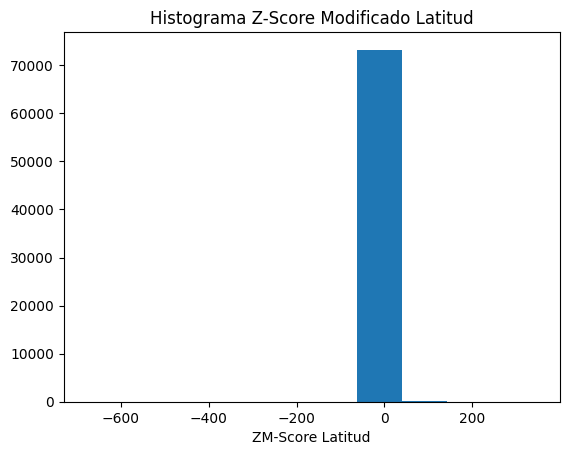

In [174]:
plt.hist(zm_latitud_ds.zm_latitud)
plt.title('Histograma Z-Score Modificado Latitud')
plt.xlabel('ZM-Score Latitud')
plt.show()

In [175]:
zm_longitud_ds = calculate_modified_zscore_st(ds_train, ds_train.longitud)

Verificamos si se cumple la regla de oro para la variable longitud en el zscore modificado

In [176]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de longitud en test son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

Los outliers superiores de longitud en train son: 0% de los datos
Los outliers superiores de longitud en test son: 0% de los datos


id start_date   end_date   latitud   longitud  \
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   
134196  s3z8Y8u6UYiGamjl7GKWUA== 2021-04-06 2021-04-25 -27.58162 -56.682310   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.61667 -54.133330   
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.61667 -54.133330   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   

       place_l3 property_type  property_rooms  property_bedrooms  \
173667      NaN  Departamento             4.0                3.0   
134196      NaN          Casa             4.0                2.0   
234893      NaN  Departamento             4.0                3.0   
405382      NaN          Casa             3.0                2.0   
241662      NaN          Casa             4.0                3.0   
187631      NaN  Departamento             5.0                4.0   
220851      NaN          Casa             4.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
173667                    98.0                      88.0        269000.0   
134196                   105.0                     105.0        200000.0   
234893                    98.0                      88.0        269000.0   
405382                   205.0                     102.0        125000.0   
241662                   230.0                     200.0        255000.0   
187631                   158.0                     150.0        380000.0   
220851                   105.0                     105.0        190000.0   

                                           property_title  zm_longitud  
173667  Venta departamento 4 amb Vicente Lopez con cochea    70.945519  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.351125  
234893  Venta departamento 4 amb Vicente Lopez con cochea    70.945519  
405382      Depto Venta, Fincas de San Vicente II,  3 amb   103.809326  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   103.809326  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    21.269760  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.351125

In [177]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

Los outliers inferiores de longitud en train son: 80. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 80. Constituyen al 0% de los datos


id start_date                      end_date  \
102563  2RElZjaDk7sMtqYaODP8PA== 2021-05-28 2021-06-05 00:00:00.000000000   
284385  VI55L0vKxTBvvMD4h0MjWQ== 2021-02-24 2021-03-29 00:00:00.000000000   
32755   pB1BY0UXXU7cfX6YqEVZ+A== 2021-02-08 2021-04-23 12:00:03.026354504   
138208  rH7O71AzCmR6suehzNkPQQ== 2021-07-15 2021-07-31 00:00:00.000000000   
102592  5+JsTC29EXbmjzmQK0jV/w== 2021-05-28 2021-06-05 00:00:00.000000000   
...                          ...        ...                           ...   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   
32740   nOBxQPld60VNJ2F6dcVY3w== 2021-02-08 2021-03-18 00:00:00.000000000   
225660  OlSMVXL0J9CACcKoIk2ZVA== 2021-01-09 2021-01-10 00:00:00.000000000   
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 00:00:00.000000000   
232782  oomNDfWx0vNNdjgZos7TBg== 2021-03-20 2021-06-05 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
102563 -32.962151 -60.646585      NaN  Departamento             1.0   
284385 -33.081030 -68.468140      NaN  Departamento             3.0   
32755  -32.967756 -60.671092      NaN  Departamento             5.0   
138208 -31.465924 -64.418035      NaN          Casa             2.0   
102592 -32.967901 -60.628964      NaN  Departamento             2.0   
...           ...        ...      ...           ...             ...   
105792 -41.084900 -71.187159      NaN  Departamento             1.0   
32740  -31.678900 -63.879640      NaN          Casa             4.0   
225660 -29.140755 -59.638836      NaN          Casa             3.0   
131188 -41.083002 -71.182747      NaN  Departamento             2.0   
232782 -31.632518 -65.055367      NaN  Departamento             5.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
102563                1.0                    47.0                      47.0   
284385                2.0                    62.0                      57.0   
32755                 3.0                   150.0                     150.0   
138208                1.0                   500.0                     100.0   
102592                1.0                    54.0                      54.0   
...                   ...                     ...                       ...   
105792                1.0                    53.0                      53.0   
32740                 3.0                   405.0                     160.0   
225660                2.0                   110.0                      76.0   
131188                1.0                    66.0                      56.0   
232782                3.0                   130.0                     130.0   

        property_price                                     property_title  \
102563         59000.0            Departamento en venta de un dormitorio    
284385         88000.0   VENTA SAN MARTIN DEPARTAMENTO 3 AMB MUY LUMINOSO   
32755          75000.0  OPORTUNIDAD!!! departamento planta baja tres d...   
138208         80000.0  CASA EN VENTA · 2 AMBIENTES · VILLA SIERRAS DE...   
102592         65000.0              Venta! duplex, 1 dormitorio con PATIO   
...                ...                                                ...   
105792        145000.0  Villa Huapi - Dina Huapi - Río Negro - APTO CR...   
32740         190000.0  Alquiler cada 4 amb B°Los Arces,La Cañada de P...   
225660         87000.0  Venta  Casa duplex 3 amb con altillo, patio, c...   
131188        135000.0  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO    
232782         40000.0   421- Dos departamentos al frente de la plaza ...   

        zm_longitud  
102563   -53.231106  
284385  -241.815836  
32755    -53.821987  
138208  -144.164173  
102592   -52.806260  
...             ...  
105792  -307.373820  
32740   -131.182975  
225660   -28.933376  
131188  -307.267453  
232782  -159.530809  

[80 rows x 14 columns]

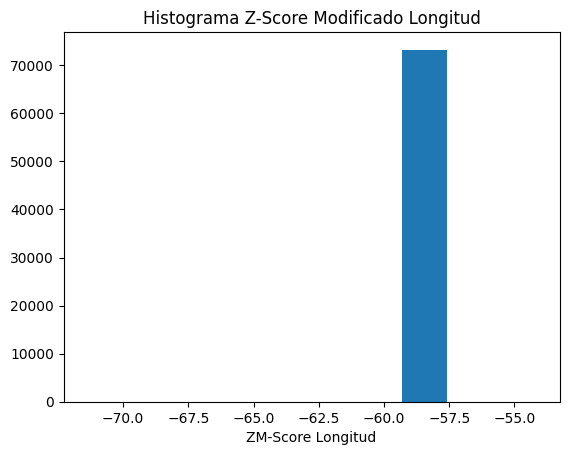

In [178]:
plt.hist(zm_longitud_ds.longitud)
plt.title('Histograma Z-Score Modificado Longitud')
plt.xlabel('ZM-Score Longitud')
plt.show()

### Multivariados

#### Clustering - Mahalanobis

In [179]:
def calculate_mahalanobis_distance(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X


In [180]:
def create_scatter_plot(dataset, col1, col2):
    #Scatter Plot
    plt.scatter(dataset[col1], dataset[col2])
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

In [181]:
def create_scattergram(dataset, col1, col2, outlier_limit):
    #Grafico scatter
    es_outlier = (dataset['mahalanobis'] > outlier_limit)

    sns.scatterplot(x=dataset[col1], y=dataset[col2], hue=es_outlier)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.show()

##### Analisis entre ambientes y habitaciones de valores atipicos

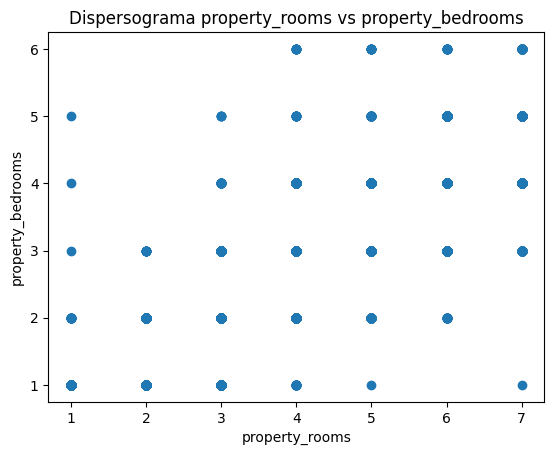

In [182]:
create_scatter_plot(ds_train, 'property_rooms', 'property_bedrooms')

Parecerían exisitir algunas observaciones anómalas. Vamos a calcular la distancia de mahalanobis para cada observación.

In [183]:
mahalanobis_rooms_bedrooms_train = calculate_mahalanobis_distance(ds_train, 'property_rooms', 'property_bedrooms')
mahalanobis_rooms_bedrooms_test = calculate_mahalanobis_distance(ds_test, 'property_rooms', 'property_bedrooms')

mahalanobis_rooms_bedrooms_train.head()

property_rooms  property_bedrooms  mahalanobis
398521             3.0                2.0     0.048998
62011              1.0                1.0     2.860597
162533             3.0                2.0     0.048998
335927             2.0                1.0     1.173172
215696             2.0                1.0     1.173172

Tenemos que seleccionar un valor umbral para definir qué observaciones podrían ser anómalas según la distancia de mahalanobis.

<AxesSubplot: ylabel='mahalanobis'>

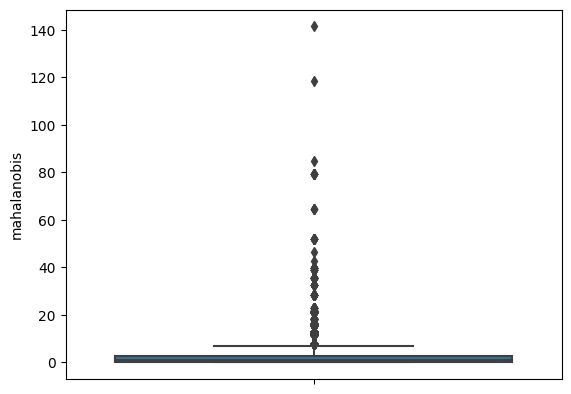

In [184]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train.mahalanobis)

Seleccionamos 35 como valor umbral

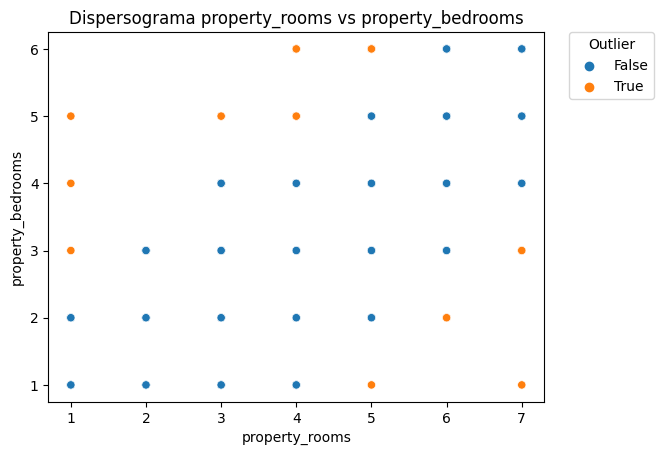

Los outliers para mahalanobis con un umbral de 35 son: 144. Constituyen el 0% de los datos


In [185]:
umbral = 35
create_scattergram(mahalanobis_rooms_bedrooms_train, 'property_rooms', 'property_bedrooms', umbral)

print(
    f"Los outliers para mahalanobis con un umbral de {umbral} son: {len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral])}. Constituyen el {(len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]) * 100) // len(ds_train)}% de los datos")

<AxesSubplot: ylabel='mahalanobis'>

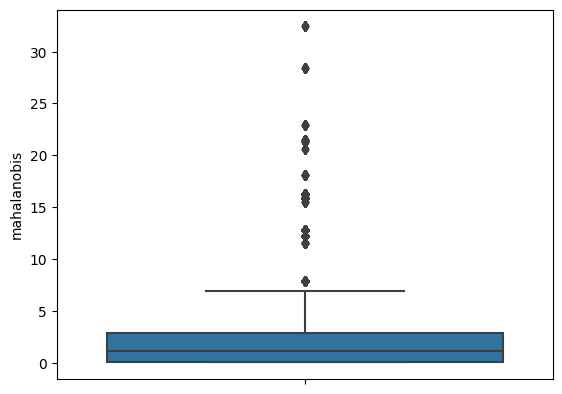

In [186]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] < umbral].mahalanobis)

In [187]:
mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]

property_rooms  property_bedrooms  mahalanobis
452275             4.0                5.0    38.769258
434842             6.0                2.0    39.717287
98292              7.0                3.0    35.657463
49707              7.0                3.0    35.657463
97960              7.0                3.0    35.657463
...                ...                ...          ...
280353             6.0                2.0    39.717287
281096             7.0                3.0    35.657463
54021              4.0                5.0    38.769258
46470              6.0                2.0    39.717287
147404             7.0                3.0    35.657463

[144 rows x 3 columns]

Como podemos observar en el scatter plot, quedan bien marcados los outliers que en nuestro dominio de problema no tienen ningun sentido.
Por ejemplo, tener 7 ambientes y 1 habitacion...
Procederemos a eliminar estos outliers.

###### Eliminamos dichas observaciones

In [188]:
# Train

indice_outlier_train = mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 144 registros en train
Se han eliminado: 40 registros en test


Dispersograma sin los outliers mencionados


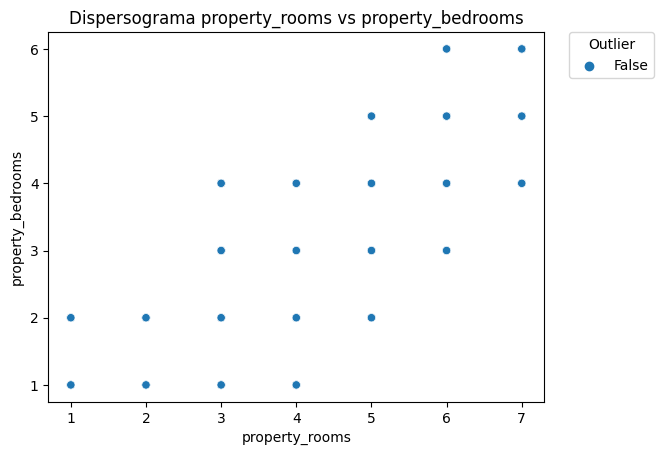

In [189]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test.mahalanobis < umbral],
                   'property_rooms',
                   'property_bedrooms', umbral)

##### Analisis entre superficie total y superificie cubierta de valores atipicos

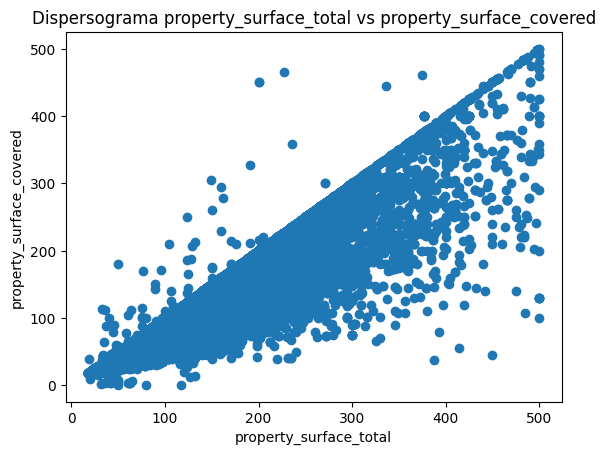

In [190]:
create_scatter_plot(ds_train, 'property_surface_total', 'property_surface_covered')

In [191]:
mahalanobis_surfaces_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total',
                                                            'property_surface_covered')
mahalanobis_surfaces_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total',
                                                           'property_surface_covered')

mahalanobis_surfaces_train.head()

property_surface_total  property_surface_covered  mahalanobis
398521                    68.0                      68.0     0.257279
62011                     25.0                      23.0     0.862479
162533                    64.0                      61.0     0.154708
335927                    75.0                      68.0     0.037479
215696                    43.0                      38.0     0.429970

<AxesSubplot: ylabel='mahalanobis'>

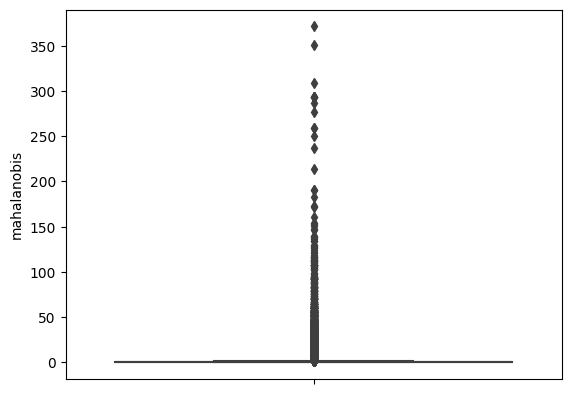

In [192]:
sns.boxplot(y=mahalanobis_surfaces_train.mahalanobis)

In [193]:
mahalanobis_surfaces_train.isna().sum()

property_surface_total      0
property_surface_covered    0
mahalanobis                 0
dtype: int64

In [194]:
#Defino umbral
umbral = 175  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral]

property_surface_total  property_surface_covered  mahalanobis
138208                   500.0                     100.0   351.037700
104359                   200.0                     450.0   259.334664
310407                   388.0                      38.0   277.254307
393711                   414.0                      56.0   286.725973
97083                    500.0                     130.0   293.896153
387598                   475.0                     140.0   237.414800
412681                   393.0                      80.0   213.730215
52468                    450.0                      45.0   371.518896
450430                   442.0                     140.0   190.804745
104592                   200.0                     450.0   259.334664
61175                    500.0                     200.0   183.064909
45540                    420.0                     120.0   190.387213
97055                    500.0                     130.0   293.896153
394706                   227.0                     466.0   250.269496
121279                   500.0                     130.0   293.896153
32735                    485.0                     108.0   309.143209
445383                   500.0                     130.0   293.896153

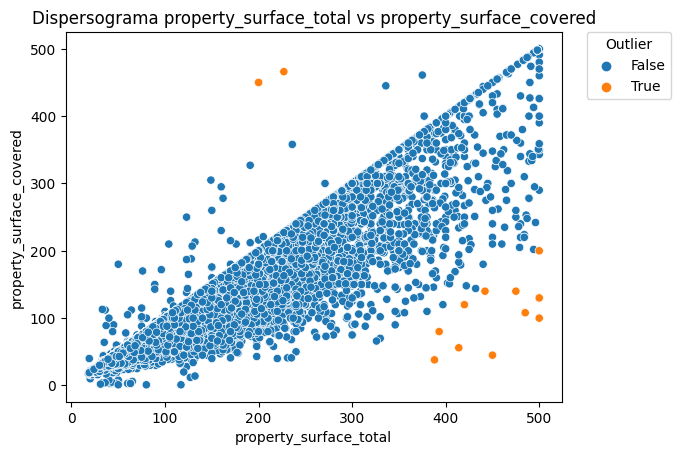

In [195]:
create_scattergram(mahalanobis_surfaces_train, 'property_surface_total', 'property_surface_covered', umbral)

###### Como podemos observar, con mahalanobis pudimos detectar dos escenarios de outliers. Son outliers aquellas viviendas que tengan una superificie cubierta > superificie total Y son outliers tambien aquellas viviendas que tengan una brecha importante entre la superificie total y la cubierta. Por ejemplo: $380 m^2$ de total VS $80 m^2$ de cubierta. Procederemos a eliminarlos.

In [196]:
# Train

indice_outlier_train = mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_surfaces_test[mahalanobis_surfaces_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 17 registros en train
Se han eliminado: 0 registros en test


Dispersograma sin los outliers mencionados


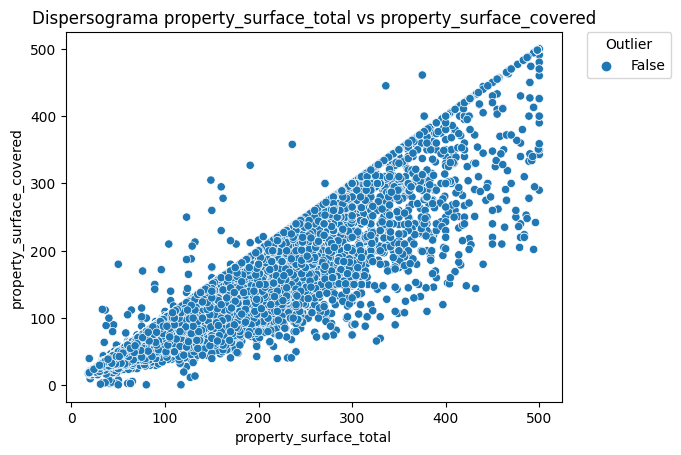

In [197]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_surfaces_train[mahalanobis_surfaces_train.mahalanobis < umbral],
                   'property_surface_total',
                   'property_surface_covered', umbral)

##### Analisis entre latitud y logitud de valores atipicos

In [198]:
mahalanobis_lat_long_train = calculate_mahalanobis_distance(ds_train, 'latitud', 'longitud')
mahalanobis_lat_long_test = calculate_mahalanobis_distance(ds_test, 'latitud', 'longitud')


In [199]:
#Defino umbral
umbral = 1  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]

El mínimo según el umbral es de: 156.0133743613569


latitud   longitud  mahalanobis
173667 -27.631190 -55.496357  3685.001359
102563 -32.962151 -60.646585   158.070119
284385 -33.081030 -68.468140  2152.531915
32755  -32.967756 -60.671092   158.835765
102592 -32.967901 -60.628964   156.398928
...           ...        ...          ...
32740  -31.678900 -63.879640   714.205692
225660 -29.140755 -59.638836  1540.993248
131188 -41.083002 -71.182747  9181.260242
220851 -27.581620 -56.682310  3319.404776
232782 -31.632518 -65.055367   962.823186

[83 rows x 3 columns]

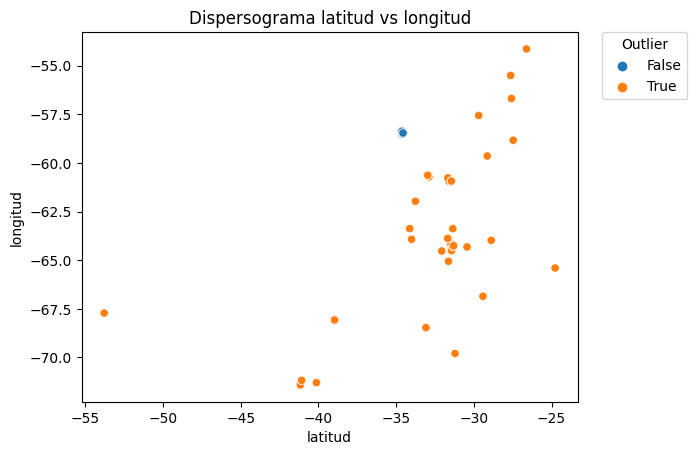

El grafico muestra 83 outliers
El mínimo según el umbral es de: 156.0133743613569


In [200]:
create_scattergram(mahalanobis_lat_long_train, 'latitud', 'longitud', umbral)
print(
    f"El grafico muestra {len(mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")

Dispersograma sin los outliers mencionados


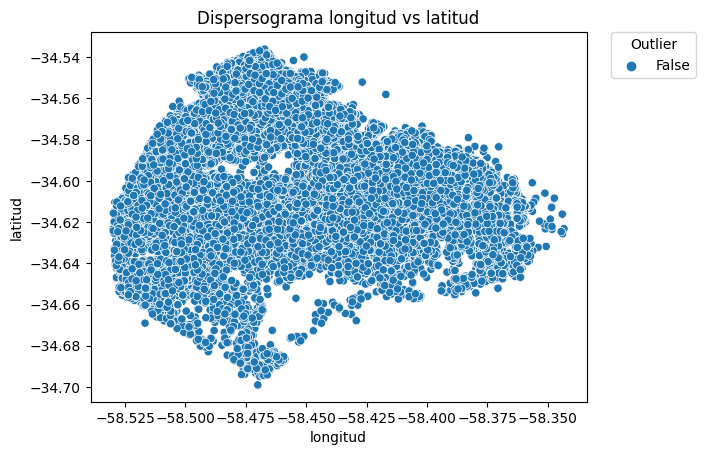

In [201]:
print("Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_lat_long_train[mahalanobis_lat_long_train.mahalanobis < umbral], 'longitud', 'latitud',
                   umbral)

A simple vista se nota como el dispersograma cambió mucho y ahora se parece un poco a CABA. Notar además que tomamos como umbral 1 y sin embargo el valor mínimo de la distancia de estos outliers era de 106.

Como estos 1684 outliers tienen valores demasiado alejados del dataset, procederemos a borrarlos

In [202]:
# Train

indice_outlier_train = mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test


indice_outlier_test = mahalanobis_lat_long_test[mahalanobis_lat_long_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 83 registros en train
Se han eliminado: 998 registros en test


Ahora que eliminamos los outliers de latitud y longitud, eliminaremos los datos nulos de place_l3.

In [203]:
ds_train.place_l3.isna().sum()

44

In [204]:
ds_train.dropna(subset='place_l3', inplace=True)
ds_train.place_l3.isna().sum()

0

#### Analisis entre superficie total y precio

In [205]:
mahalanobis_price_surface_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total', 'property_price')
mahalanobis_price_surface_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total', 'property_price')

mahalanobis_price_surface_train['mahalanobis'].describe()

count    73033.000000
mean         2.182060
std         53.030659
min          0.000002
25%          0.196316
50%          0.416427
75%          0.729106
max      13931.655549
Name: mahalanobis, dtype: float64

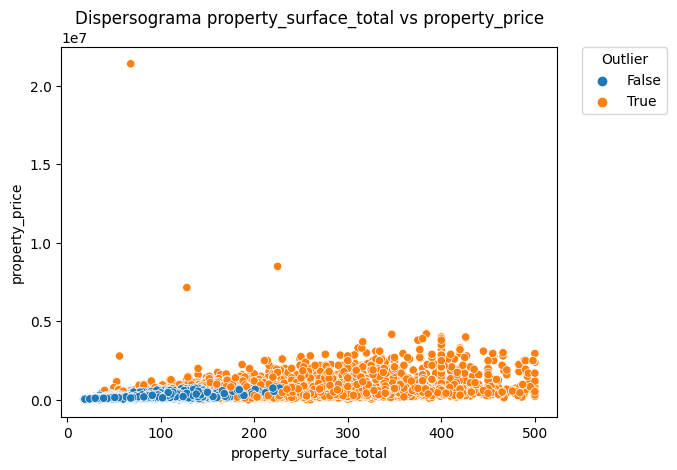

El grafico muestra 5002 outliers
El mínimo según el umbral es de: 5.010342756699792
Los outliers representan un 6.8489586899073025%


In [206]:
umbral = 5
create_scattergram(mahalanobis_price_surface_train, 'property_surface_total', 'property_price', umbral)
print(
    f"El grafico muestra {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
print(
    f"Los outliers representan un {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]) * 100 / len(ds_train)}%")

<AxesSubplot: ylabel='mahalanobis'>

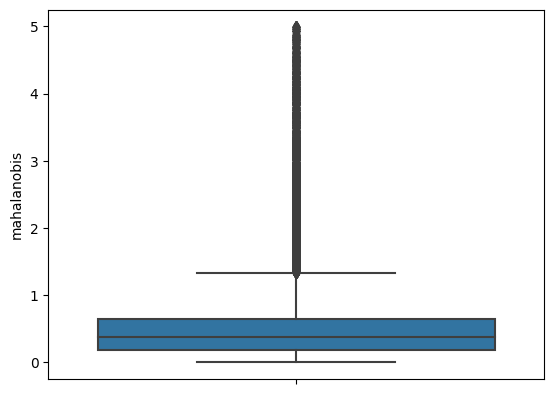

In [207]:
sns.boxplot(y=mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] < umbral].mahalanobis)

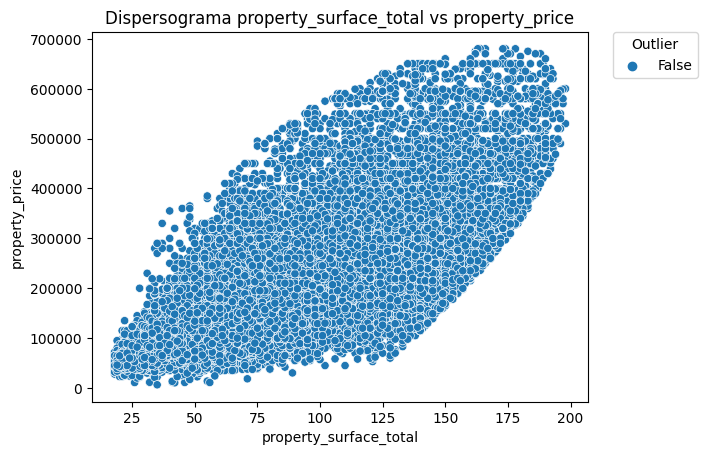

In [208]:
create_scattergram(mahalanobis_price_surface_train[mahalanobis_price_surface_train.mahalanobis < 3],
                   'property_surface_total',
                   'property_price', 3)

No llegamos a una buena conclusión para decidir el umbral por lo que tomaremos otro camino. Investigaremos acerca del precio por $m^2$ y realizaremos un análisis con el método de IQR sobre eso.

In [209]:
mahalanobis_price_surface_train[
    'price_m2'] = mahalanobis_price_surface_train.property_price / mahalanobis_price_surface_train.property_surface_total

mahalanobis_price_surface_test[
    'price_m2'] = mahalanobis_price_surface_test.property_price / mahalanobis_price_surface_test.property_surface_total

cantidad de datos del ds: 73033
outliers encontrados para los price_m2: 3390
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4284.569780219779, limite inf: 330.3570329670333


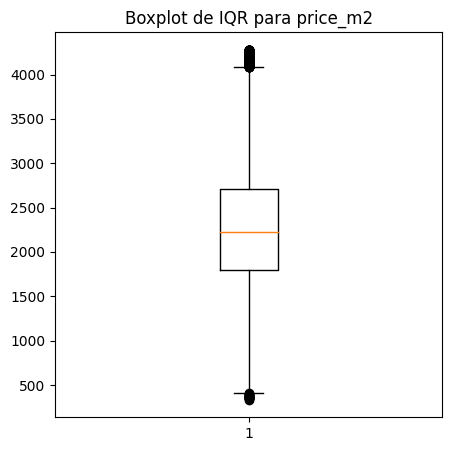

cantidad de datos del ds: 16736
outliers encontrados para los price_m2: 845
hay 5% de outliers de price_m2 sobre el ds
limit sup: 4239.84693877551, limite inf: 389.4251700680268


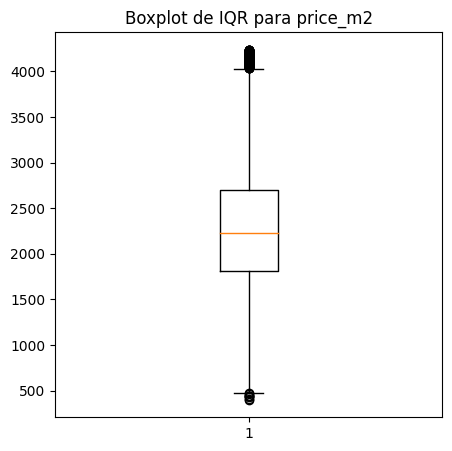

In [210]:
calculate_univariate_iqr(mahalanobis_price_surface_train['price_m2'], mahalanobis_price_surface_train)
calculate_univariate_iqr(mahalanobis_price_surface_test['price_m2'], mahalanobis_price_surface_test)

Hay 3361 registros en train por encima del límite superior en train (4.602029219667822)
Hay 29 registros en train por debajo del límite inferior en train  (0.03970807717059412)
Hay 815 registros en train por encima del límite superior en train (1.1159338928977312)%
Hay 7 registros en train por debajo del límite inferior en train  (0.0095847082825572%)


Text(0.5, 1.0, 'Distribución sin outliers')

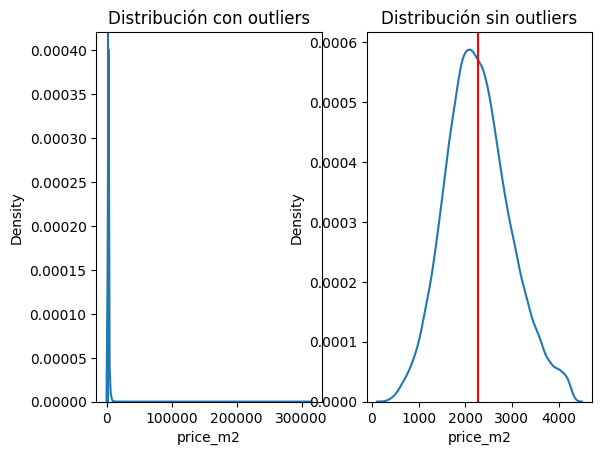

In [211]:
limites = boxplot_outliers_edges(mahalanobis_price_surface_train['price_m2'])
limite_inf = limites[0]
limite_sup = limites[1]
outliers_sup_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 > limite_sup)]
outliers_inf_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 < limite_inf)]

outliers_sup_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 > limite_sup)]
outliers_inf_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 < limite_inf)]

print(
    f"Hay {len(outliers_sup_price_m2_train)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_train) * 100 / len(ds_train)})")
print(
    f"Hay {len(outliers_inf_price_m2_train)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_train) * 100 / len(ds_train)})")

print(
    f"Hay {len(outliers_sup_price_m2_test)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_test) * 100 / len(ds_train)})%")
print(
    f"Hay {len(outliers_inf_price_m2_test)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_test) * 100 / len(ds_train)}%)")

fig, axs = plt.subplots(ncols=2)

ds_plot = mahalanobis_price_surface_train[
    (mahalanobis_price_surface_train.price_m2 > limite_inf) & (mahalanobis_price_surface_train.price_m2 < limite_sup)]

sns.kdeplot(mahalanobis_price_surface_train.price_m2, ax=axs[0])
sns.kdeplot(ds_plot.price_m2, ax=axs[1])

axs[0].axvline(mahalanobis_price_surface_train.price_m2.mean())
axs[1].axvline(ds_plot.price_m2.mean(), color='red')

axs[0].set_title("Distribución con outliers")
axs[1].set_title("Distribución sin outliers")

Como podemos ver, quitar estos outliers nos acerca el grafico a algo parecido a una distribución normal. Procederemos a borrar tanto los outliers superiores como inferiores.

In [212]:
# Train

ds_train.drop(outliers_sup_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_sup_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_test)} registros en test")

Se han eliminado: 3361 registros en train
Se han eliminado: 815 registros en test


In [213]:
# Train

ds_train.drop(outliers_inf_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_inf_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_test)} registros en test")

Se han eliminado: 29 registros en train
Se han eliminado: 7 registros en test


#### LOF

In [214]:
def create_scores_based_on_training(dataset, col1, col2):
    #Conjunto de entrenamiento
    dataset = dataset[~(dataset[f'{col1}'].isna())]  # que hago con los NAN? Para la preddicion necesito sacarlos.
    dataset = dataset[~(dataset[f'{col2}'].isna())]

    X = dataset[[f'{col1}', f'{col2}']].values

    #Creo el clasificador
    clf = LocalOutlierFactor(n_neighbors=20)

    #Genero prediccion
    y_pred = clf.fit_predict(X)

    #Guardo los scores
    dataset['scores'] = clf.negative_outlier_factor_

    return dataset.copy()

In [215]:
def create_dispersion_diagram(dataset, col1, col2):
    new_lof_ds = dataset.copy()
    new_lof_ds['target'] = 0
    new_col_ds = new_lof_ds
    new_col_ds[[f'{col1}', f'{col2}', 'target']]

    sns.scatterplot(x=new_col_ds[f'{col1}'], y=new_col_ds[f'{col2}'], hue=new_col_ds['target'])
    plt.title(f'Diagrama de Dispersión {col1} vs {col2}')
    plt.show()
    return new_lof_ds

In [216]:
def create_lof_graph(dataset, col1, col2):
    #Calculo radio para plotear score
    radius = (dataset.scores.max() - dataset.scores) / (dataset.scores.max() - dataset.scores.min())

    #Grafico LOF
    plt.figure(figsize=(10, 10))
    plt.title("Local Outlier Factor (LOF)")
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, edgecolor='grey', s=30, label='Datos',
                facecolors='none')
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, s=1300 * radius, edgecolors='red',
                facecolors='none', label='Outlier scores')
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

##### Analisis de outliers para ambientes y habitaciones

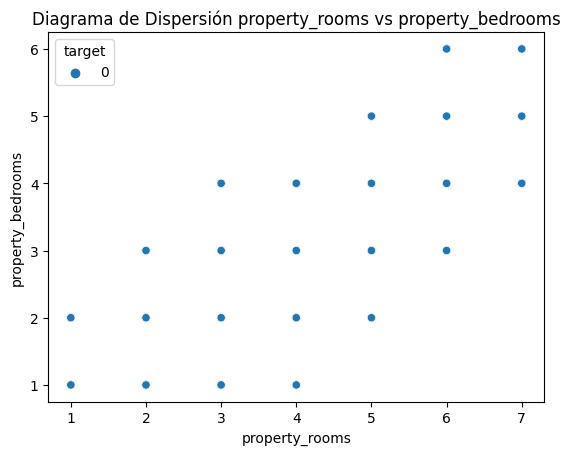

In [217]:
rooms_bedrooms_lof_df = create_dispersion_diagram(ds_train, 'property_rooms', 'property_bedrooms')

In [218]:
new_rooms_bedrooms_lof_df = create_scores_based_on_training(rooms_bedrooms_lof_df, 'property_rooms',
                                                            'property_bedrooms')
new_rooms_bedrooms_lof_df

id start_date                      end_date  \
398521  kF0bkHgPamCYCqXRPCkz6A== 2021-02-13 2021-03-18 00:00:00.000000000   
62011   +PS3s7A+625etA9FbozFfg== 2021-05-01 2021-06-05 00:00:00.000000000   
162533  h7yKWe6AxLEXDuiie8H1Lw== 2021-10-07 2022-02-09 00:00:00.000000000   
335927  N+EXjJzYi3nQjO00RitsSg== 2021-07-21 2021-09-17 00:00:00.000000000   
215696  Zn+HbEZkzNah/nBC6OolNg== 2021-11-17 2021-12-16 00:00:00.000000000   
...                          ...        ...                           ...   
406653  kpWtFhPJ4DdbedG4GNRw5A== 2021-01-07 2021-01-08 00:00:00.000000000   
168206  qr56uJ5cUqtiiOpD/rgqGw== 2021-04-30 2021-09-28 00:00:00.000000000   
144473  Kv3ZJUprHRnzn6krnUSzOQ== 2021-07-29 2021-08-09 00:00:00.000000000   
455367  nWAFWcKHS9znSfpFBZ7GyQ== 2021-12-16 2022-02-09 00:00:00.000000000   
78276   f6FilmImSq7Fner/TtMreA== 2021-06-21 2021-09-03 12:00:03.026354504   

          latitud   longitud       place_l3 property_type  property_rooms  \
398521 -34.598472 -58.390382       Recoleta  Departamento             3.0   
62011  -34.579804 -58.428419        Palermo  Departamento             1.0   
162533 -34.605690 -58.379238    San Nicolás  Departamento             3.0   
335927 -34.558359 -58.474674        Coghlan  Departamento             2.0   
215696 -34.568760 -58.488861  Villa Urquiza  Departamento             2.0   
...           ...        ...            ...           ...             ...   
406653 -34.615153 -58.430898      Caballito  Departamento             4.0   
168206 -34.625174 -58.368031      San Telmo  Departamento             1.0   
144473 -34.554342 -58.453316       Belgrano  Departamento             4.0   
455367 -34.576779 -58.497455  Villa Urquiza  Departamento             2.0   
78276  -34.559953 -58.455791       Belgrano  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
398521                2.0                    68.0                      68.0   
62011                 1.0                    25.0                      23.0   
162533                2.0                    64.0                      61.0   
335927                1.0                    75.0                      68.0   
215696                1.0                    43.0                      38.0   
...                   ...                     ...                       ...   
406653                3.0                    82.0                      79.0   
168206                1.0                    39.0                      39.0   
144473                2.0                   138.0                     138.0   
455367                1.0                    55.0                      48.0   
78276                 1.0                    51.0                      43.0   

        property_price                                     property_title  \
398521        196000.0                  Departamento de 3 amb en Recoleta   
62011          78500.0                             Departamento - Palermo   
162533        135000.0   Venta 3 ambientes piso 18 con cochera y baulera    
335927        175000.0    2 AMB EN COGHLAN MUY LUMINOSO C COCHERA PILETA.   
215696         89000.0  Departamento 2 ambientes - balcón - vista abie...   
...                ...                                                ...   
406653        189000.0           VENTA DEPARTAMENTO 4 AMBIENTES CABALLITO   
168206        105000.0          Monoambiente con o sin renta en San Telmo   
144473        370000.0  Impecable 3/4 amb en Duplex con balcón terraza...   
455367        134444.0       2AMB VENTA VILLA URQUIZA ENTREGA ESTIM 12/21   
78276         150800.0                            Departamento - Belgrano   

        target  scores  
398521       0    -1.0  
62011        0    -1.0  
162533       0    -1.0  
335927       0    -1.0  
215696       0    -1.0  
...        ...     ...  
406653       0    -1.0  
168206       0    -1.0  
144473       0    -1.0  
455367       0    -1.0  
78276        0    -1.0  

[6964

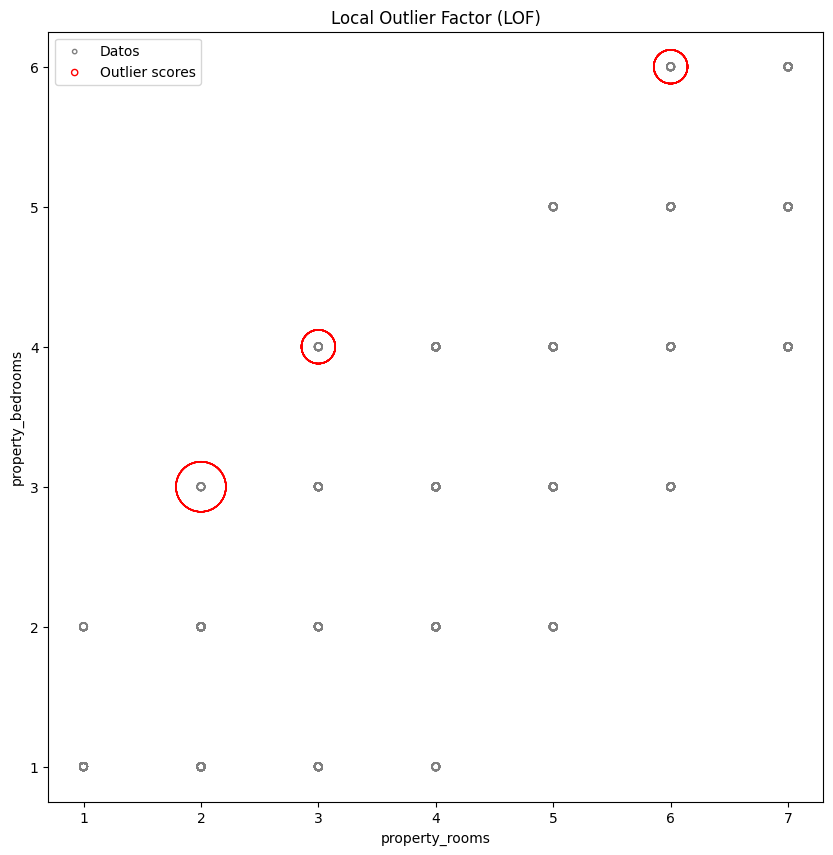

In [219]:
create_lof_graph(new_rooms_bedrooms_lof_df, 'property_rooms', 'property_bedrooms')

Como podemos observar, LOF parece estar marcandonos 3 outliers. Pareceria estar cumpliendo que un ambiente no puede ser mayor o igual al numero de habitaciones. No vimos un patro grande en el dataset que se rija bajo este criterio asi que en prinicpio no vamos a tomar accion al respecto. Lo grueso fue eliminado con mahalanobis.

##### Analisis de outliers para superficie total y superficie cubierta

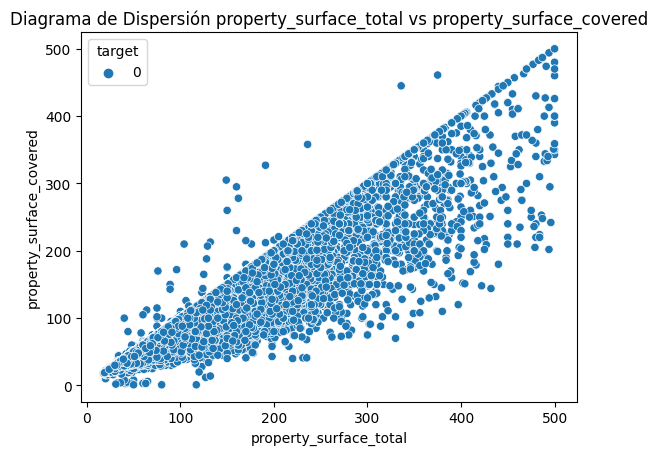

In [220]:
total_covered_lof_df = create_dispersion_diagram(ds_train, 'property_surface_total',
                                                 'property_surface_covered')

In [221]:
new_total_covered_lof_df = create_scores_based_on_training(total_covered_lof_df, 'property_surface_total',
                                                           'property_surface_covered')
new_total_covered_lof_df

id start_date                      end_date  \
398521  kF0bkHgPamCYCqXRPCkz6A== 2021-02-13 2021-03-18 00:00:00.000000000   
62011   +PS3s7A+625etA9FbozFfg== 2021-05-01 2021-06-05 00:00:00.000000000   
162533  h7yKWe6AxLEXDuiie8H1Lw== 2021-10-07 2022-02-09 00:00:00.000000000   
335927  N+EXjJzYi3nQjO00RitsSg== 2021-07-21 2021-09-17 00:00:00.000000000   
215696  Zn+HbEZkzNah/nBC6OolNg== 2021-11-17 2021-12-16 00:00:00.000000000   
...                          ...        ...                           ...   
406653  kpWtFhPJ4DdbedG4GNRw5A== 2021-01-07 2021-01-08 00:00:00.000000000   
168206  qr56uJ5cUqtiiOpD/rgqGw== 2021-04-30 2021-09-28 00:00:00.000000000   
144473  Kv3ZJUprHRnzn6krnUSzOQ== 2021-07-29 2021-08-09 00:00:00.000000000   
455367  nWAFWcKHS9znSfpFBZ7GyQ== 2021-12-16 2022-02-09 00:00:00.000000000   
78276   f6FilmImSq7Fner/TtMreA== 2021-06-21 2021-09-03 12:00:03.026354504   

          latitud   longitud       place_l3 property_type  property_rooms  \
398521 -34.598472 -58.390382       Recoleta  Departamento             3.0   
62011  -34.579804 -58.428419        Palermo  Departamento             1.0   
162533 -34.605690 -58.379238    San Nicolás  Departamento             3.0   
335927 -34.558359 -58.474674        Coghlan  Departamento             2.0   
215696 -34.568760 -58.488861  Villa Urquiza  Departamento             2.0   
...           ...        ...            ...           ...             ...   
406653 -34.615153 -58.430898      Caballito  Departamento             4.0   
168206 -34.625174 -58.368031      San Telmo  Departamento             1.0   
144473 -34.554342 -58.453316       Belgrano  Departamento             4.0   
455367 -34.576779 -58.497455  Villa Urquiza  Departamento             2.0   
78276  -34.559953 -58.455791       Belgrano  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
398521                2.0                    68.0                      68.0   
62011                 1.0                    25.0                      23.0   
162533                2.0                    64.0                      61.0   
335927                1.0                    75.0                      68.0   
215696                1.0                    43.0                      38.0   
...                   ...                     ...                       ...   
406653                3.0                    82.0                      79.0   
168206                1.0                    39.0                      39.0   
144473                2.0                   138.0                     138.0   
455367                1.0                    55.0                      48.0   
78276                 1.0                    51.0                      43.0   

        property_price                                     property_title  \
398521        196000.0                  Departamento de 3 amb en Recoleta   
62011          78500.0                             Departamento - Palermo   
162533        135000.0   Venta 3 ambientes piso 18 con cochera y baulera    
335927        175000.0    2 AMB EN COGHLAN MUY LUMINOSO C COCHERA PILETA.   
215696         89000.0  Departamento 2 ambientes - balcón - vista abie...   
...                ...                                                ...   
406653        189000.0           VENTA DEPARTAMENTO 4 AMBIENTES CABALLITO   
168206        105000.0          Monoambiente con o sin renta en San Telmo   
144473        370000.0  Impecable 3/4 amb en Duplex con balcón terraza...   
455367        134444.0       2AMB VENTA VILLA URQUIZA ENTREGA ESTIM 12/21   
78276         150800.0                            Departamento - Belgrano   

        target    scores  
398521       0 -1.000000  
62011        0 -1.000000  
162533       0 -1.000000  
335927       0 -1.000000  
215696       0 -1.000000  
...        ...       ...  
406653       0 -1.000000  
168206       0 -1.000000  
144473       0 -0.998536  
455367       0 -1.000000  
78276    

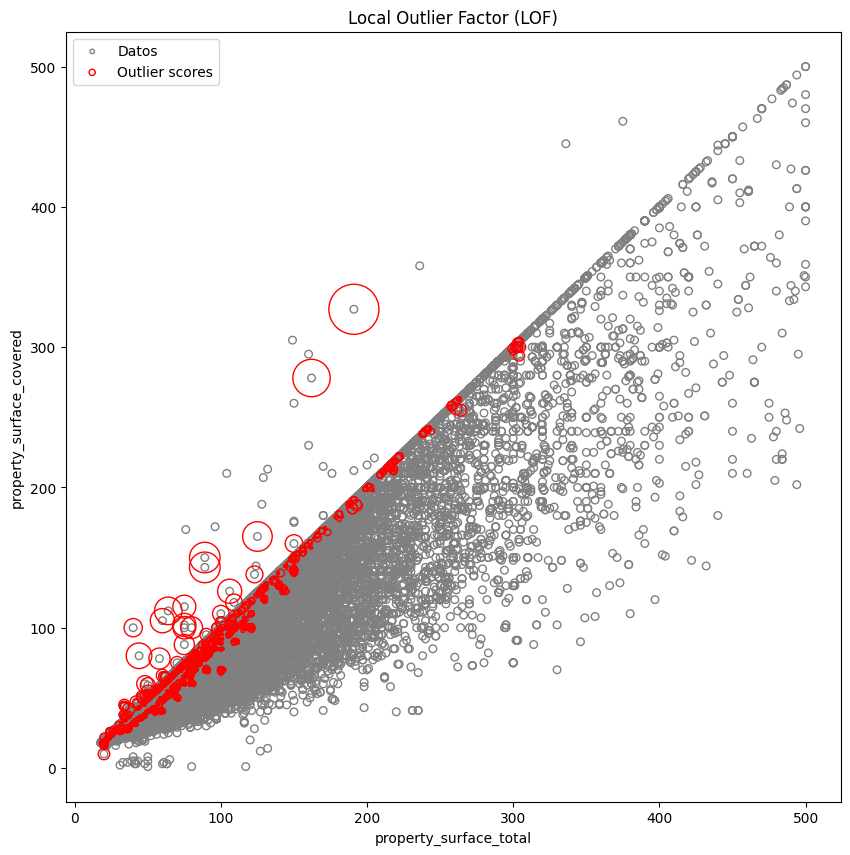

In [222]:
create_lof_graph(new_total_covered_lof_df, 'property_surface_total', 'property_surface_covered')

Como vemos en el grafico de LOF pareceria que la superifice total no puede ser exactamente igual a la superificie cubierta, por eso la deteccion de outiers a lo largo de la recta con pendiente creciente. Como no tenemos especificaciones tecnicas de cuantos metros menos deberia tener una superificie cubierta con respecto a la total, no vamos a tocar los datos.

#### Isolation Forest

##### Analisis de outliers para ambientes y habitaciones

Estos plots los hicimos meramente para probar el algoritmos de Isolation Forest pero no fue tomado en cuenta para tomar ninguna decision.

De hecho noatr que no se trabajaron el resto de las variables.

In [223]:
rooms_bedrooms_iforest = ds_train[['property_rooms', 'property_bedrooms']]
rooms_bedrooms_iforest = rooms_bedrooms_iforest[~(rooms_bedrooms_iforest['property_rooms'].isna())]
rooms_bedrooms_iforest = rooms_bedrooms_iforest[~(rooms_bedrooms_iforest['property_bedrooms'].isna())]

iforest = IsolationForest(n_estimators=100, max_samples='auto',
                          contamination=0.05, max_features=2,
                          bootstrap=False, n_jobs=-1, random_state=1)

pred = iforest.fit_predict(rooms_bedrooms_iforest)
#Almaceno scores y etiquetas
rooms_bedrooms_iforest['scores'] = iforest.decision_function(rooms_bedrooms_iforest)
rooms_bedrooms_iforest['outlier_label'] = pred

#Observaciones anómalas
rooms_bedrooms_iforest[rooms_bedrooms_iforest.outlier_label == -1]

property_rooms  property_bedrooms    scores  outlier_label
6878               6.0                5.0 -0.128040             -1
101209             4.0                2.0 -0.046532             -1
372960             3.0                1.0 -0.025277             -1
256032             4.0                2.0 -0.046532             -1
163123             6.0                5.0 -0.128040             -1
...                ...                ...       ...            ...
23961              7.0                6.0 -0.175305             -1
206434             6.0                3.0 -0.084913             -1
204159             7.0                4.0 -0.121759             -1
186532             4.0                2.0 -0.046532             -1
144473             4.0                2.0 -0.046532             -1

[3272 rows x 4 columns]

In [224]:
rooms_bedrooms_iforest.outlier_label.value_counts()

 1    66371
-1     3272
Name: outlier_label, dtype: int64

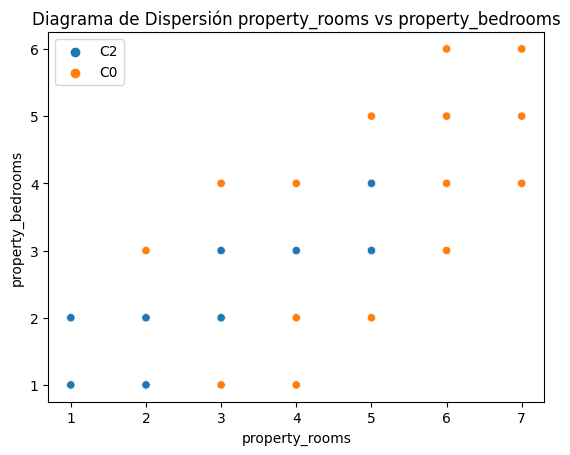

In [225]:
#Grafico dispersograma
color = [f"C{n + 1}" for n in (rooms_bedrooms_iforest['outlier_label'].values)]

sns.scatterplot(x=rooms_bedrooms_iforest['property_rooms'], y=rooms_bedrooms_iforest['property_bedrooms'], hue=color)
plt.title('Diagrama de Dispersión property_rooms vs property_bedrooms')
plt.show()

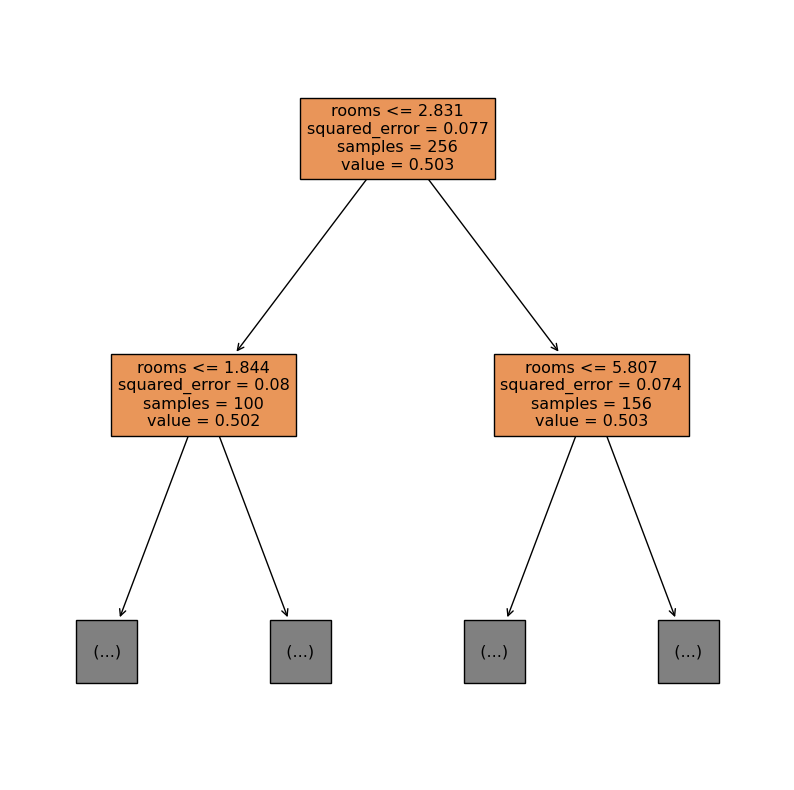

In [226]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(10, 10))
sk.tree.plot_tree(estimator, feature_names=['rooms', 'bedrooms'], filled=True, max_depth=1)
plt.show()

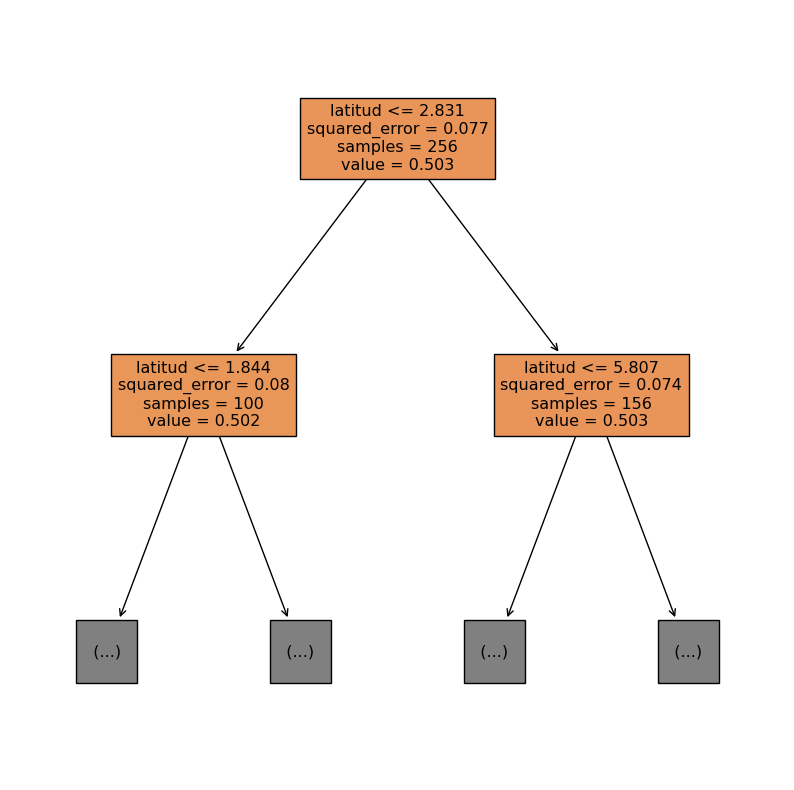

In [227]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(10, 10))
sk.tree.plot_tree(estimator, feature_names=['latitud', 'longitud'], filled=True, max_depth=1)
plt.show()

Habiendo hecho el análisis de valores atípicos y las imputaciones necesarias, finalmente eliminamos la columna id que usamos para hacer algunos merges.

In [228]:
# Train
ds_train.drop(columns=['id'], inplace=True)

# Test
ds_test.drop(columns=['id'], inplace=True)

## Reduccion de la Dimensionalidad

### Analisis PCA

Para poder realizar el análisis PCA del dataset es necesario que todos los campos sean numéricos.
Vamos a deshacernos de las siguientes columnas:
- ID: no aporta información
- Fechas y título: no pueden adaptarse a un formato numérico
- place_l3: es información redundante cuando tenemos latitud y longitud.
- property_price: es la variable que queremos predecir


In [229]:
from sklearn.preprocessing import StandardScaler

ds_reducido = ds_train.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido

latitud   longitud  property_rooms  property_bedrooms  \
398521 -34.598472 -58.390382             3.0                2.0   
62011  -34.579804 -58.428419             1.0                1.0   
162533 -34.605690 -58.379238             3.0                2.0   
335927 -34.558359 -58.474674             2.0                1.0   
215696 -34.568760 -58.488861             2.0                1.0   
...           ...        ...             ...                ...   
406653 -34.615153 -58.430898             4.0                3.0   
168206 -34.625174 -58.368031             1.0                1.0   
144473 -34.554342 -58.453316             4.0                2.0   
455367 -34.576779 -58.497455             2.0                1.0   
78276  -34.559953 -58.455791             2.0                1.0   

        property_surface_total  property_surface_covered  
398521                    68.0                      68.0  
62011                     25.0                      23.0  
162533                    64.0                      61.0  
335927                    75.0                      68.0  
215696                    43.0                      38.0  
...                        ...                       ...  
406653                    82.0                      79.0  
168206                    39.0                      39.0  
144473                   138.0                     138.0  
455367                    55.0                      48.0  
78276                     51.0                      43.0  

[69643 rows x 6 columns]

In [230]:
ds_reducido.shape

(69643, 6)

Procedemos ahora a normalizar las columnas del dataframe

In [231]:
ds_reducido_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido), columns=ds_reducido.columns)
ds_reducido_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0     -0.083512  1.332271        0.224792           0.172390   
1      0.623951  0.311557       -1.398346          -0.889033   
2     -0.357046  1.631305        0.224792           0.172390   
3      1.436642 -0.929675       -0.586777          -0.889033   
4      1.042491 -1.310369       -0.586777          -0.889033   
...         ...       ...             ...                ...   
69638 -0.715653  0.245037        1.036360           1.233813   
69639 -1.095417  1.932051       -1.398346          -0.889033   
69640  1.588879 -0.356533        1.036360           0.172390   
69641  0.738588 -1.540994       -0.586777          -0.889033   
69642  1.376250 -0.422954       -0.586777          -0.889033   

       property_surface_total  property_surface_covered  
0                   -0.234195                 -0.063467  
1                   -0.938038                 -0.953320  
2                   -0.299669                 -0.201889  
3                   -0.119616                 -0.063467  
4                   -0.643406                 -0.656702  
...                       ...                       ...  
69638               -0.005037                  0.154052  
69639               -0.708880                 -0.636928  
69640                0.911595                  1.320747  
69641               -0.446985                 -0.458957  
69642               -0.512458                 -0.557830  

[69643 rows x 6 columns]

#### Replicamos para test las mismas transformaciones

In [232]:
ds_reducido_test = ds_test.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido_test

latitud   longitud  property_rooms  property_bedrooms  \
30007  -34.606262 -58.415977             3.0                2.0   
261467 -34.645756 -58.370819             2.0                1.0   
429120 -34.576507 -58.451339             3.0                2.0   
103953 -34.629088 -58.389214             2.0                1.0   
397261 -34.547298 -58.459833             2.0                1.0   
...           ...        ...             ...                ...   
176606 -34.572269 -58.488552             3.0                2.0   
295790 -34.618667 -58.442071             3.0                2.0   
358715 -34.598834 -58.393725             4.0                3.0   
357022 -34.605153 -58.496739             2.0                1.0   
434076 -34.558434 -58.443661             2.0                1.0   

        property_surface_total  property_surface_covered  
30007                     82.0                      58.0  
261467                    58.0                      54.0  
429120                    67.0                      63.0  
103953                    56.0                      54.0  
397261                    31.0                      31.0  
...                        ...                       ...  
176606                    70.0                      70.0  
295790                    67.0                      61.0  
358715                   100.0                     100.0  
357022                    34.0                      34.0  
434076                    50.0                      40.0  

[15914 rows x 6 columns]

In [233]:
ds_reducido_test_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido_test), columns=ds_reducido.columns)
ds_reducido_test_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0     -0.469139  0.589481        0.238537           0.185026   
1     -2.160328  1.827092       -0.578174          -0.889610   
2      0.805011 -0.379655        0.238537           0.185026   
3     -1.446558  1.322969       -0.578174          -0.889610   
4      2.055758 -0.612442       -0.578174          -0.889610   
...         ...       ...             ...                ...   
15909  0.986496 -1.399537        0.238537           0.185026   
15910 -1.000312 -0.125665        0.238537           0.185026   
15911 -0.151067  1.199334        1.055248           1.259662   
15912 -0.421663 -1.623915       -0.578174          -0.889610   
15913  1.578901 -0.169238       -0.578174          -0.889610   

       property_surface_total  property_surface_covered  
0                    0.007677                 -0.247372  
1                   -0.387767                 -0.328853  
2                   -0.239476                 -0.145520  
3                   -0.420721                 -0.328853  
4                   -0.832643                 -0.797369  
...                       ...                       ...  
15909               -0.190045                 -0.002929  
15910               -0.239476                 -0.186261  
15911                0.304261                  0.608179  
15912               -0.783212                 -0.736258  
15913               -0.519582                 -0.614036  

[15914 rows x 6 columns]

Armamos ahora la matriz de correlación del dataset normalizado

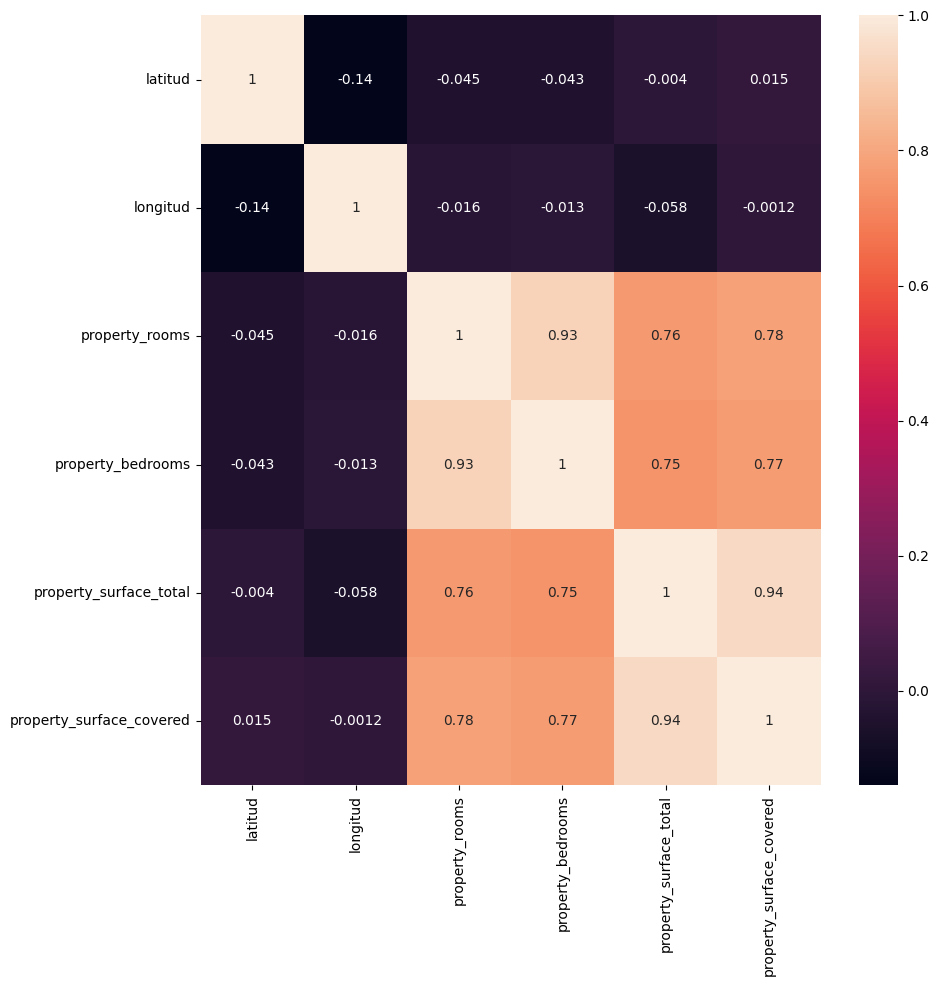

In [234]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(ds_reducido_normalizado.corr(), annot=True)

Como era de esperarse, podemos ver que existe una correlación muy fuerte entre property_surface_total y property_surface_covered y entre property_rooms y property_bedrooms

Ahora si comenzamos con PCA y calculamos las componentes principales, elegimos el mismo número de variables que en el dataframe anterior

In [235]:
ds_reducido_normalizado.shape

(69643, 6)

In [236]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
superficie_transformada = pca.fit_transform(ds_reducido_normalizado)

ds_pca = pd.DataFrame(data=superficie_transformada,
                      columns=['cp_1', 'cp_2', 'cp_3', 'cp_4', 'cp_5', 'cp_6'])
ds_pca

cp_1      cp_2      cp_3      cp_4      cp_5      cp_6
0      0.028114  1.019997 -0.875131 -0.330653 -0.048688 -0.048017
1     -2.103759 -0.238629 -0.623278  0.147088  0.356696  0.027862
2     -0.075362  1.429187 -0.885508 -0.405079 -0.052694  0.014293
3     -0.832014 -1.712071 -0.364354  0.527797 -0.198943 -0.083198
4     -1.379605 -1.667896  0.225082  0.003151 -0.215075 -0.040674
...         ...       ...       ...       ...       ...       ...
69638  1.213199  0.749332  0.350115 -1.009340  0.115443 -0.065359
69639 -1.832964  2.102864 -0.589461  0.566837  0.368827 -0.010127
69640  1.707157 -1.399547 -0.937227  0.380379 -0.591114 -0.291848
69641 -1.173834 -1.626861  0.587333  0.220525 -0.206748 -0.066313
69642 -1.284479 -1.287399 -0.645613  0.100311 -0.215847  0.026000

[69643 rows x 6 columns]

In [237]:
varianza_explicada = pca.explained_variance_ratio_
for varianza in varianza_explicada:
    print(round(varianza, 2))

0.58
0.19
0.14
0.07
0.01
0.01


In [238]:
varianza_explicada.cumsum()

array([0.57806622, 0.76862695, 0.91222414, 0.97909805, 0.99093983,
       1.        ])

Podemos ver que con 3 componentes llegamos a un 91% de la varianza, trataremos de ver esto en un gráfico

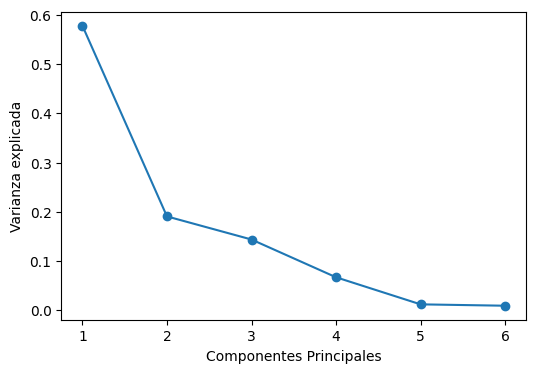

In [239]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))

plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

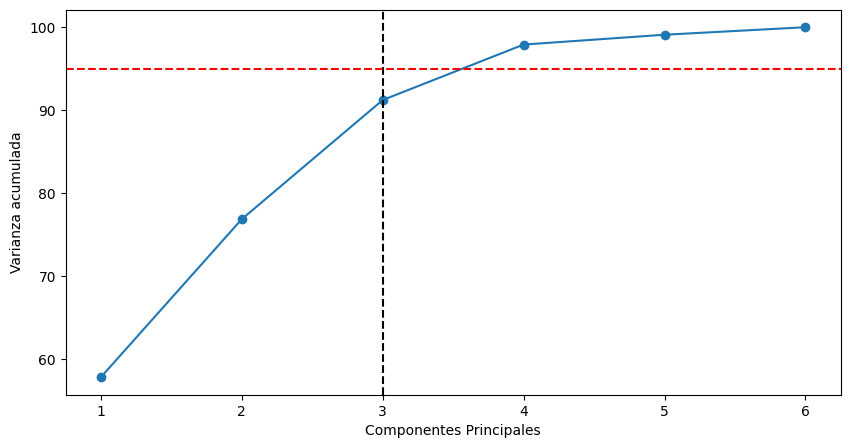

In [240]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))
k = np.argmax(varianza_explicada.cumsum() * 100 > 95)

plt.figure(figsize=(10, 5))
plt.plot(list_x, varianza_explicada.cumsum() * 100, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza acumulada')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.show()

Con 3 componentes logramos explicar más del 90% de la varianza, por lo que nos quedaremos con esta reducción.

In [241]:
ds_pca.drop(columns=['cp_4', 'cp_5', 'cp_6'], inplace=True)
ds_pca.head()

cp_1      cp_2      cp_3
0  0.028114  1.019997 -0.875131
1 -2.103759 -0.238629 -0.623278
2 -0.075362  1.429187 -0.885508
3 -0.832014 -1.712071 -0.364354
4 -1.379605 -1.667896  0.225082

## Agrupamiento

Importamos librerías de agrupamiento.

In [242]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from pyclustertend import hopkins

ModuleNotFoundError: No module named 'yellowbrick'

Para el analisis de agrupamiento incorporaremos el precio

In [243]:
ds_agrupamiento = ds_reducido.copy()
ds_agrupamiento['property_price'] = ds_train.property_price
ds_agrupamiento

latitud   longitud  property_rooms  property_bedrooms  \
398521 -34.598472 -58.390382             3.0                2.0   
62011  -34.579804 -58.428419             1.0                1.0   
162533 -34.605690 -58.379238             3.0                2.0   
335927 -34.558359 -58.474674             2.0                1.0   
215696 -34.568760 -58.488861             2.0                1.0   
...           ...        ...             ...                ...   
406653 -34.615153 -58.430898             4.0                3.0   
168206 -34.625174 -58.368031             1.0                1.0   
144473 -34.554342 -58.453316             4.0                2.0   
455367 -34.576779 -58.497455             2.0                1.0   
78276  -34.559953 -58.455791             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  
398521                    68.0                      68.0        196000.0  
62011                     25.0                      23.0         78500.0  
162533                    64.0                      61.0        135000.0  
335927                    75.0                      68.0        175000.0  
215696                    43.0                      38.0         89000.0  
...                        ...                       ...             ...  
406653                    82.0                      79.0        189000.0  
168206                    39.0                      39.0        105000.0  
144473                   138.0                     138.0        370000.0  
455367                    55.0                      48.0        134444.0  
78276                     51.0                      43.0        150800.0  

[69643 rows x 7 columns]

In [ ]:
sns.pairplot(ds_agrupamiento, diag_kind='kde');

In [ ]:
hopkins(ds_agrupamiento, ds_agrupamiento.shape[0])

Para la estadística de Hopkins, un valor cercano a cero indica que la distribución es bastante uniforme y que hay poca tendencia al clustering.

Si bien es dificil identificar agrupamientos en estos gráficos, probaremos buscarlos mediante el uso de KMeans

#### Método de Elbow

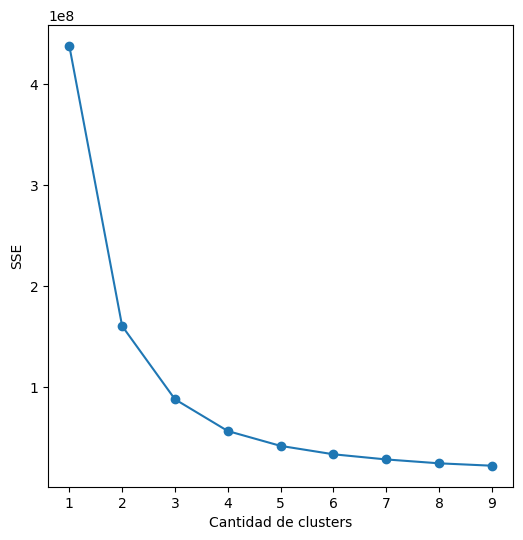

In [244]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(ds_reducido)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

Podemos ver que para 2 o 3 clusters la pendiente cambia de forma bastante significativa. Probaremos predicciones con KMeans para esas cantidades.

#### KMeans

In [245]:
kmeans = KMeans(2, random_state=0)
kmeans.fit(ds_reducido)

y_2_clusters = pd.Series(kmeans.predict(ds_reducido), name='clusters', index=ds_reducido.index)

In [246]:
y_2_clusters.value_counts()

0    60226
1     9417
Name: clusters, dtype: int64

In [ ]:
sns.pairplot(pd.concat([ds_agrupamiento, y_2_clusters], axis=1), hue='clusters');

In [247]:
kmeans = KMeans(3, random_state=0)
kmeans.fit(ds_reducido)

y_3_clusters = pd.Series(kmeans.predict(ds_reducido), name='clusters', index=ds_reducido.index)

In [ ]:
sns.pairplot(pd.concat([ds_agrupamiento, y_3_clusters], axis=1), hue='clusters');

Podemos ver como en varios de los graficos los datos se agrupan de la misma manera convirtiéndose en más caros a medida que crecen principialmente los ambientes y los metros cuadrados (superficie total y cubierta).

### Analisis de Silhouette

Realizaremos un analisis de Silhouette para evaluar la calidad de los clusters.

In [248]:
list_k = list(range(2, 5))
sse = []

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(ds_agrupamiento)
    score = silhouette_score(ds_agrupamiento, preds)
    print(f"Para {n_clusters} el puntaje de Silhouette es " + str(score))

Para 2 el puntaje de Silhouette es 0.744160679723918
Para 3 el puntaje de Silhouette es 0.6573981588851979
Para 4 el puntaje de Silhouette es 0.6031210375991453


El mejor puntaje es el de 2 clusters. Cuanto más cerca de 1 mayor tendencia a agruparse. Evaluaremos la calidad de los clusters mediante el gráfico de silueta

#### Para 2 clusters

In [ ]:
model = KMeans(2, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(ds_agrupamiento)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
barrios.plot(ax=ax, color='Grey')
sns.scatterplot(ax=ax, data=ds_train, x='longitud', y='latitud', hue=y_2_clusters)

ax.set(title='Avisos en CABA segun tipo de propiedad')
plt.show()

#### Para 3 clusters

In [ ]:
model = KMeans(3, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')  # Instancio el visualizador
visualizer.fit(ds_agrupamiento)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
barrios.plot(ax=ax, color='Grey')
sns.scatterplot(ax=ax, data=ds_train, x='longitud', y='latitud', hue=y_3_clusters)

ax.set(title='Avisos en CABA segun tipo de propiedad')
plt.show()

Luego de analizar los datos, vemos que en este dominio de problema se forman tres clusters a partir de la relacion de los ambientes y las habitaciones y la superifice total y cubierta. Es decir, vemos que se forman grupos con un precio acorde a a la cantidad de metros cuadrados que tenga la vivienda y a su vez, los metros cuadrados van a tener una estrecha correlacion con los metros cuadrados. Por ejemplo, dentro de un cluster podriamos encontrar un 2 ambientes con una habitacion de 70 metros cuadrados vendiendose a 70 usd.

## Clasificación

In [249]:
def precio_metro_cuadrado(dataset):
    pxm2 = dataset['property_price'] / dataset['property_surface_total']
    sorted_pxm2 = pxm2.sort_values(ascending=True)
    return (pxm2, sorted_pxm2)

(pxm2, sorted_pxm2) = precio_metro_cuadrado(ds_train)
pxm2.describe()

count    69643.000000
mean      2272.377550
std        695.020334
min        333.333333
25%       1790.909091
50%       2227.272727
75%       2709.677419
max       4278.846154
dtype: float64

Definiremos la variable tipo_precio con 3 valores posibles, alto, medio y bajo.

#### Primera variable (33% bajo, 33% medio, 33% alto)

La primera clasificación tiene que tener la misma cantidad de registros en las 3 diferentes categorias

In [250]:
def agregar_variable(dataset, categoria, nombre_categoria, pxm2, sorted_pxm2):
    nueva_categoria = pd.DataFrame()
    nueva_categoria['pxm2'] = sorted_pxm2
    nueva_categoria[nombre_categoria] = categoria
    dataset[nombre_categoria] = pxm2
    dataset[nombre_categoria] = nueva_categoria[nombre_categoria]
    return dataset

def imprimir_limites(dataset, categoria):
    valores_bajos = dataset[dataset[categoria]== 'Bajo']
    valores_medios = dataset[dataset[categoria] == 'Medio']
    valores_altos = dataset[dataset[categoria] == 'Alto']
    print(f'Minimo bajo: {valores_bajos.pxm2.min()}, Maximo bajo: {valores_bajos.pxm2.max()}')
    print(f'Minimo medio: {valores_medios.pxm2.min()}, Maximo medio: {valores_medios.pxm2.max()}')
    print(f'Minimo alto: {valores_altos.pxm2.min()}, Maximo alto: {valores_altos.pxm2.max()}')

In [251]:
ds_train['pxm2'] = pxm2
categoria = []
for i in range(0, len(sorted_pxm2) // 3):
    categoria.append('Bajo')
for i in range(len(sorted_pxm2) // 3, 2 * len(sorted_pxm2) // 3):
    categoria.append('Medio')
for i in range(2 * len(sorted_pxm2) // 3, len(sorted_pxm2)):
    categoria.append('Alto')

ds_train = agregar_variable(ds_train, categoria, 'clasificacion_1', pxm2, sorted_pxm2)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de la categoria 1'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

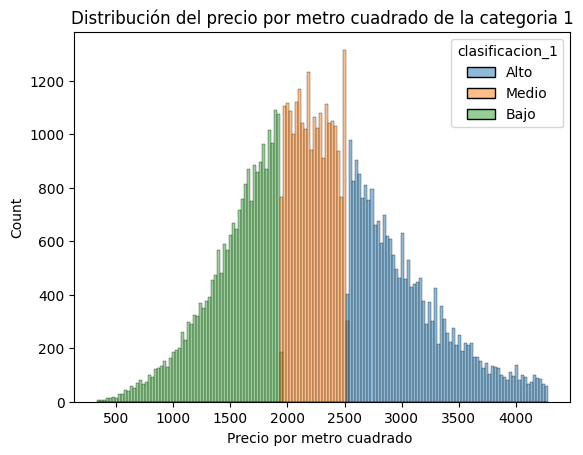

In [252]:
sns.histplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.clasificacion_1, bins=150).set(title='Distribución del precio por metro cuadrado de la categoria 1', xlabel='Precio por metro cuadrado ')

In [253]:
ds_train.clasificacion_1.value_counts()

Alto     23215
Medio    23214
Bajo     23214
Name: clasificacion_1, dtype: int64

In [254]:
imprimir_limites(ds_train,'clasificacion_1')

Minimo bajo: 333.3333333333333, Maximo bajo: 1943.0555555555557
Minimo medio: 1943.0555555555557, Maximo medio: 2529.4117647058824
Minimo alto: 2529.4117647058824, Maximo alto: 4278.846153846154


#### Segunda variable (25% bajo, 50% medio, 25% alto)

In [255]:
def separar_25_50_25(dataset):
    categoria = []
    for i in range(0, len(dataset) // 4):
        categoria.append('Bajo')
    for i in range(len(dataset) // 4, 3 * len(dataset) // 4):
        categoria.append('Medio')
    for i in range(3 * len(dataset) // 4, len(dataset)):
        categoria.append('Alto')

    return categoria

In [256]:
categoria = separar_25_50_25(ds_train)
ds_train = agregar_variable(ds_train, categoria, 'clasificacion_2', pxm2, sorted_pxm2)

[Text(0.5, 1.0, 'Distribución de las categorías en relación al precio por metro cuadrado'),
 Text(0.5, 0, 'Precio por metro cuadrado'),
 Text(0, 0.5, 'Cantidad')]

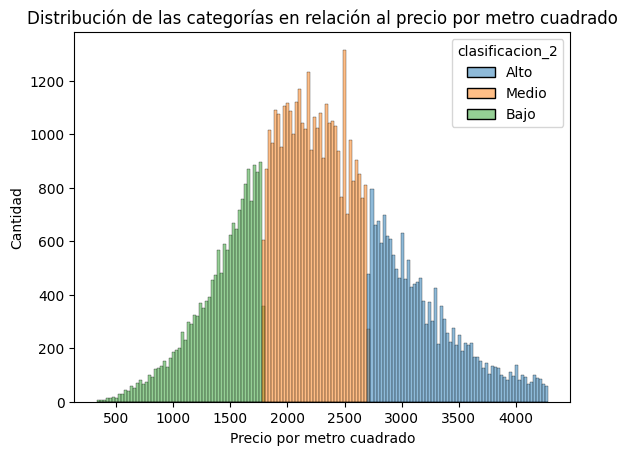

In [257]:
sns.histplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.clasificacion_2, bins=150).set(title='Distribución de las categorías en relación al precio por metro cuadrado', xlabel='Precio por metro cuadrado', ylabel='Cantidad')

In [258]:
ds_train.clasificacion_2.value_counts()

Medio    34822
Alto     17411
Bajo     17410
Name: clasificacion_2, dtype: int64

In [259]:
imprimir_limites(ds_train, 'clasificacion_2')

Minimo bajo: 333.3333333333333, Maximo bajo: 1790.9
Minimo medio: 1790.909090909091, Maximo medio: 2709.6774193548385
Minimo alto: 2709.6774193548385, Maximo alto: 4278.846153846154


#### Tercera variable (25-50-25 por tipo de propiedad)

##### Casas

In [260]:
casas = ds_train[ds_train.property_type == 'Casa'].copy()
dptos = ds_train[ds_train.property_type == 'Departamento'].copy()
phs = ds_train[ds_train.property_type == 'PH'].copy()

<AxesSubplot: xlabel='pxm2', ylabel='Count'>

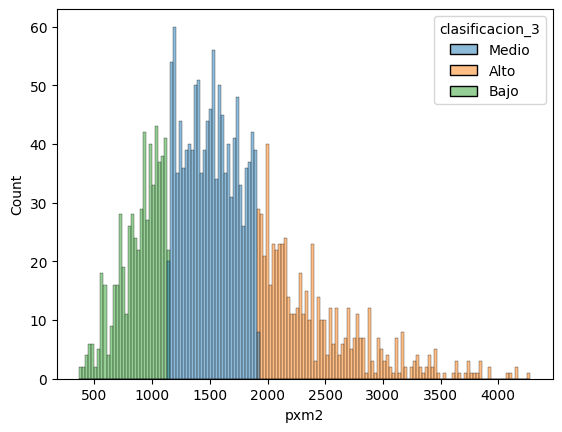

In [261]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(casas)
categoria = separar_25_50_25(casas)
casas = agregar_variable(casas, categoria, 'clasificacion_3', pxm2, sorted_pxm2)
sns.histplot(data=casas, x=casas.pxm2, hue=casas.clasificacion_3, bins=150)

##### Departamentos

<AxesSubplot: xlabel='pxm2', ylabel='Count'>

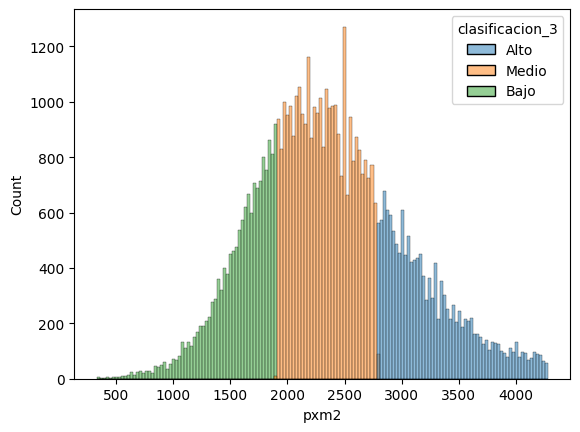

In [262]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(dptos)
categoria = separar_25_50_25(dptos)
dptos = agregar_variable(dptos, categoria, 'clasificacion_3', pxm2, sorted_pxm2)
sns.histplot(data=dptos, x=dptos.pxm2, hue=dptos.clasificacion_3, bins=150)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de departamentos'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

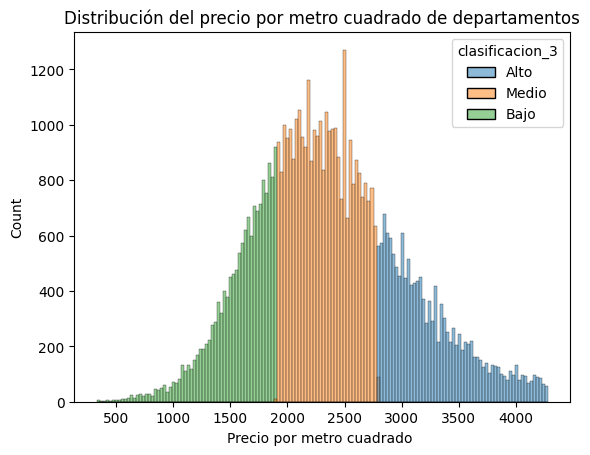

In [263]:
sns.histplot(data=dptos, x=dptos.pxm2, hue=dptos.clasificacion_3, bins=150).set(title='Distribución del precio por metro cuadrado de departamentos', xlabel='Precio por metro cuadrado ')

##### PH

<AxesSubplot: xlabel='pxm2', ylabel='Count'>

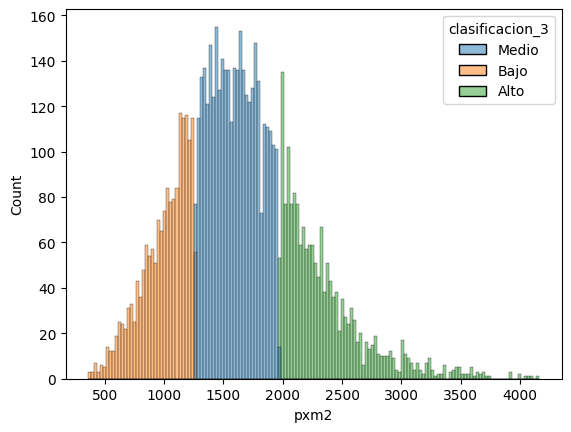

In [264]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(phs)
categoria = separar_25_50_25(phs)
phs = agregar_variable(phs, categoria, 'clasificacion_3', pxm2, sorted_pxm2)
sns.histplot(data=phs, x=phs.pxm2, hue=phs.clasificacion_3, bins=150)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de Phs'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

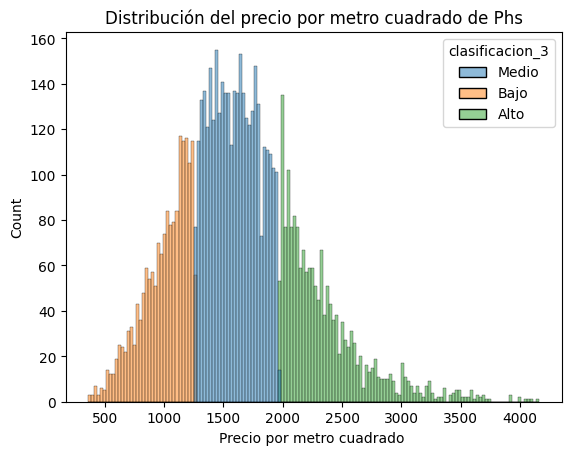

In [265]:
sns.histplot(data=phs, x=phs.pxm2, hue=phs.clasificacion_3, bins=150).set(title='Distribución del precio por metro cuadrado de Phs', xlabel='Precio por metro cuadrado ')

##### Union de las 3 al dataset

In [266]:
nueva_categoria = pd.concat([casas,dptos, phs])
ds_train['clasificacion_3'] = nueva_categoria['clasificacion_3']

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de toda propiedad'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

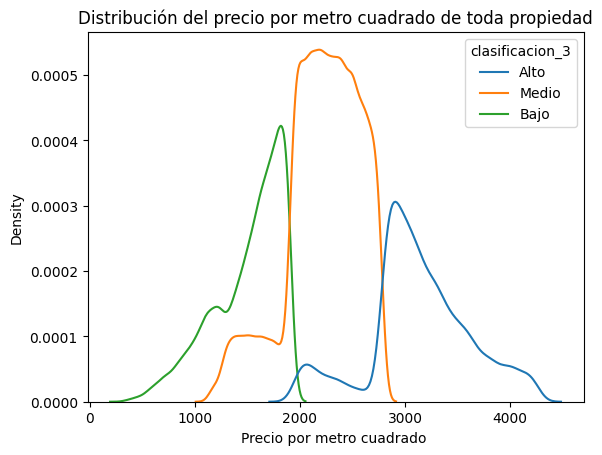

In [267]:
sns.kdeplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.clasificacion_3).set(title='Distribución del precio por metro cuadrado de toda propiedad', xlabel='Precio por metro cuadrado ')

In [268]:
ds_train.clasificacion_3.value_counts()

Medio    34822
Alto     17412
Bajo     17409
Name: clasificacion_3, dtype: int64

##### Distribución del precio por metro cuadrado

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado'),
 Text(0.5, 0, 'Precio por metro cuadrado de departamentos')]

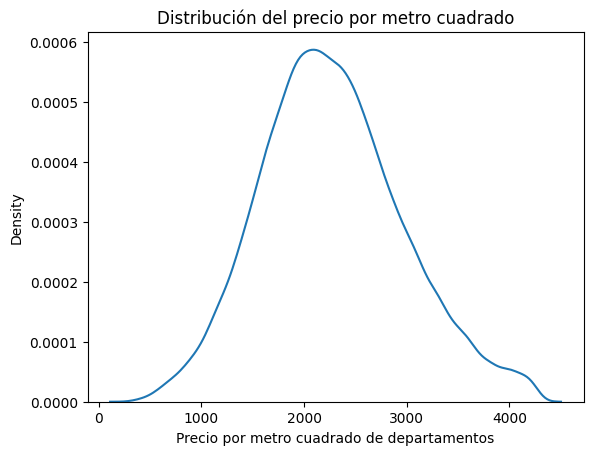

In [269]:
sns.kdeplot(data=ds_train, x=ds_train.pxm2).set(title='Distribución del precio por metro cuadrado', xlabel='Precio por metro cuadrado de departamentos')

##### Distribución del precio por metro cuadrado por tipo de propiedad

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de cada tipo de propiedad'),
 Text(0.5, 0, 'Precio por metro cuadrado')]

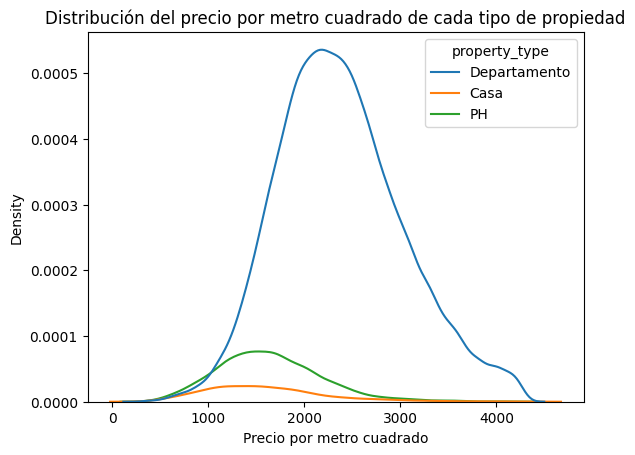

In [270]:
sns.kdeplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.property_type).set(title='Distribución del precio por metro cuadrado de cada tipo de propiedad', xlabel='Precio por metro cuadrado')

#### Conclusión

Viendo como el precio por metro cuadrado de departamentos es mayor al de casas y phs tiene sentido el tomar la tercera variable por sobre las otras 2. Ya que caso contrario la categorización de las casas y phs se vería contaminada por el de los departamentos, ya que algunos casos de casas que serían caras por si mismas terminan siendo de precio medio ya que el mismo número para los
departamentos no es caro.

In [271]:
ds_train.drop(axis=1, columns=['clasificacion_1', 'clasificacion_2'], inplace=True)
ds_train.rename(columns= {'clasificacion_3':'tipo_precio'}, inplace=True)

#### Construccion de la variable en Test

In [272]:
ds_test['pxm2'] = ds_test['property_price'] / ds_test['property_surface_total']

In [273]:
lista_tipo_precio_test = []
for registro in ds_test.itertuples():
    #print(registro.Index)
    if registro.property_type == 'Casa':
        if registro.pxm2 < casas[casas['clasificacion_3'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > casas[casas['clasificacion_3'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')
    elif registro.property_type == 'Departamento':
        if registro.pxm2 < dptos[dptos['clasificacion_3'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > dptos[dptos['clasificacion_3'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')
    elif registro.property_type == 'PH':
        if registro.pxm2 < phs[phs['clasificacion_3'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > phs[phs['clasificacion_3'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')




In [274]:
len(lista_tipo_precio_test)

15914

In [275]:
len(ds_test)

15914

In [276]:
ds_test['tipo_precio'] = pd.Series(data=lista_tipo_precio_test, name='tipo_precio', index=ds_test.index)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado en el dataset de testeo'),
 Text(0.5, 0, 'Precio por metro cuadrado')]

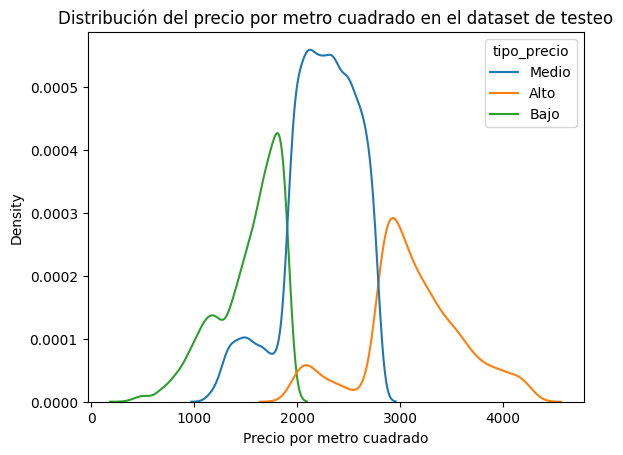

In [277]:
sns.kdeplot(data=ds_test, x=ds_test.pxm2, hue=ds_test.tipo_precio).set(title='Distribución del precio por metro cuadrado en el dataset de testeo', xlabel='Precio por metro cuadrado')

#### Comparación con los resultados de Kmeans

In [278]:
copia_3_clusters = y_3_clusters.copy()
copia_3_clusters.replace(to_replace=0, value='Medio', inplace= True)
copia_3_clusters.replace(to_replace=1, value='Bajo', inplace= True)
copia_3_clusters.replace(to_replace=2, value='Alto', inplace= True)
ds_comparacion = pd.concat([ds_train, copia_3_clusters], axis=1)
print(f"Porcentaje de semejanza de clusters: {round(len(np.where(ds_comparacion.tipo_precio == ds_comparacion.clusters)[0]) / len(ds_comparacion) * 100, 2)} %")

Porcentaje de semejanza de clusters: 46.04 %


In [279]:
y_3_clusters.value_counts()

0    50780
2    15307
1     3556
Name: clusters, dtype: int64

Vemos que el porcentaje no parece ser lo suficientemente alto (Tomando el cluster más chico como el 'Alto', el más grande como el 'Medio' y como bajo el tercero, siendo esta la combinación que mejor porcentaje de semejanza da con 45,9 %) como para intuir que están relacionados los clusters.
Vamos a recrear uno de los gráficos hechos arriba de precio total contra superficie esta vez coloreando la clasificación de precio en vez a ver si los graficos se parecen.

[Text(0.5, 1.0, 'Analisis del tipo de precio en relacion al precio total y la superficie'),
 Text(0.5, 0, 'Superficie total'),
 Text(0, 0.5, 'Precio de la propiedad')]

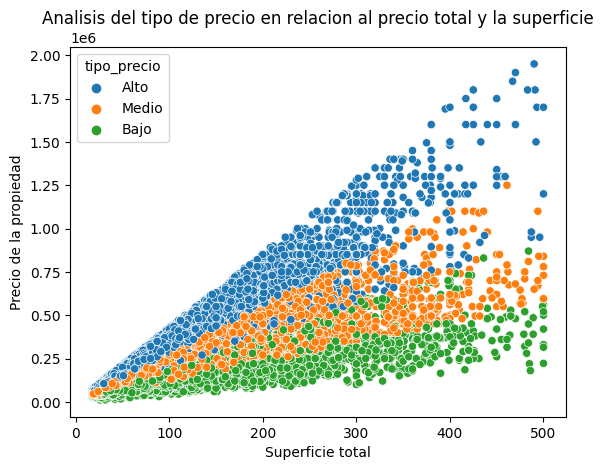

In [280]:
sns.scatterplot(data=ds_train, x=ds_train.property_surface_total, y=ds_train.property_price, hue=ds_train.tipo_precio).set(title='Analisis del tipo de precio en relacion al precio total y la superficie', xlabel='Superficie total', ylabel= 'Precio de la propiedad')

En efecto comparando el gráfico de tipo_precio con el de clusters de superficie total contra precio vemos que se tratan de 2 clasificaciones diferentes

NameError: name 'barrios' is not defined

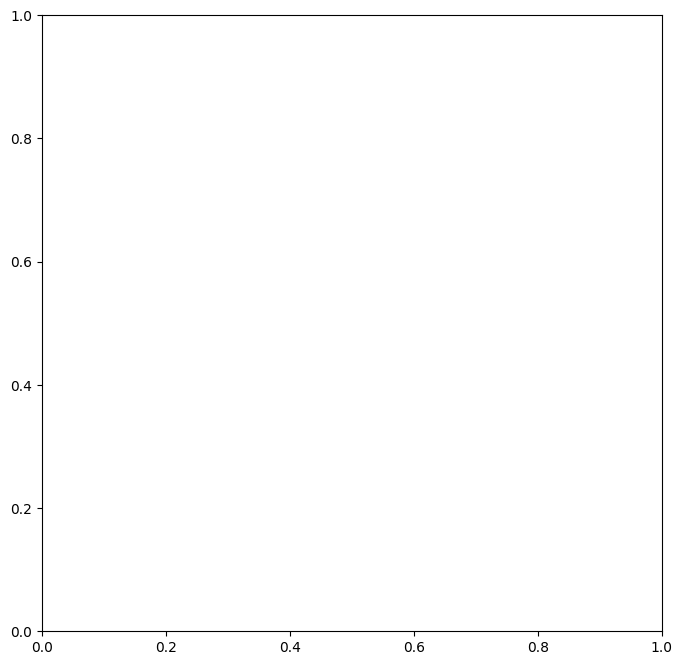

In [281]:
fig, ax = plt.subplots(figsize=(8, 8))
barrios.plot(ax=ax, color='Grey')
sns.scatterplot(ax=ax, data=ds_train, x='longitud', y='latitud', hue=ds_train['tipo_precio'])

ax.set(title='Avisos en CABA segun tipo_precio')
plt.show()

## Arbol de Decision - Clasificacion

En esta etapa, a la hora de crear el dataset con el cual vamos a predecir, tenemos que asegurarnos de borrar todas las variables que tengan una implicancia con el precio.

Factorizamos el tipo de precio para que pueda ser una variable numerica y podamos entrenar el modelo. 
No optamos por usar one hot encoding ya que sino tendriamos 3 variables de target y es muy dificil predecir y mantener todos esos valores.

In [282]:
#Creo un dataset con los features que voy a usar para clasificar
ds_train_x = ds_train.drop(['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price', 'pxm2', 'tipo_precio'], axis=1)

#Creo un dataset con la variable target
ds_train_y = pd.Series(pd.factorize(ds_train.tipo_precio)[0], index=ds_train.index)

#Genero los conjuntos de train y de test (proporcion 80/20)
x_train, x_test, y_train, y_test = train_test_split(ds_train_x, ds_train_y, test_size=0.2, random_state=2) #semilla


In [283]:
#Creamos un clasificador
tree_model = tree.DecisionTreeClassifier()

#Entrenamos el modelo
model = tree_model.fit(X = x_train, y = y_train)

In [284]:
#Obtenemos la maxima profundidad del arbol para luego evaluar hiperparametros
tree_model.get_depth()

42

In [285]:
#Realizamos una predicción sobre el set de test
y_pred = model.predict(x_test)

In [286]:
#Valores Predichos
y_pred

array([2, 0, 1, ..., 0, 2, 2])

In [287]:
#Valores Reales
y_test.values

array([2, 0, 1, ..., 1, 1, 2])

In [288]:
#Probamos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test, y_pred),columns=['test','pred'])
ds_resultados.head()

test  pred
0     2     2
1     0     0
2     1     1
3     0     0
4     1     2

Text(50.722222222222214, 0.5, 'True')

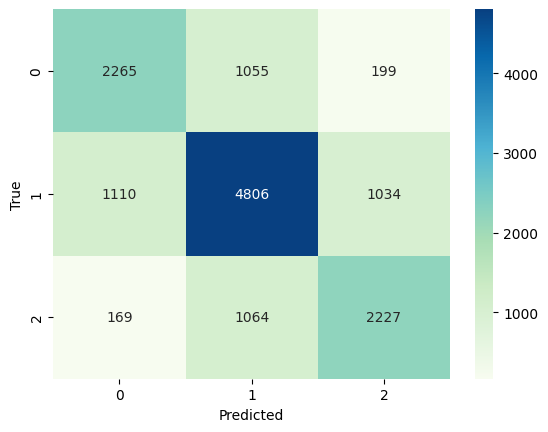

In [289]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [290]:
#Calculo las métricas en el conjunto de evaluación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      3519
           1       0.69      0.69      0.69      6950
           2       0.64      0.64      0.64      3460

    accuracy                           0.67     13929
   macro avg       0.66      0.66      0.66     13929
weighted avg       0.67      0.67      0.67     13929



In [291]:
#Realizamos una predicción sobre el set de train
x_pred = model.predict(x_train)

In [292]:
#Calculo las métricas en el conjunto de train
print(classification_report(y_train, x_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     13893
           1       0.97      0.97      0.97     27872
           2       0.99      0.96      0.97     13949

    accuracy                           0.97     55714
   macro avg       0.97      0.97      0.97     55714
weighted avg       0.97      0.97      0.97     55714



Como podemos observar, el conjunto de datos esta overfitteando. Mas adelante buscaremos mejores hiper parametros y podaremos el arbol para obtener mejores resultados y para poder cortar este overfitting.

In [293]:
model.classes_

array([0, 1, 2])

#### Grafico del arbol de decision

Realizamos un grafico del arbol entero, es decir, el arbol que venimos previamente analizado no sufrio ninguna modificacion ni ningun recorte. A partir de este arbol base vamos a tratar de buscar mejores resultados. Primero vemos un grafico para ver como luce el arbol. Elegimos un max_depth = 2 para mostrar una porcion representativa ya que el arbol es muy grande.

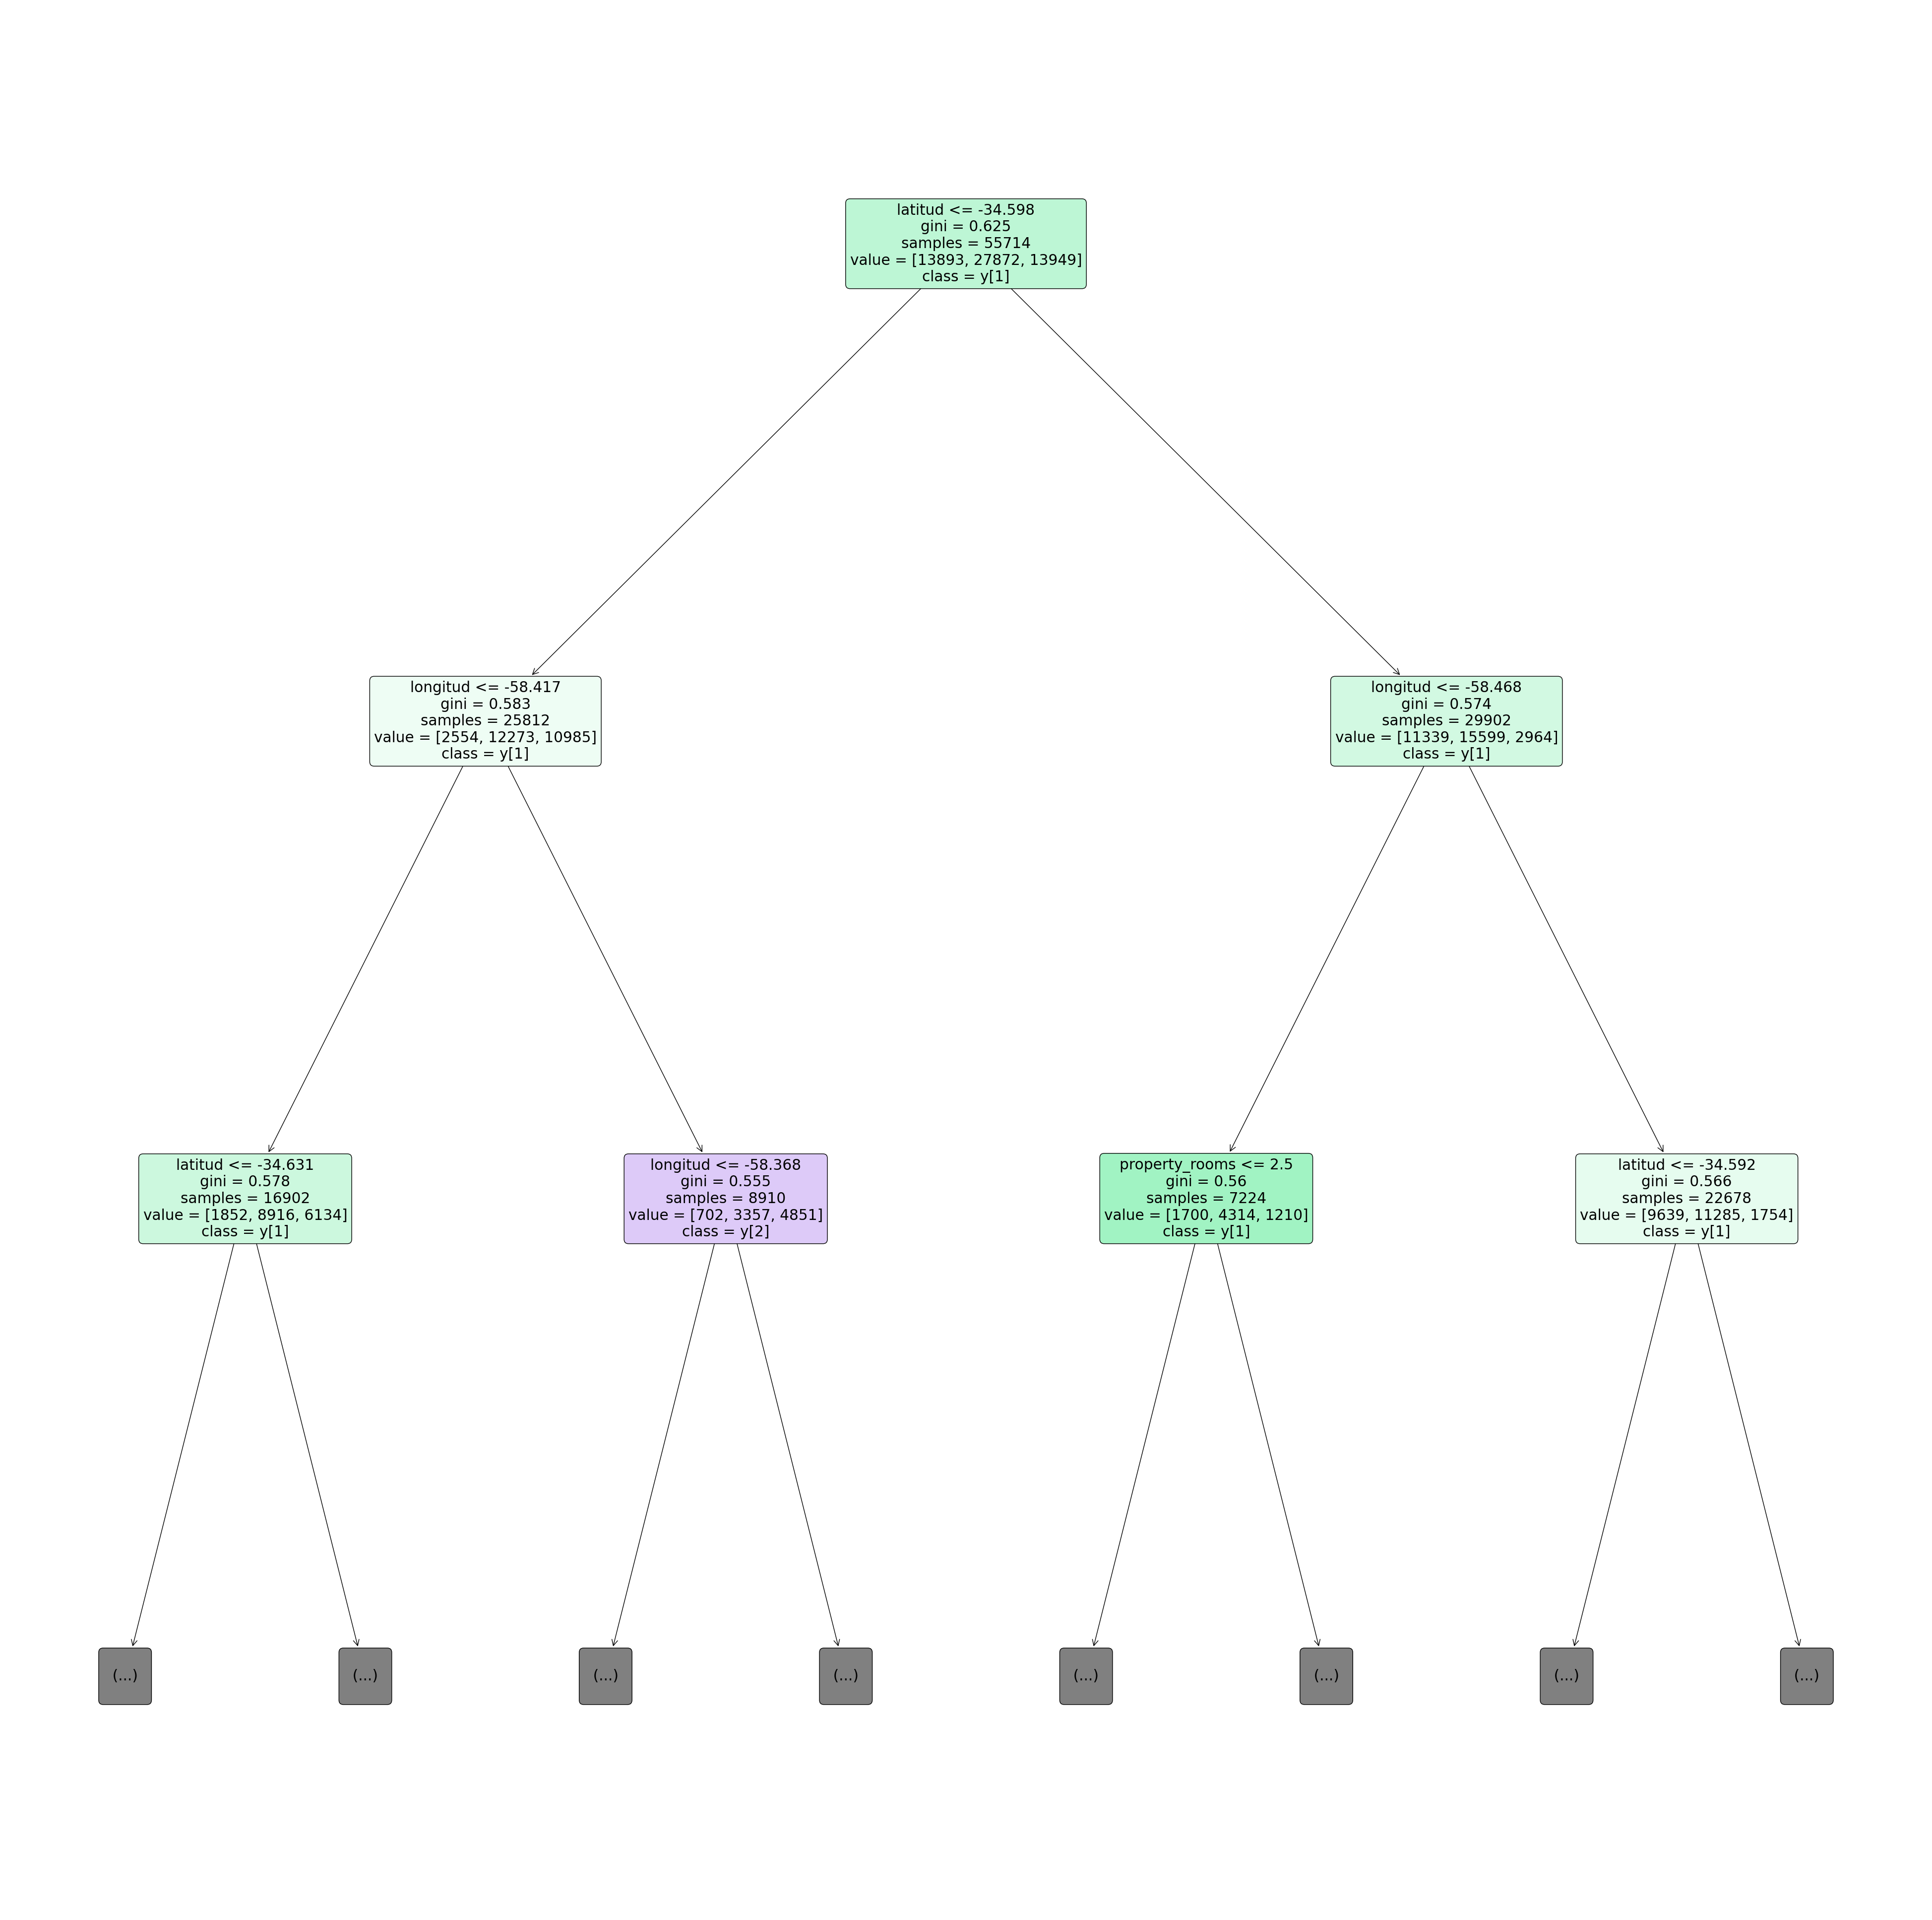

In [294]:
plt.figure(figsize=(50,50))

tree_plot=tree.plot_tree(model,
                         max_depth=2,
                         feature_names=ds_train_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

#### Importancia de atributos

Mientras mas alto, mayor es la importancia. Dicho esto notamos que la ayor relevancia pareceria tenerla la latitud. Tendremos que entender despues por que ese atributo predice mejor el tipo de precio.

In [295]:
sorted(list(zip(ds_train_x.columns.to_list(), model.feature_importances_)), key=lambda x: -x[1])

[('latitud', 0.33711641370074213),
 ('longitud', 0.27648999078983133),
 ('property_surface_total', 0.1749849973393098),
 ('property_surface_covered', 0.15692799318732634),
 ('property_rooms', 0.033883743084317235),
 ('property_bedrooms', 0.02059686189847317)]

Notamos que el atributo con mayor importancia pareceria ser a priori la latitud.

#### Poda

A medida que aumenta el alfa, se poda una mayor parte del árbol, lo que aumenta la impureza total de sus hojas.

El arbol tenia un maximo de profundidad de 41, recortamos este valor a la mitad para proseguir con la poda.

In [296]:
#Creo un clasificador 
arbol_poda = tree.DecisionTreeClassifier(max_depth = 20, random_state=2)

#Entreno un modelo
model_poda = arbol_poda.fit(X = x_train, y = y_train)

#Hago una predicción
y_pred_poda = model_poda.predict(x_test)

#Visualizo los resultados en un dataframe
ds_resultados_poda=pd.DataFrame(zip(y_test,y_pred_poda),columns=['test','pred'])
ds_resultados_poda.head()

test  pred
0     2     2
1     0     0
2     1     1
3     0     0
4     1     2

Text(50.722222222222214, 0.5, 'True')

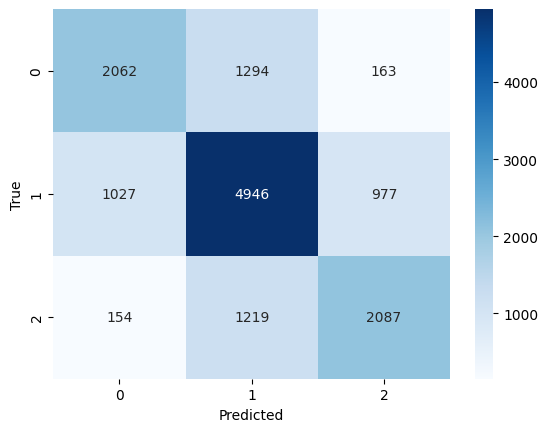

In [297]:
#Creo matriz de confusión
tabla=confusion_matrix(y_test,y_pred_poda)

#Grafico matriz de confusión
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

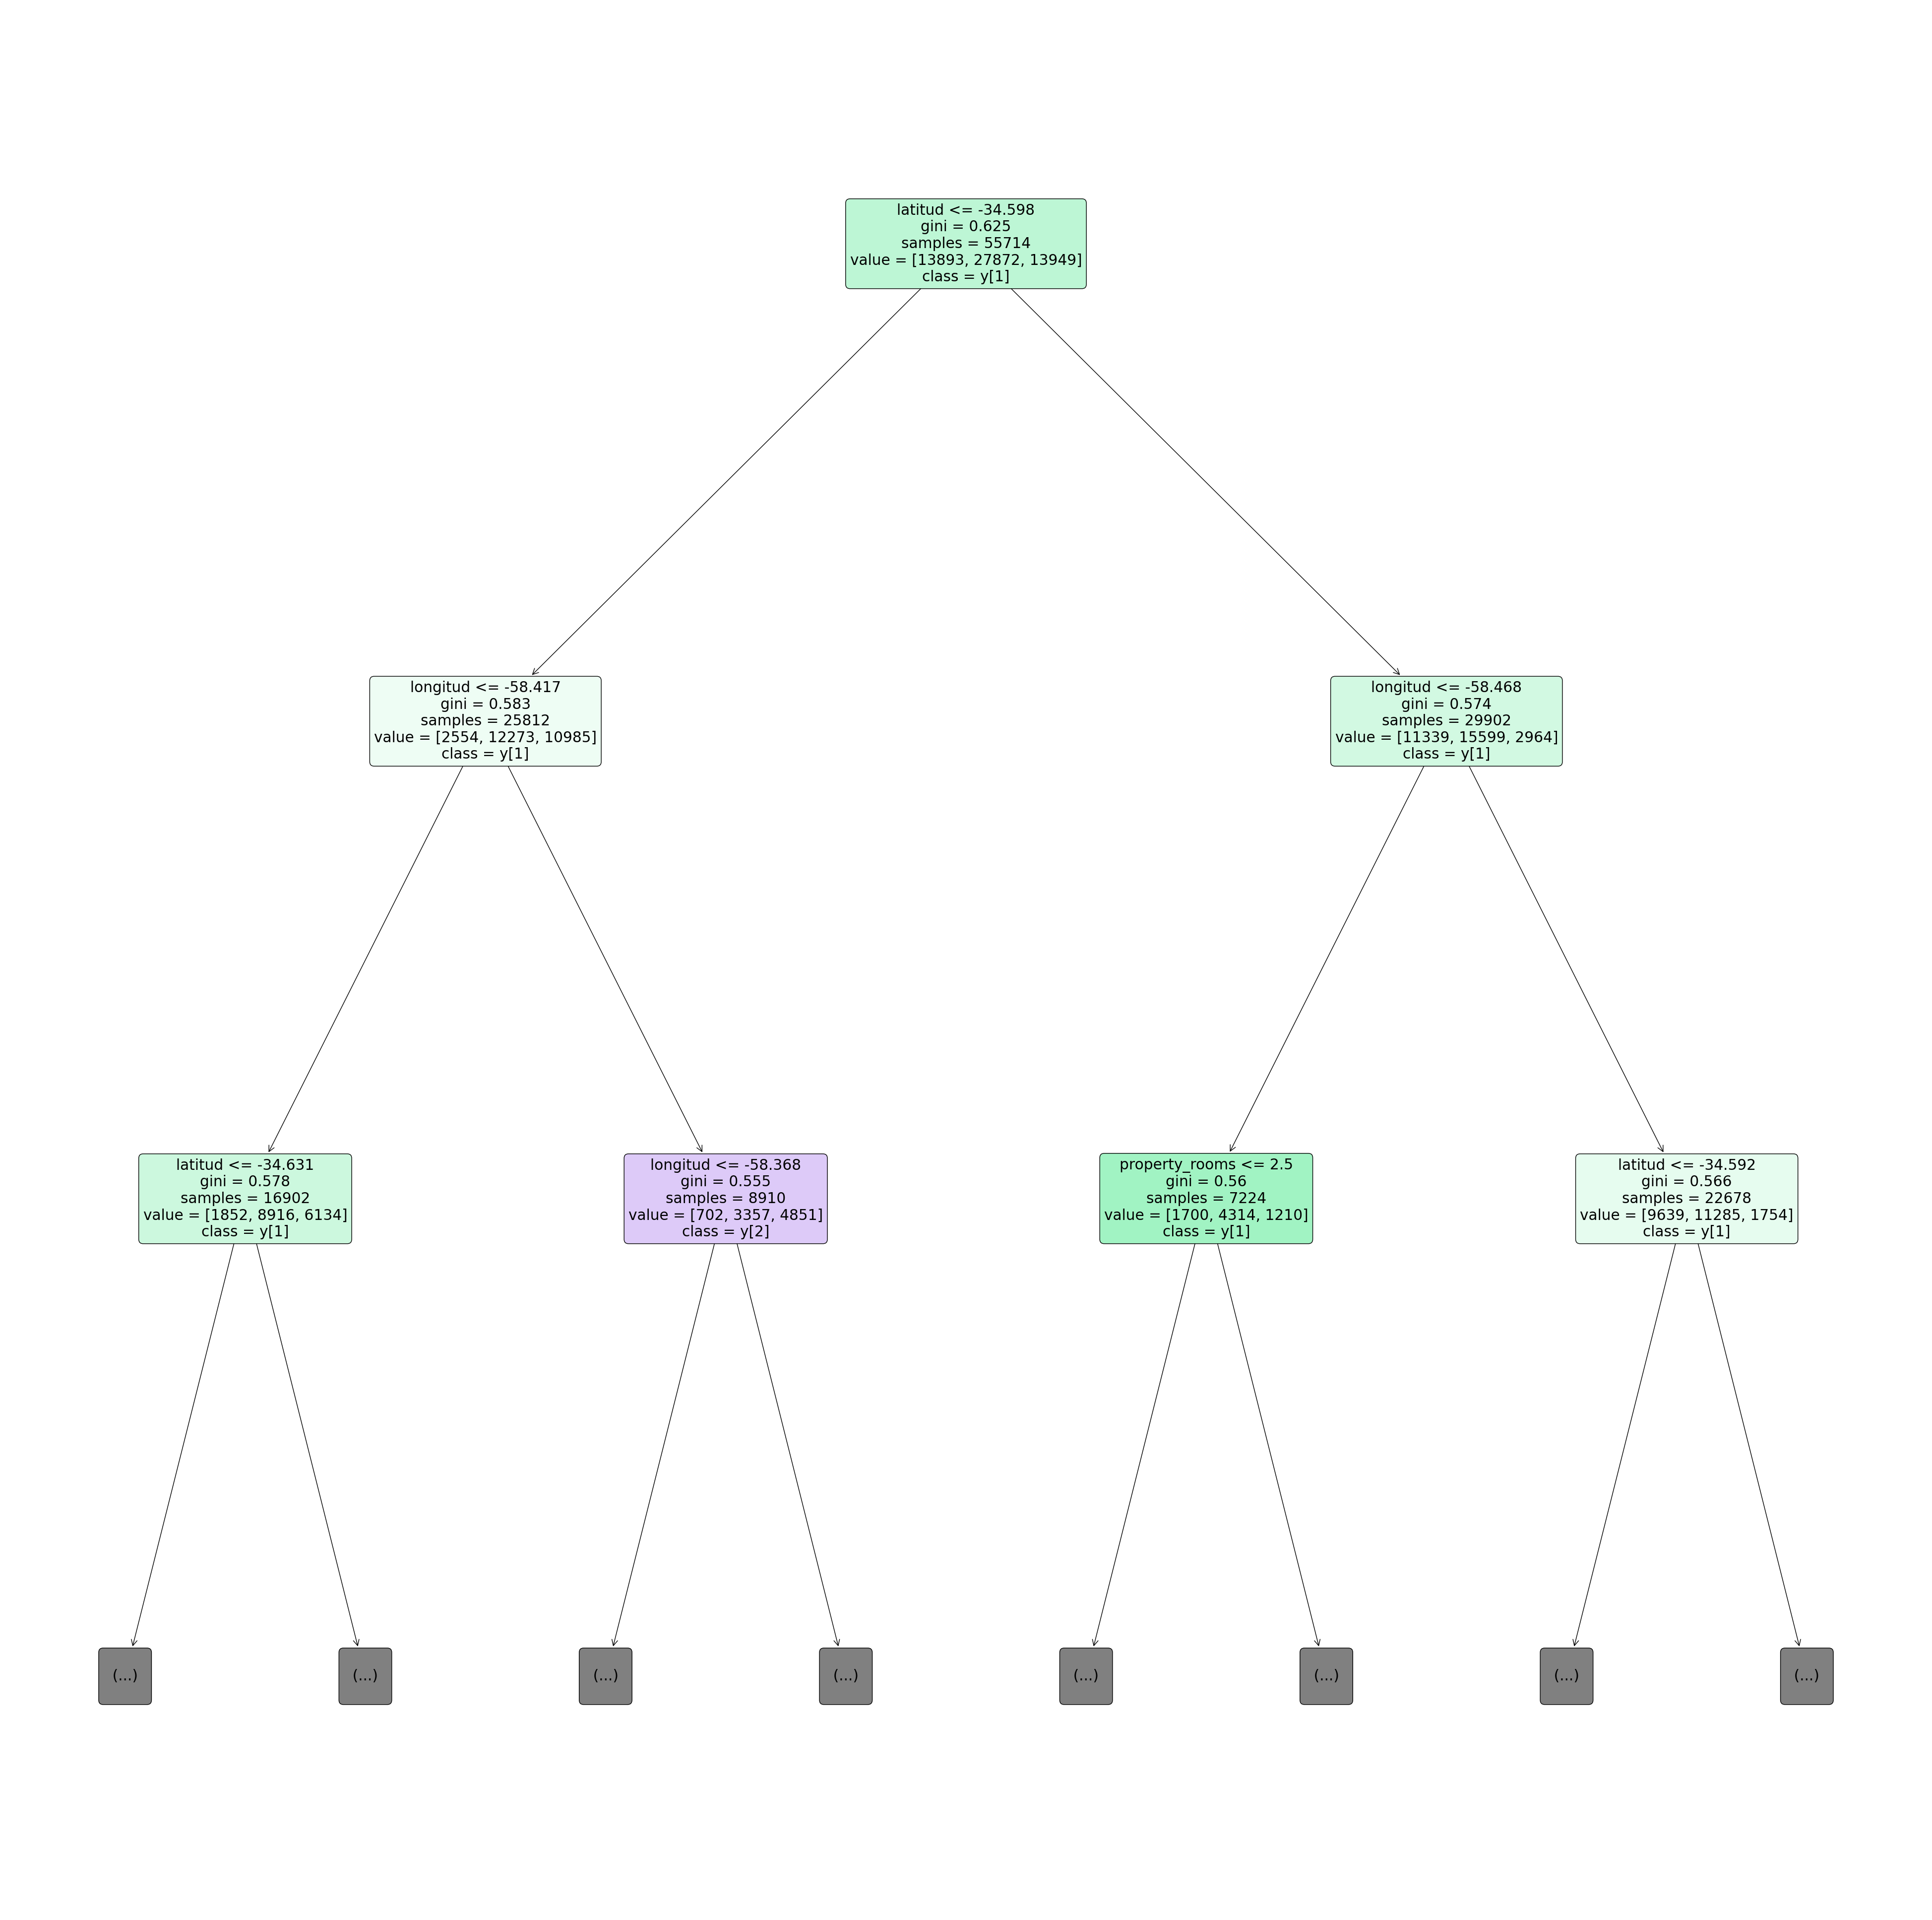

In [298]:
plt.figure(figsize=(50,50))

tree_plot=tree.plot_tree(model_poda,
                         max_depth=2,
                         feature_names=ds_train_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

In [299]:
#Calculo las métricas en el conjunto de evaluación
print(classification_report(y_test, y_pred_poda))

              precision    recall  f1-score   support

           0       0.64      0.59      0.61      3519
           1       0.66      0.71      0.69      6950
           2       0.65      0.60      0.62      3460

    accuracy                           0.65     13929
   macro avg       0.65      0.63      0.64     13929
weighted avg       0.65      0.65      0.65     13929



In [300]:
#Realizamos una predicción sobre el set de train
x_pred = model.predict(x_train)
print(classification_report(y_train, x_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     13893
           1       0.97      0.97      0.97     27872
           2       0.99      0.96      0.97     13949

    accuracy                           0.97     55714
   macro avg       0.97      0.97      0.97     55714
weighted avg       0.97      0.97      0.97     55714



Luego de realizada la poda, notamos que se nos redujeron los datos de test un 0,1 (de 0,66 a 0,65) pero, los valores de train se mantuvieron igual (0,97).

El arbol todavia esta overfitteando aunque este podado.

La idea es tratar de mejorar el valor de train, probaremos con Random Search para que nos encuentre los mejores hiper parametros dentro de lo que le mandemos al arbol.

In [301]:
features = ['latitud', 'longitud', 'property_rooms', 'property_bedrooms','property_surface_total', 'property_surface_covered']
target = 'tipo_precio'

In [302]:
#Separo un set de Evaluacion
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ds_train[features].values, 
                                                    ds_train[target].values, 
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=ds_train[target].values) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 55714
# Datos Prueba: 13929
% Positivos Entrenamiento: 25.003
% Positivos Prueba: 24.998


¿Cómo buscar la mejor combinación de hiperparámetros?

Exploramos un espacio de búsqueda, usando k-fold CV para medir el desempeño de cada combinación.
Al terminar, nos quedamos con la combinación con
mejor desempeño y entrenamos un único modelo usando todos los datos de train.

#### KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos e hiperparametros)

In [303]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que quiero porbar
n=10 

#Conjunto de parámetros que quiero usar
params_grid = {
    'criterion':['gini','entropy'],
    'max_depth':list(range(11,31)), 
    'max_features':["auto", "sqrt", "log2"],
    'min_samples_leaf':list(range(1,9)),
    'ccp_alpha':np.linspace(0,0.05,n)
}

#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier(random_state=4) #semilla

#Metrica que quiero optimizar Accuracy Score (porque no tenemos datos binarios)
scorer_fn = make_scorer(sk.metrics.accuracy_score)


#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n,
                              random_state=2) #semilla

#Busco los hiperparamtros que optimizan Accuracy Score
randomcv.fit(x_train,y_train);

In [304]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)

{'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 29, 'criterion': 'gini', 'ccp_alpha': 0.0}


In [305]:
#Mejor métrica
print(randomcv.best_score_)

0.6121980272031224


In [306]:
randomcv.cv_results_['mean_test_score']

array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.61219803, 0.5       , 0.5       , 0.5       ])

In [307]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps, features)):
  if feat_imp > 0:
    print('{}: {}'.format(feat,feat_imp))

property_bedrooms: 0.01524638761738128
property_rooms: 0.02577425285609324
property_surface_covered: 0.13549478522395847
property_surface_total: 0.1616123716965645
longitud: 0.29245883406861867
latitud: 0.3694133685373838


Notamos que la latitud sigue siendo el atributo mas importante

#### Predicción y Evaluación del Modelo con mejores hiperparámetros

In [308]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol = DecisionTreeClassifier(random_state=3).set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
mejores_hiper_arbol = arbol.fit(x_train,y_train)

reglas = export_text(arbol, feature_names=list(features))
#print(reglas)

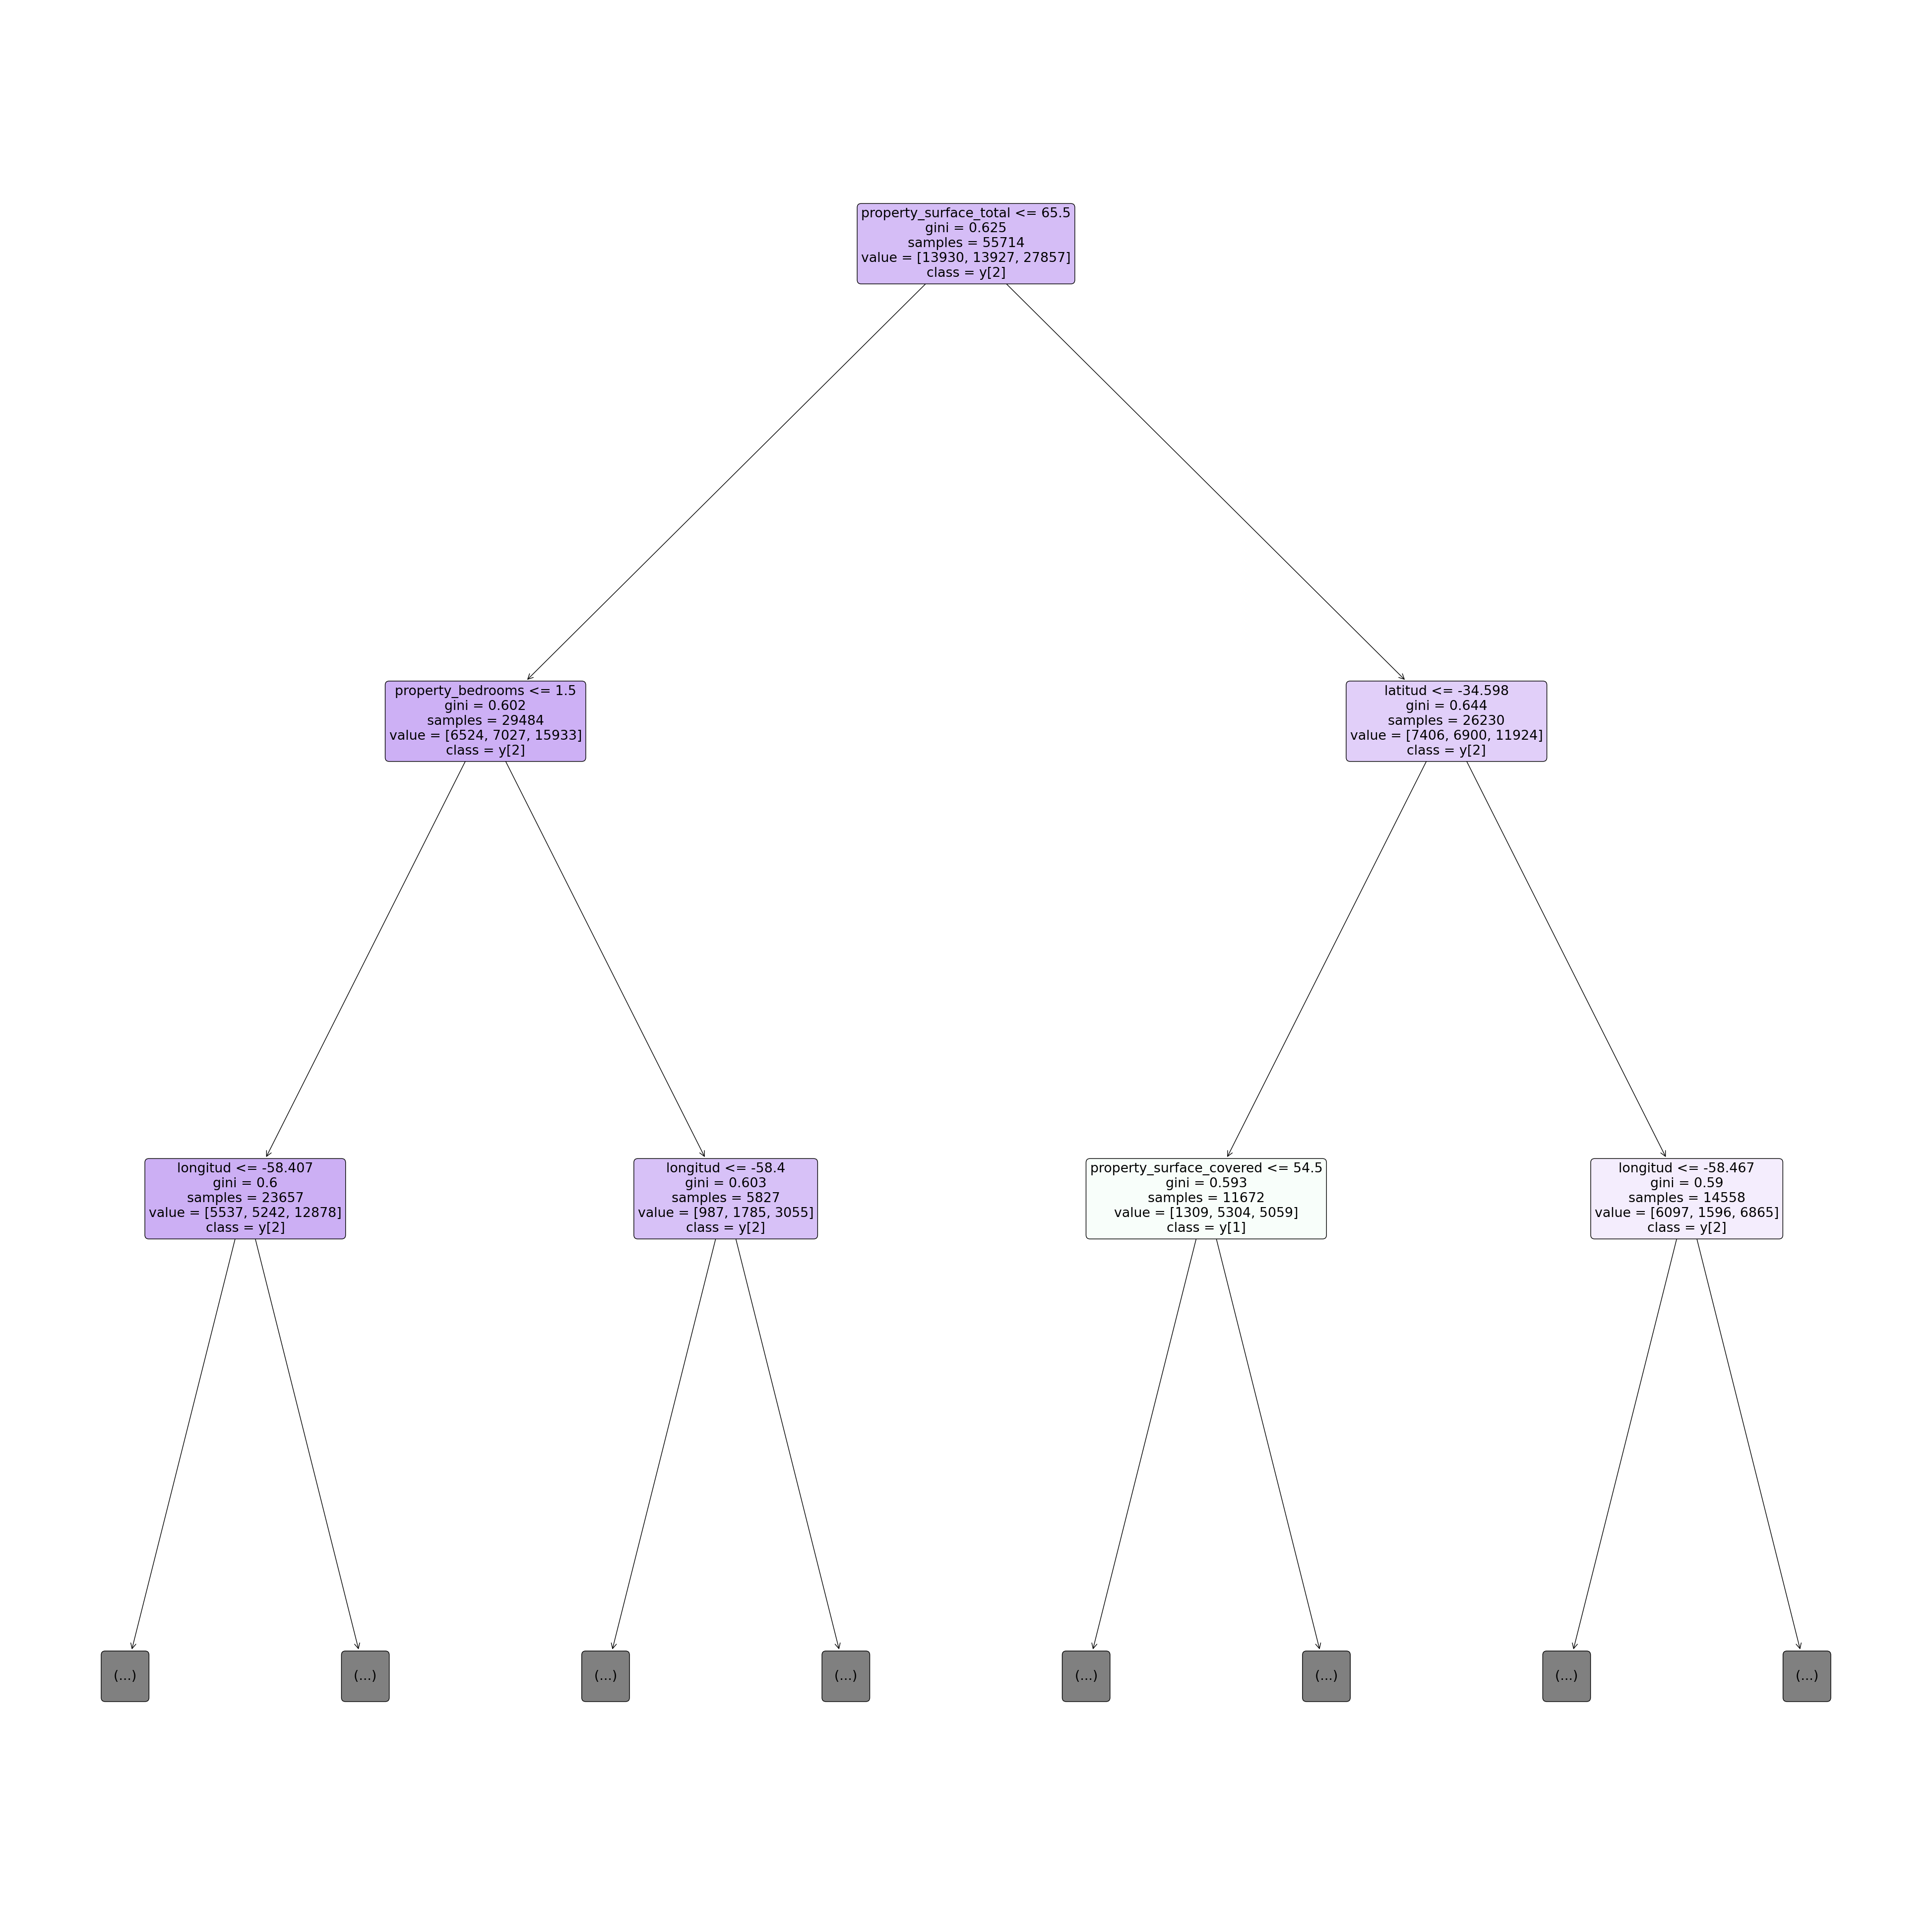

In [309]:
plt.figure(figsize=(50,50))

tree_plot=tree.plot_tree(mejores_hiper_arbol,
                         max_depth=2,
                         feature_names=ds_train_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

Notemos como ahora, luego de mejorados los hiper parametros, el arbol que obtenemos obtiene como valor mas importante la superifice total cubierta y a partir de eso se toman decisiones.

Accuracy-Score: 0.6253858855624955


Text(50.722222222222214, 0.5, 'True')

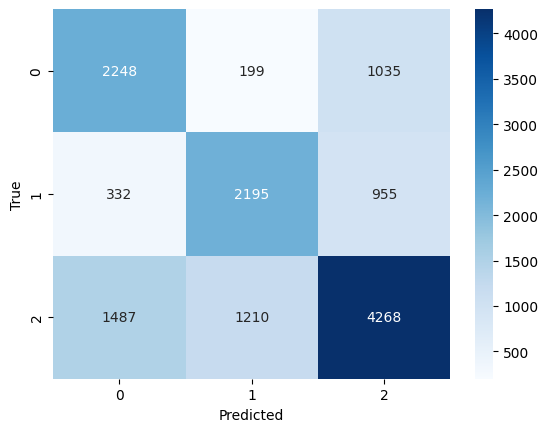

In [310]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score, accuracy_score

#Hago predicción sobre el set de evaluacion
y_pred = mejores_hiper_arbol.predict(x_test)

#Arbol Reporte y Matriz de Confusion
print('Accuracy-Score: {}'.format(accuracy_score(y_test, y_pred)))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

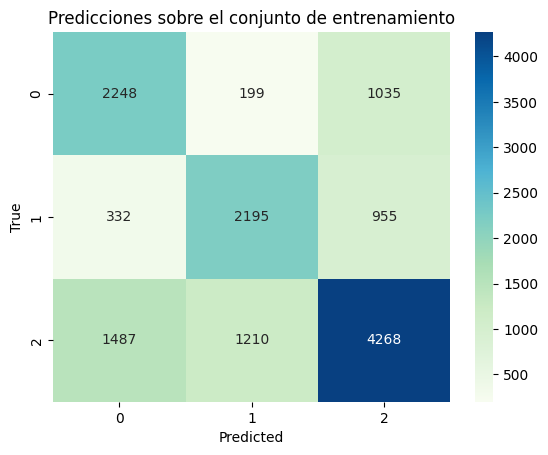

In [311]:
tabla = confusion_matrix(y_test, y_pred)
sns.heatmap(tabla, cmap='GnBu', annot=True, fmt='g', ).set(title='Predicciones sobre el conjunto de entrenamiento')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [312]:
y_pred_new = best_tree.predict(x_train)

metrics = classification_report(y_train, y_pred_new)
print(metrics)

              precision    recall  f1-score   support

        Alto       0.79      0.90      0.85     13930
        Bajo       0.84      0.87      0.85     13927
       Medio       0.91      0.83      0.87     27857

    accuracy                           0.86     55714
   macro avg       0.85      0.87      0.86     55714
weighted avg       0.86      0.86      0.86     55714



In [313]:
y_pred_new2 = best_tree.predict(x_test)

metrics = classification_report(y_test, y_pred_new2)
print(metrics)

              precision    recall  f1-score   support

        Alto       0.55      0.65      0.60      3482
        Bajo       0.61      0.64      0.62      3482
       Medio       0.68      0.61      0.64      6965

    accuracy                           0.63     13929
   macro avg       0.61      0.63      0.62     13929
weighted avg       0.63      0.63      0.63     13929



In [314]:
mejores_hiper_arbol.predict_proba(x_test)[0:10]

array([[0.5, 0. , 0.5],
       [0.5, 0. , 0.5],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0.5, 0. , 0.5],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ]])

#### Entrenamiento Cross Validation

Veamos qué pasa con las métricas si entrenamos el mismo árbol con diferentes conjuntos de datos (en este caso con cada split de un CV)

In [315]:
#Entrenamiento con 10 Fold Cross Validation 
from sklearn.model_selection import cross_validate, StratifiedKFold

# Spits que respeten la proporción delas clases
kfoldcv =StratifiedKFold(n_splits=10) 
 
#Creo árbol con los mejores hiperparámetros 
arbolcv=DecisionTreeClassifier(random_state=5).set_params(**randomcv.best_params_)

#Selecciono métrica Accuracy Score
scorer_fn = make_scorer(sk.metrics.accuracy_score)

#Hago CV
resultados = cross_validate(arbolcv,x_train, y_train, cv=kfoldcv,scoring=scorer_fn,return_estimator=True)

#Selecciono el arbol con mejor performance
metricsCV=resultados['test_score']
mejor_performance=resultados['estimator'][np.where(metricsCV==np.max(metricsCV))[0][0]]

In [316]:
#Métricas de cada split
metricsCV

array([0.60175879, 0.60911701, 0.62419239, 0.61162958, 0.60509783,
       0.61084186, 0.62035541, 0.60491833, 0.61317537, 0.6180219 ])

<AxesSubplot: >

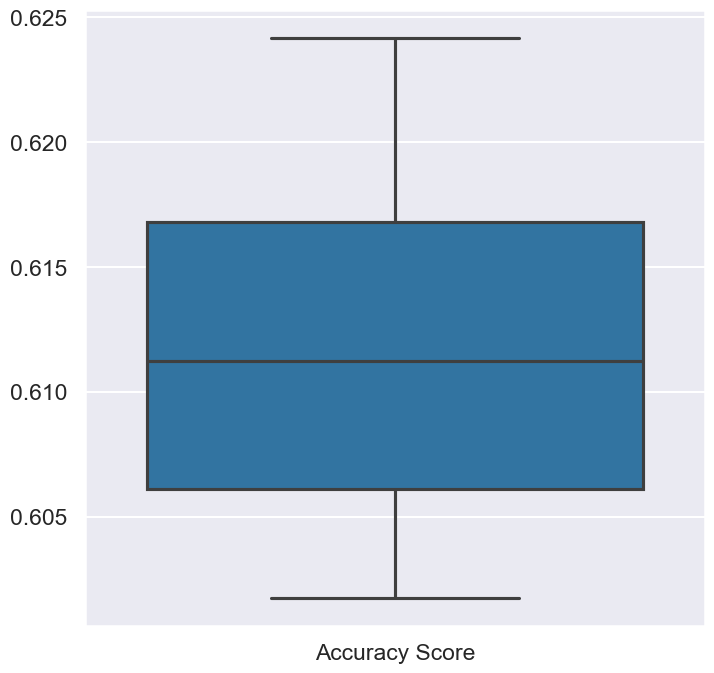

In [317]:
#Grafico Boxplot - Entrenado con 10 Fold Cross Validation

metric_labelsCV = ['Accuracy Score']*len(metricsCV) 
sns.set_context('talk')
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
sns.boxplot(metric_labelsCV,metricsCV)

Notamos como el valor de accuracy parece estar rondando 0,61 para cada K-Fold. Cuando nosotros mejoramos los hiper parametros, logramos obtene run valor un poco por arriba de esta media para test.

In [318]:
#Importancia y reglas del Árbol con mejor Performance
from sklearn.tree import export_text

feat_imps = mejor_performance.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps,features)):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))
print()

reglas = export_text(mejor_performance, feature_names=list(features))
#print(reglas) es muy verboso

property_bedrooms: 0.011374040172447877
property_rooms: 0.012695522119875756
property_surface_covered: 0.14712829573541972
property_surface_total: 0.17512083573052872
longitud: 0.2897860871778309
latitud: 0.36389521906389694



              precision    recall  f1-score   support

        Alto       0.56      0.64      0.59      3482
        Bajo       0.59      0.62      0.60      3482
       Medio       0.67      0.60      0.64      6965

    accuracy                           0.62     13929
   macro avg       0.61      0.62      0.61     13929
weighted avg       0.62      0.62      0.62     13929

              precision    recall  f1-score   support

        Alto       0.77      0.87      0.81     13930
        Bajo       0.80      0.84      0.82     13927
       Medio       0.88      0.80      0.84     27857

    accuracy                           0.83     55714
   macro avg       0.82      0.84      0.82     55714
weighted avg       0.83      0.83      0.83     55714



Text(37.08333333333333, 0.5, 'True')

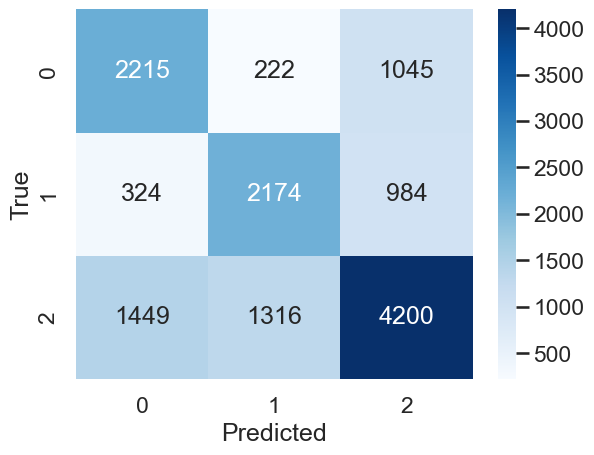

In [319]:
## Prediccion y evaluacion del modelo

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

#Predicción sobre el set de evaluacion
y_pred = mejor_performance.predict(x_test)

#Arbol Reporte y Matriz de Confusion para set de test
print(classification_report(y_test,y_pred))

#Realizamos una predicción sobre el set de train
x_pred = mejor_performance.predict(x_train)

#Arbol Reporte y Matriz de Confusion para set de train
print(classification_report(y_train, x_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Exportamos el modelo

In [320]:
from joblib import dump
dump(model, 'modelos/arbol-decision.joblib')

['modelos/arbol-decision.joblib']

## Random Forest - Clasificacion


In [321]:
def indice_mayor(array):
    max = 0
    for i in range(len(array)):
        if array[max] < array[i]:
            max = i

    return max


param_grid = { "criterion" : ["gini", "entropy"],
               "min_samples_leaf" : [1, 5, 10],
               "min_samples_split" : [2, 4, 8, 16],
               "n_estimators": [20, 50, 100]}

kfold = KFold(n_splits=5)
base_tree = RandomForestClassifier(max_features='auto', random_state=1, n_jobs=-1)
gs = RandomizedSearchCV(estimator=base_tree, param_distributions = param_grid, scoring='accuracy', cv=kfold, n_iter=10)

gs.fit(X=ds_reducido, y=ds_train.tipo_precio);
mejores_parametros = gs.best_params_
print(mejores_parametros)
print(gs.best_score_)

{'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 1, 'criterion': 'entropy'}
0.7106098256815592


In [322]:
arbol = RandomForestClassifier().set_params(**mejores_parametros)
results = cross_validate(estimator=arbol, X=ds_reducido, y=ds_train.tipo_precio, cv=5, n_jobs=-1, return_estimator=True)
mejor_arbol = results['estimator'][indice_mayor(results['test_score'])]

##### Importancia de atributos

Esta lista ya nos da información interesante. Termina siendo bastante más importante la localización de la vivienda para el modelo que su superficie. Y concretamente la latitud parece ser más relevante que la lognitud. Mientras que la cantidad de habitaciones y baños no terminan siendo muy relevantes.

In [323]:
sorted(list(zip(ds_reducido.columns.to_list(), mejor_arbol.feature_importances_)), key=lambda x: -x[1])

[('latitud', 0.35690714131071316),
 ('longitud', 0.26886642819632983),
 ('property_surface_total', 0.17291600697227807),
 ('property_surface_covered', 0.1569259545108804),
 ('property_rooms', 0.026508935277574742),
 ('property_bedrooms', 0.017875533732223826)]

##### Gráfico de un arbol

Vemos como para el arbol 17 su criterio principal es la longitud. De ser menor a 58.409 se fija si la superficie cubierta aes menor a 99.5 metros cuadrados, caso contrario en la primera condición se fija si la superficie total es menor a 108.5 metros cuadrados. Así hasta llegar a una hoja que indique si se trata de una propiedad de precio bajo, medio o alto.

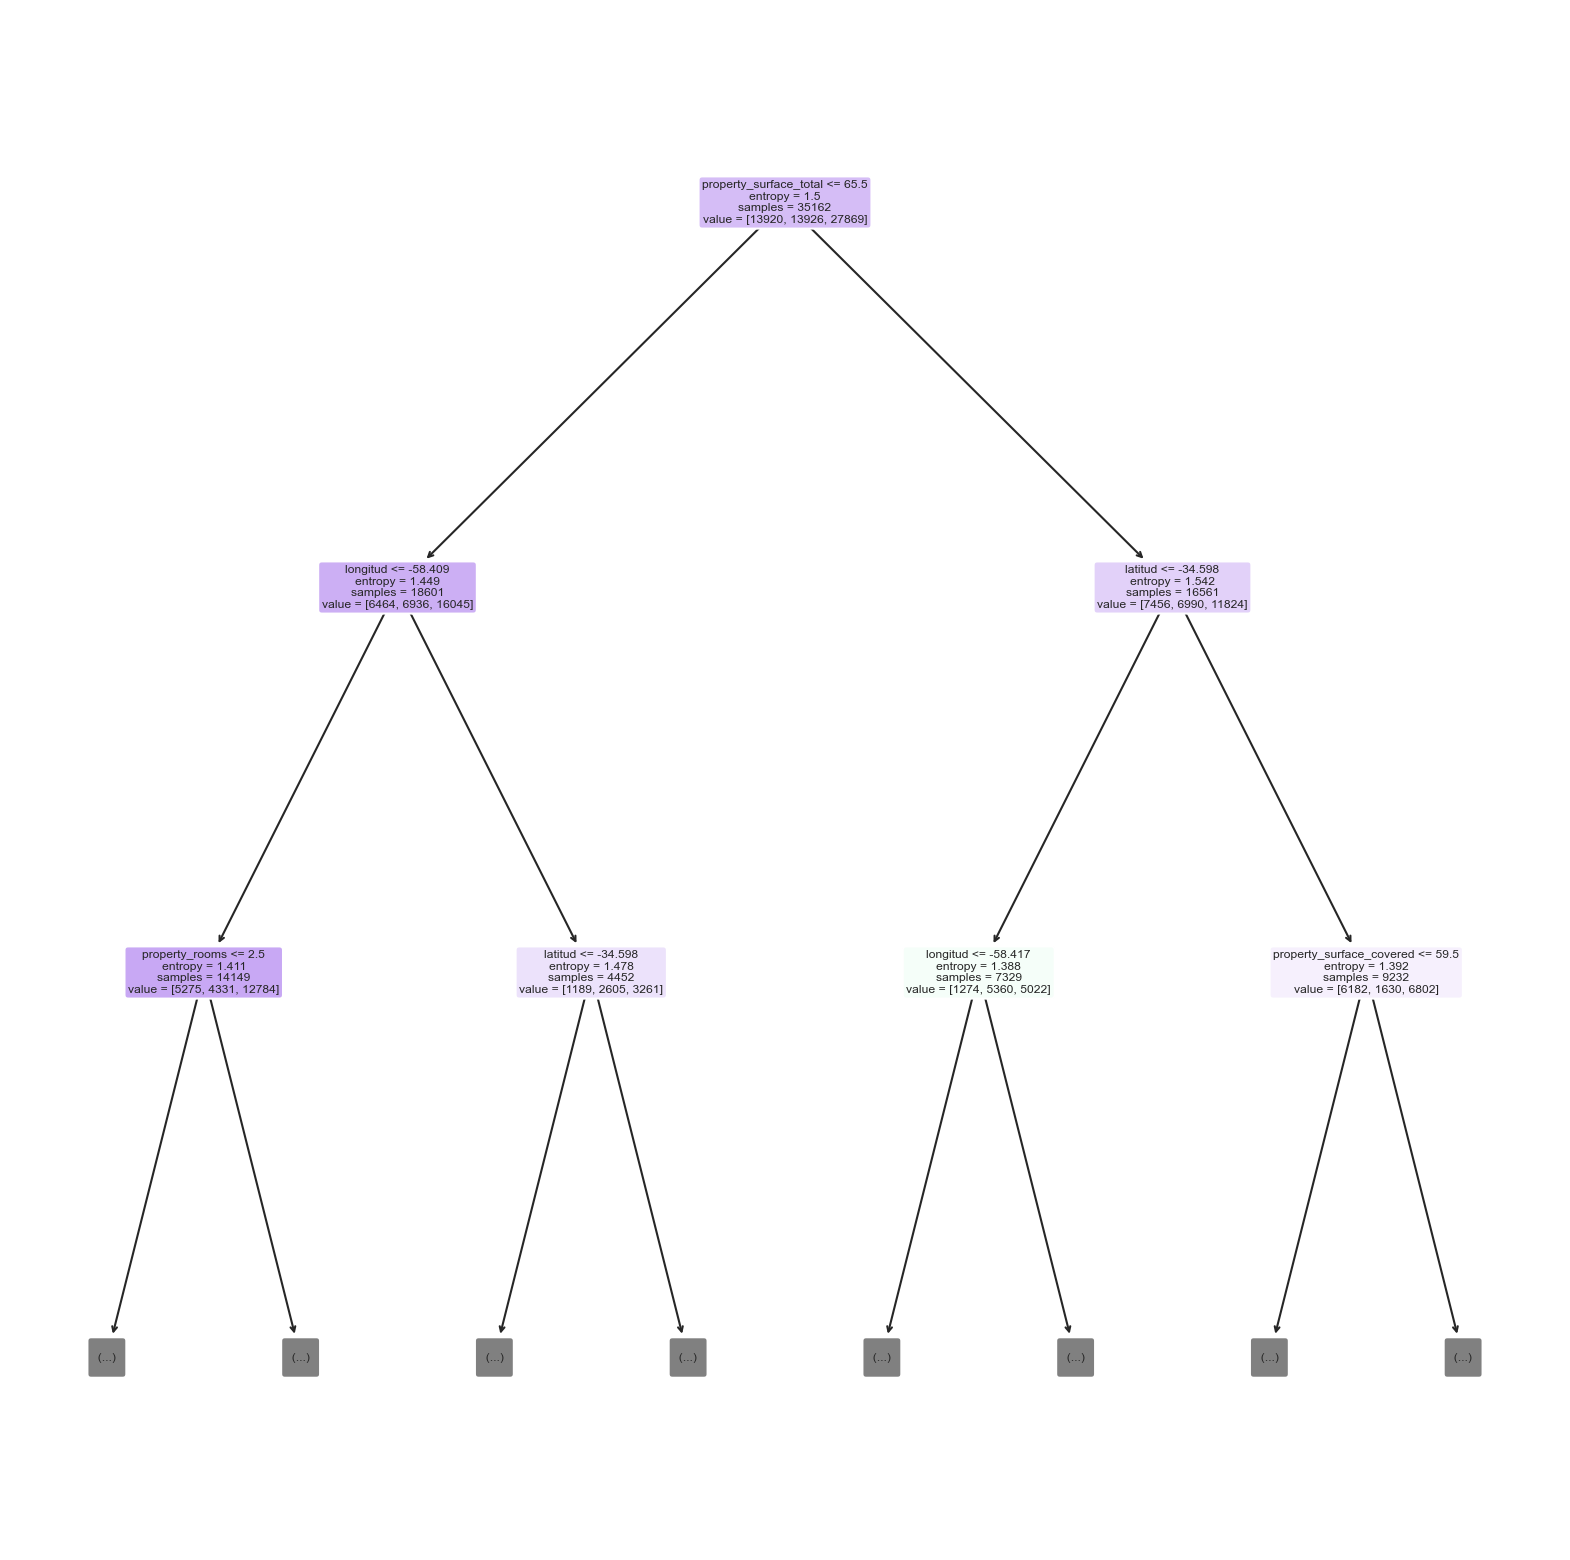

In [324]:
from sklearn import tree
plt.figure(figsize=(20, 20))
tree_plot_=tree.plot_tree(mejor_arbol.estimators_[17], feature_names=ds_reducido.columns.to_list(), filled=True, rounded=True, max_depth= 2)
plt.show(tree_plot_)

##### Evaluación de performance con test

In [325]:
target = ds_test.tipo_precio
ds_test_reducido = ds_test.drop(['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price', 'tipo_precio', 'pxm2'], axis=1)

In [326]:
predicted = mejor_arbol.predict(ds_test_reducido)

Text(37.08333333333333, 0.5, 'True')

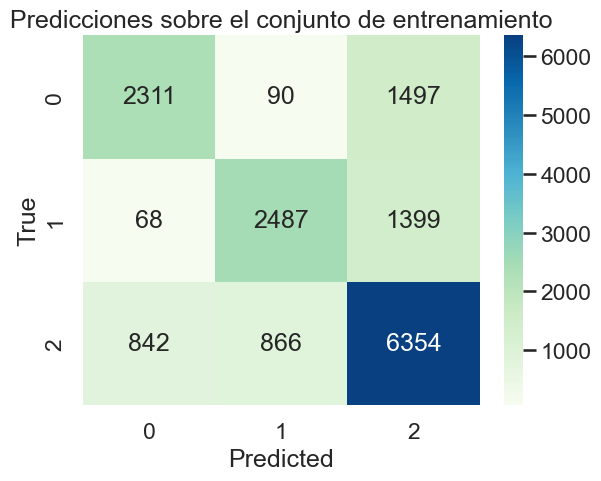

In [327]:
from sklearn.metrics import confusion_matrix


ds_resultados = pd.DataFrame(zip(target, predicted), columns=['test', 'pred'])
tabla = confusion_matrix(target, predicted)
sns.heatmap(tabla, cmap='GnBu', annot=True, fmt='g', ).set(title='Predicciones sobre el conjunto de entrenamiento')
plt.xlabel('Predicted')
plt.ylabel('True')

In [328]:
from sklearn.metrics import classification_report

metrics = classification_report(target, predicted)
print(metrics)

              precision    recall  f1-score   support

        Alto       0.72      0.59      0.65      3898
        Bajo       0.72      0.63      0.67      3954
       Medio       0.69      0.79      0.73      8062

    accuracy                           0.70     15914
   macro avg       0.71      0.67      0.69     15914
weighted avg       0.70      0.70      0.70     15914



###### Métricas con el dataset de train

In [329]:
predicted = mejor_arbol.predict(ds_reducido)
metrics = classification_report(ds_train.tipo_precio, predicted)
print(metrics)

              precision    recall  f1-score   support

        Alto       0.93      0.89      0.91     17412
        Bajo       0.93      0.90      0.91     17409
       Medio       0.90      0.94      0.92     34822

    accuracy                           0.92     69643
   macro avg       0.92      0.91      0.91     69643
weighted avg       0.92      0.92      0.92     69643



Notamos como el modelo está overfitteando

In [330]:
dump(mejor_arbol, 'modelos/random-forest.joblib')

['modelos/random-forest.joblib']

## Regresion Logistica - Clasificacion

In [331]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, cohen_kappa_score, accuracy_score


from yellowbrick.classifier import ROCAUC

ModuleNotFoundError: No module named 'yellowbrick'

Entrenamos un regresor con nuestro dataset reducido y cross validation en 5 folds.

In [332]:
ds_test.tipo_precio

30007     Medio
261467     Alto
429120    Medio
103953     Bajo
397261    Medio
          ...  
176606     Bajo
295790    Medio
358715    Medio
357022    Medio
434076     Alto
Name: tipo_precio, Length: 15914, dtype: object

In [333]:
estimator = LogisticRegression(random_state=0, multi_class='multinomial').fit(ds_reducido_normalizado, ds_train_y)
preds = estimator.predict(ds_reducido_normalizado)


accuracy_score(ds_train_y, preds)

0.5402696609853108

In [334]:
estimator_pca = LogisticRegression(random_state=0, multi_class='multinomial').fit(ds_pca, ds_train_y)
preds_pca = estimator_pca.predict(ds_pca)

accuracy_score(ds_train_y, preds_pca)

0.5266860991054377

Evaluaremos los parámetros que podemos mejorar

In [335]:
print(classification_report(pred, ds_train_y))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      3272
           0       0.00      0.00      0.00         0
           1       0.96      0.50      0.66     66371
           2       0.00      0.00      0.00         0

    accuracy                           0.48     69643
   macro avg       0.24      0.13      0.17     69643
weighted avg       0.92      0.48      0.63     69643



Buscaremos hiperparámetros mediante random search

Como usamos el dataset de PCA, debemos aplicar el mismo PCA al ds de test.

Podemos ver que el score de test es similar al de train. Sin embargo, ninguno de los dos es un buen puntaje

Test score: 0.53
Cohen Kappa score: 0.14


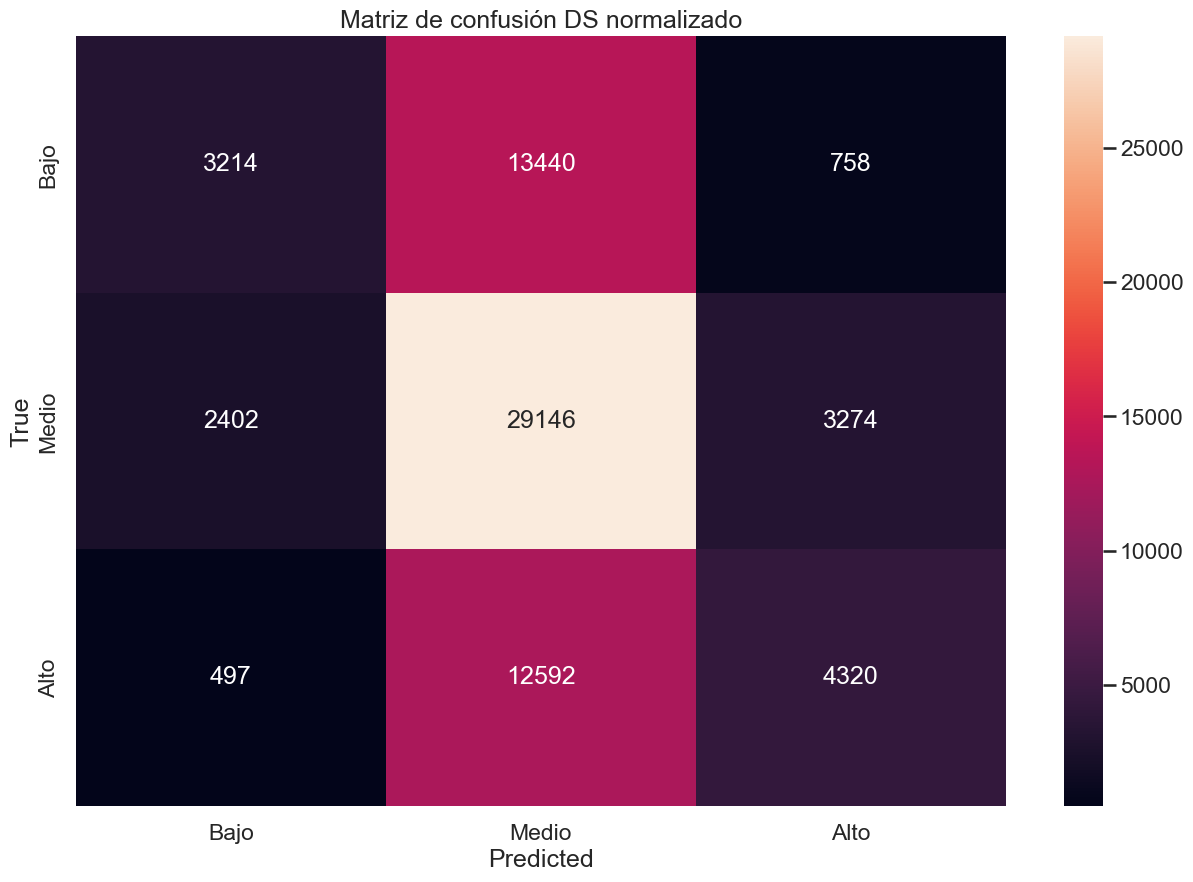

In [336]:
print("Test score: {:.2f}".format(accuracy_score(ds_train_y, preds_pca)))
print("Cohen Kappa score: {:.2f}".format(cohen_kappa_score(ds_train_y, preds_pca)))
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(ds_train_y, preds_pca),annot=True, fmt='g')
ax = ax.set(xlabel='Predicted',ylabel='True',title='Matriz de confusión DS normalizado',
            xticklabels=(['Bajo', 'Medio', 'Alto']),
            yticklabels=(['Bajo', 'Medio', 'Alto']))

Test score: 0.53
Cohen Kappa score: 0.14


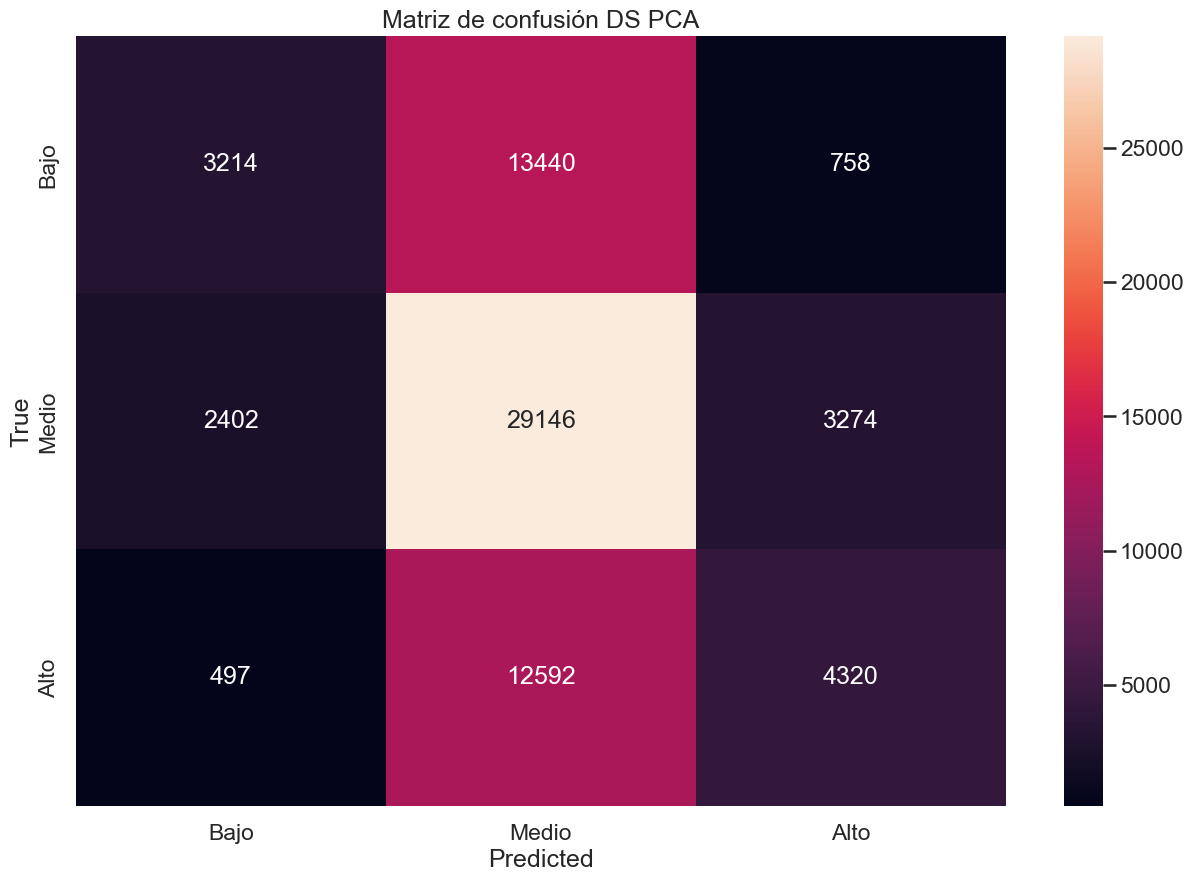

In [337]:
print("Test score: {:.2f}".format(accuracy_score(ds_train_y, preds_pca)))
print("Cohen Kappa score: {:.2f}".format(cohen_kappa_score(ds_train_y, preds_pca)))
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(ds_train_y, preds_pca),annot=True, fmt='g')
ax = ax.set(xlabel='Predicted',ylabel='True',title='Matriz de confusión DS PCA',
            xticklabels=(['Bajo', 'Medio', 'Alto']),
            yticklabels=(['Bajo', 'Medio', 'Alto']))

¿Qué modelo elegirían para clasificar el tipo de precio de las propiedades? - Responder Despues

In [338]:
dump(estimator, 'modelos/regresion-logistica.joblib')

['modelos/regresion-logistica.joblib']

## KNN - Regresión

Mientras que el clasificador KNN nos devuelve la moda de los K vecinos mas cercanos, el regresor de KNN nos devuelve la media de los K vecinos mas cercanos

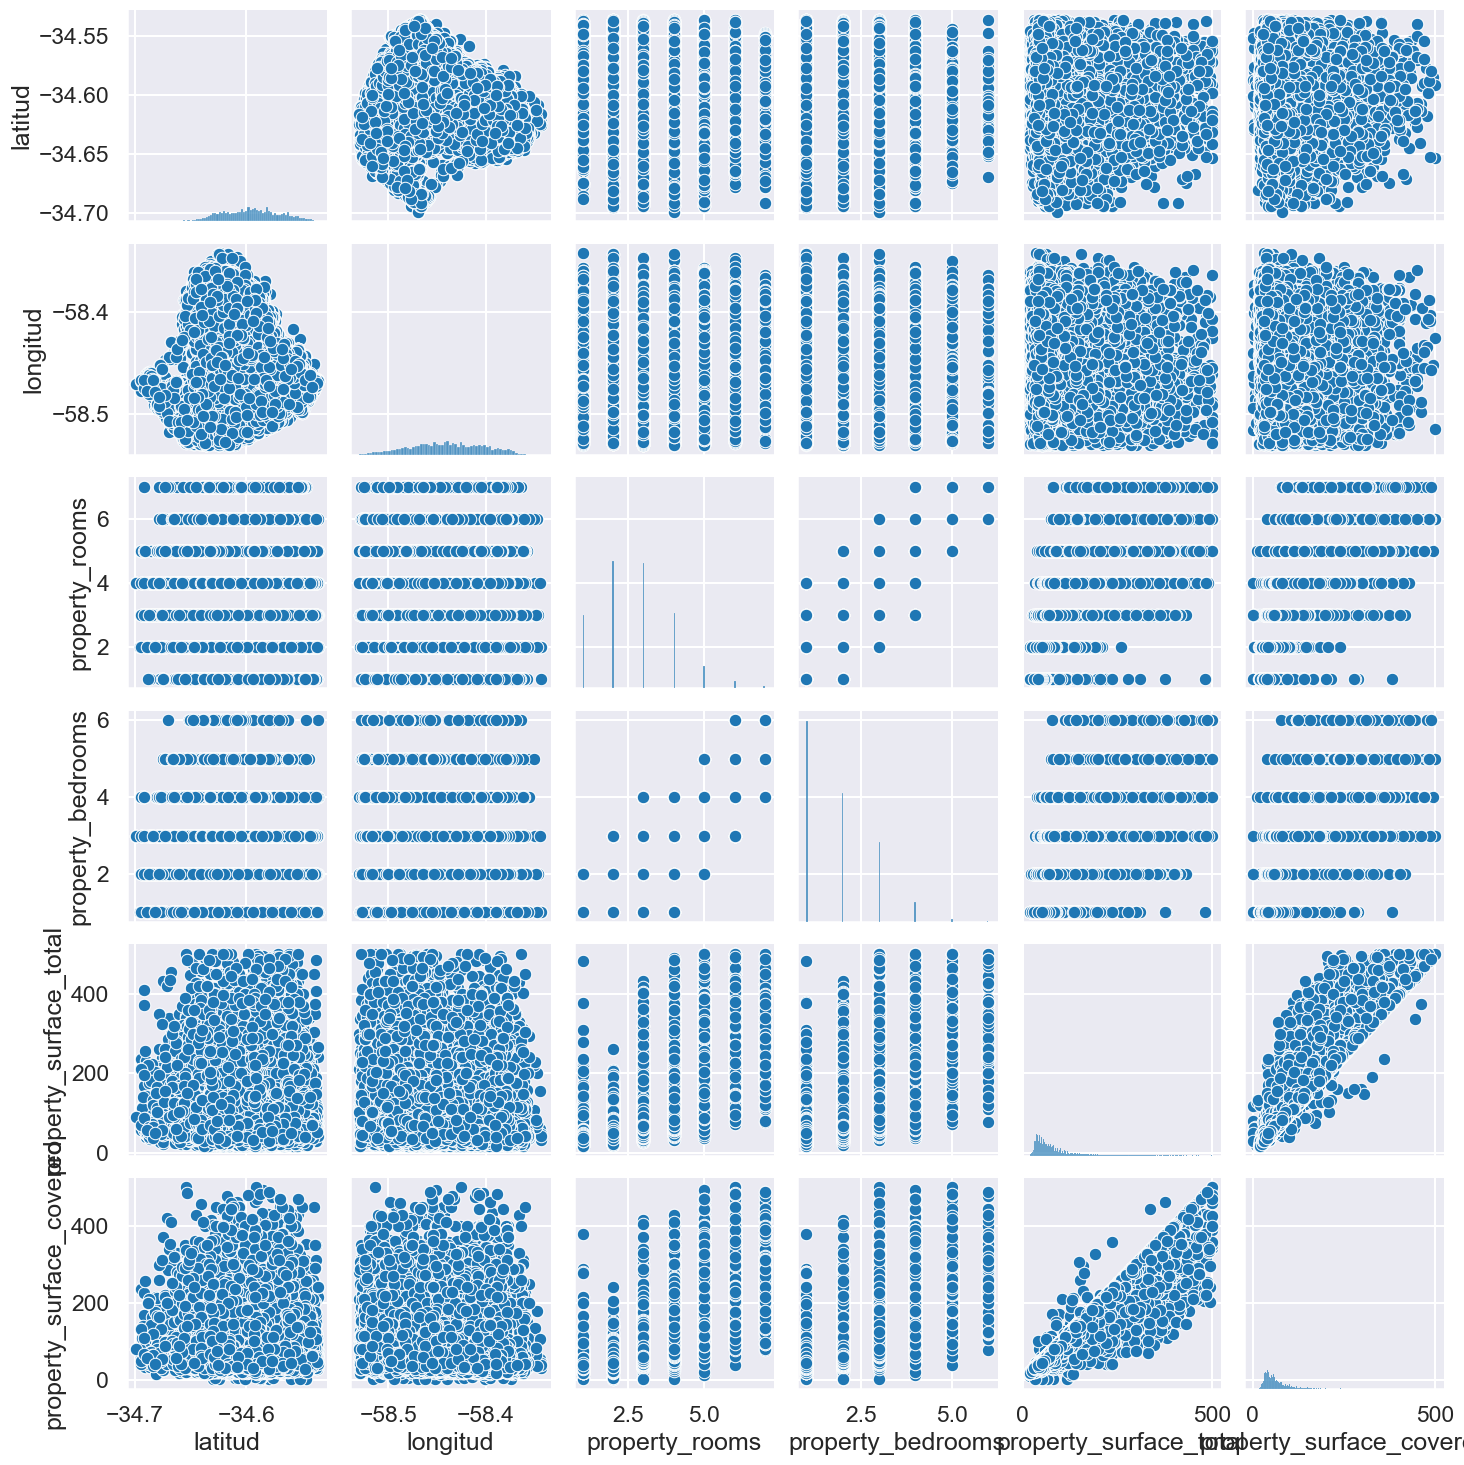

In [416]:
#Gráfico de a pares

ds_train_knn = ds_train.drop(['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price', 'tipo_precio', 'pxm2'], axis=1)

sns.pairplot(ds_train_knn)

Correlación

A partir de este diagrama, podemos ver que property_surface_total, property_surface_covere y property_price podrían ser buenos features ya que sus diagramas de dispersión muestran una posible relación lineal. Analicemos la correlación.

In [417]:
# Heatmap de correlacion
ds_train_knn.corr().style.background_gradient(cmap='coolwarm')

In [443]:
#selecciono variables regresoras
X = ds_train_knn[['property_surface_total', 'property_surface_covered']]
#selecciono variable a predecir
y = ds_train.property_price

#Separacion Train/test  (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=12)

La regresión se ve muy afectada por los valores atípicos, ya que pueden interferir en el cálculo de la pendiente de la curva. Analizaremos un poco esta situacion.

[Text(0.5, 0, 'Variable')]

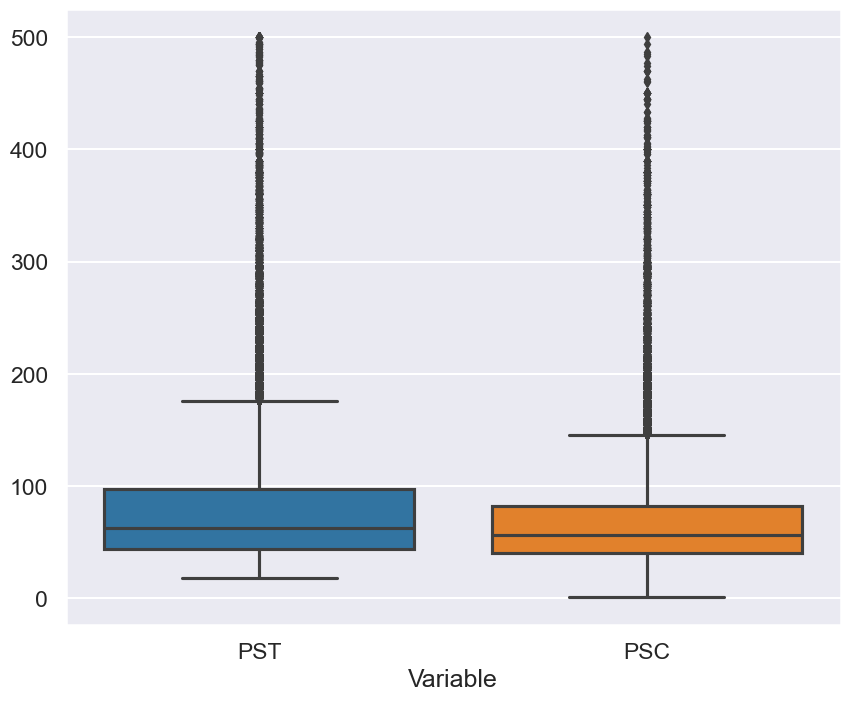

In [419]:
#Grafico Boxplot Conjunto
sns.set_context('talk')
sns.set_style("darkgrid")

variables=[]
valores=[]

variables =['PST']*len(list(X_train.property_surface_total)) + ['PSC']*len(list(X_train.property_surface_covered))

valores=list(X_train.property_surface_total) + list(X_train.property_surface_covered) 

plt.figure(figsize=(10,8))
grafico=sns.boxplot(x=variables,y=valores)
grafico.set(xlabel='Variable')

Usaremos la regla 1.5 x IQR: se eliminará todo lo que esté por encima o por debajo de 1.5 veces el rango entre cuantiles.

In [420]:
#Medidas train
X_train.describe().T

count       mean        std   min   25%   50%  \
property_surface_total    55714.0  82.249758  60.783322  18.0  44.0  63.0   
property_surface_covered  55714.0  71.094249  50.191441   1.0  40.0  56.0   

                           75%    max  
property_surface_total    97.0  500.0  
property_surface_covered  82.0  500.0

In [421]:
#Calculo los cuantiles de las variables x,y
x_q3, x_q1 = np.percentile(X_train.property_surface_total, [75 ,25])
y_q3, y_q1 = np.percentile(X_train.property_surface_covered, [75 ,25])

#Calculo e rango intercuartil de las variables x,y
iqr_x = x_q3 - x_q1
iqr_y = y_q3 - y_q1

In [422]:
# Elimino outliers de la variable 'x'
X_train = X_train.query(' property_surface_total >= (@x_q1 - @iqr_x*1.5) & property_surface_total <= (@x_q3 + @iqr_x*1.5) ')
y_train = y_train[X_train.index]

# Elimino outliers de la variable 'y'
X_train = X_train.query(' property_surface_covered >= (@y_q1 - @iqr_y*1.5) & property_surface_covered <= (@y_q3 + @iqr_y*1.5) ')
y_train = y_train[X_train.index]

[Text(0.5, 0, 'Variable')]

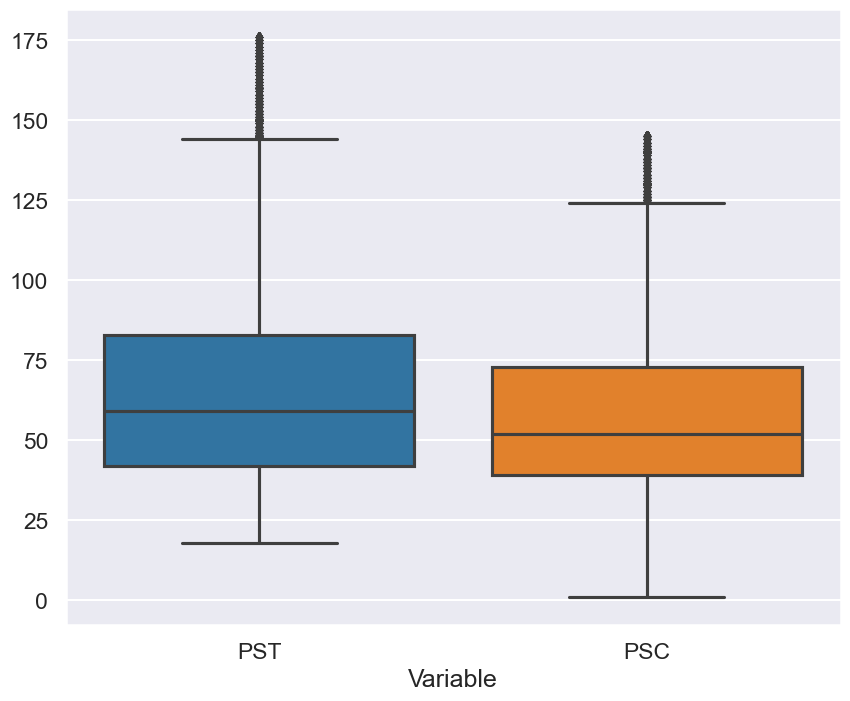

In [423]:
#Grafico Boxplot Conjunto
sns.set_context('talk')
sns.set_style("darkgrid")

variables=[]
valores=[]

variables =['PST']*len(list(X_train.property_surface_total)) + ['PSC']*len(list(X_train.property_surface_covered))

valores=list(X_train.property_surface_total) + list(X_train.property_surface_covered)

plt.figure(figsize=(10,8))
grafico=sns.boxplot(x=variables,y=valores)
grafico.set(xlabel='Variable')

Ahora observamos que la media de PST se encuentra cerca de 60 y PSC cerca de 50. Estos valores tienen mucho sentido ya que La superficie cubierta siempre suele ser unos 10 metros menor con respecto a la superficie total de la vivienda.

In [424]:
#Heatmap correlación
X_train.corr().style.background_gradient(cmap='coolwarm')

<AxesSubplot: xlabel='property_surface_total', ylabel='property_price'>

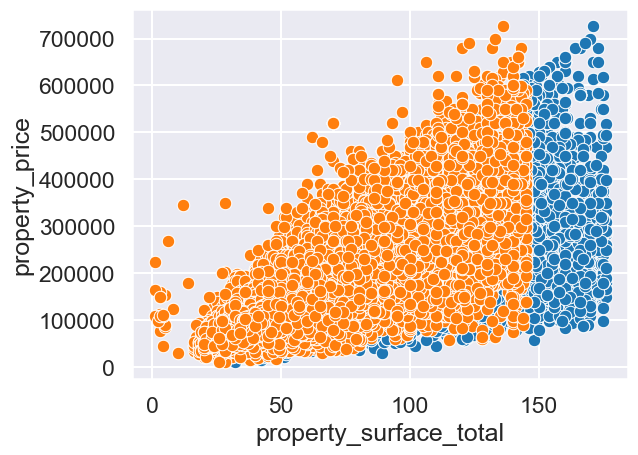

In [425]:
sns.scatterplot(x=X_train.property_surface_total, y=y_train)
sns.scatterplot(x=X_train.property_surface_covered, y=y_train)

Este grafico muestra claramente como siempre la superifcie total esta unos metros por encima de la superficie cubierta de la vivienda, tal y como veiamos en el analsis por boxplot una vez removidos los outliers mas groseros.

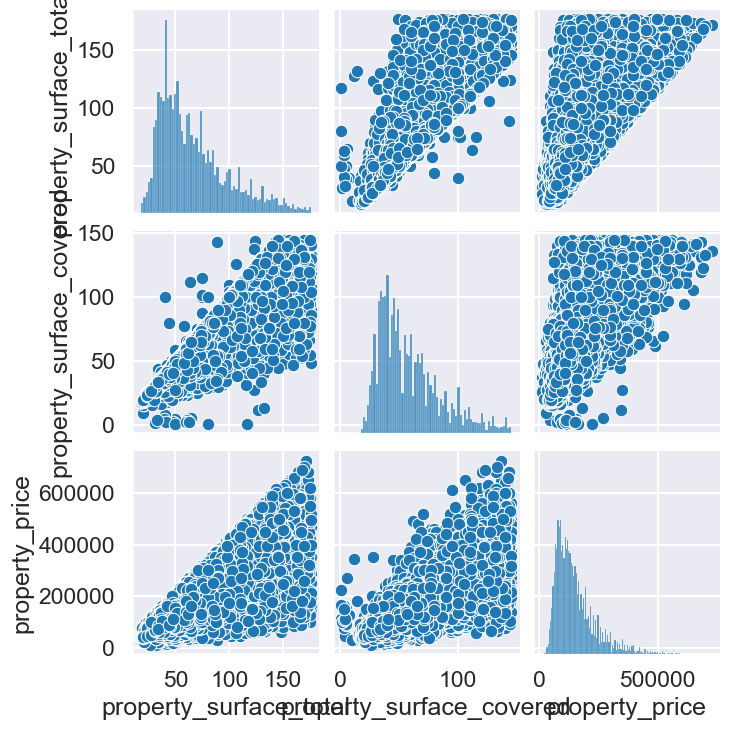

In [426]:
#Grafico de a pares incluyendo variable a predecir
xy_train_sin_outliers = pd.concat([X_train, y_train], axis=1)
sns.pairplot(xy_train_sin_outliers)

En este pairplot notamos la estrecha relacion guarda el precio con la superficie total y la superficie cubierta de una vivienda. Podemos notar esto a traves de las rectas lineales que se forman en los graficos.

Creamos un modelo KNN sin ninguna optimizacion y vemos que metricas obtenemos

In [540]:
from sklearn.neighbors import KNeighborsRegressor

# Creo un modelo KNN para regresion y lo ajusto
knn_regressor = KNeighborsRegressor().fit(X_train, y_train)

#Hago una predicción
y_pred = knn_regressor.predict(X_test)

In [541]:
y_pred

array([190100., 101980.,  90180., ..., 123200., 152800., 114000.])

In [519]:
# Performance
performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred,
                            'Error': y_test - y_pred})
# View
performance.head()

Valor Real  Prediccion     Error
235547    650000.0    190100.0  459900.0
75864      77000.0    101980.0  -24980.0
323033    125000.0     90180.0   34820.0
420881    375000.0    224800.0  150200.0
224090    148000.0    166200.0  -18200.0

In [542]:
#Metricas para evaluar modelos
from sklearn import metrics

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

El error (mse) de test es: 6507859558.105255
El error (rmse) de test es: 80671.30566753742


In [543]:
#Coef. de Determinación R2
score_knn = knn_regressor.score(X_test, y_test)
score_knn

0.7230237394673518

Comparemos la performance con una regresión lineal múltiple

- Elemento de la lista
- Elemento de la lista

In [544]:
from sklearn.linear_model import LinearRegression

# Creo un modelo de regresion lineal y lo ajusto
lr_model = LinearRegression().fit(X_train, y_train)

#Hago una predicción
y_pred_lr = lr_model.predict(X_test)

In [546]:
#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred_lr,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred_lr,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

El error (mse) de test es: 6665650116.610833
El error (rmse) de test es: 81643.43278311388


In [547]:
#Coef. de Determinación R2
score_lr = lr_model.score(X_test, y_test)
score_lr

0.716308130678929

Haciendo una regresion lineal igualmente notamos que no tenemos gran diferencia con respecto al primer modelo de KNN que creamos. Vamos a tener que realizar algunas optimizaciones.

#### Optimizamos los parámetros usando random search cross validation

In [548]:
knn_r_acc = []
for i in range(1,16,1):
    knn = KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_score = knn.score(X_train, y_train)
    knn_r_acc.append((i, test_score ,train_score))
df = pd.DataFrame(knn_r_acc, columns=['K','Test_Score','Train_Score'])
print(df)

     K  Test_Score  Train_Score
0    1    0.615179     0.761313
1    2    0.682994     0.793934
2    3    0.706457     0.791393
3    4    0.717759     0.786838
4    5    0.723024     0.782685
5    6    0.727382     0.777861
6    7    0.726772     0.772924
7    8    0.726828     0.768647
8    9    0.729964     0.766761
9   10    0.732833     0.764815
10  11    0.733242     0.762670
11  12    0.735204     0.760970
12  13    0.735447     0.758304
13  14    0.734786     0.756625
14  15    0.734095     0.754673


Text(0, 0.5, 'Score')

<Figure size 1000x1000 with 0 Axes>

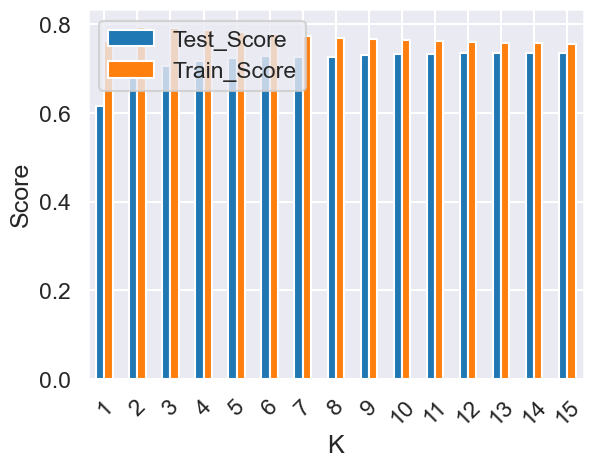

In [549]:
plt.figure(figsize=(10, 10))
df.plot.bar(x='K', rot=45)
plt.xlabel("K")
plt.ylabel("Score")

El mejor score posible es 1

[Text(0.5, 0, 'K'), Text(0, 0.5, 'Distribución para Train')]

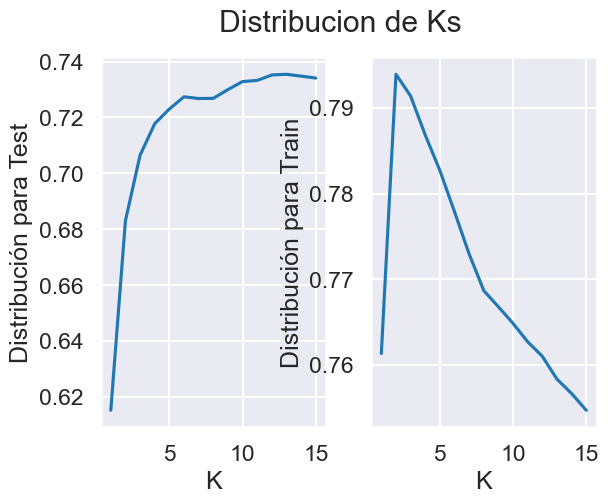

In [550]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Distribucion de Ks')
ax1.plot(df.K, df.Test_Score)
ax2.plot(df.K, df.Train_Score)


#axs[0].set_title("Distribución con diferentes K")
ax1.set(xlabel='K', ylabel='Distribución para Test')
ax2.set(xlabel='K', ylabel='Distribución para Train')

Como podemos observar en los plots y en el dataset, el mejor valor de K para datos de train se encuentra entre 2 <= K <= 3, pero en esa instancia, los datos de test bajan abruptamente.

Es por este motivo que decidimos elegir un K = 14, ya que es donde mas estables y parejos estan los valores tanto para test como para train. 

In [551]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier


#Grilla de Parámetros
params_grid={ 'n_neighbors':[14], 
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn = KNeighborsClassifier(n_neighbors=14)

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)

rand.fit(X_train, y_train)
rand.cv_results_['mean_test_score']

array([0.04605653, 0.04646939, 0.06389755, 0.06389755, 0.04628987,
       0.04745659, 0.0647591 , 0.04632579, 0.06389756, 0.0639155 ])

In [529]:
#Mejores hiperparametros
print(rand.best_params_)

{'weights': 'distance', 'n_neighbors': 14, 'metric': 'euclidean', 'algorithm': 'brute'}


In [552]:
#Mejor métrica
print(rand.best_score_)

0.064759104649591


In [553]:
#Mejor estimador
best_knn = rand.best_estimator_

#Predicción con mejor estimador
y_pred = best_knn.predict(X_test)

#Accuracy test
accuracy_score(y_test,y_pred)

0.061598104673702345

In [554]:
y_pred = knn_regressor.predict(X_test)

Ahora que ya sabemos que optimizaciones le queremos hacer al modelo, lo creamos con esos parametros.

In [555]:
from sklearn.neighbors import KNeighborsRegressor

# Creo un modelo KNN para regresion optimizado con los mejores parametros
knn_regressor = KNeighborsRegressor(n_neighbors=14, weights='distance',algorithm='brute',metric='euclidean').fit(X_train, y_train)

#Hago una predicción
y_pred = knn_regressor.predict(X_test)

In [556]:
# Performance
performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred,
                            'Error': y_test - y_pred})
# View
performance.head()

Valor Real     Prediccion          Error
235547    650000.0  267298.824700  382701.175300
75864      77000.0   96635.714286  -19635.714286
323033    125000.0   98485.714286   26514.285714
420881    375000.0  208500.000000  166500.000000
224090    148000.0  161857.142857  -13857.142857

In [557]:
#Metricas para evaluar modelos
from sklearn import metrics

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

El error (mse) de test es: 5818918347.065658
El error (rmse) de test es: 76281.83497442663


In [ ]:
Notamos como los errores bajan drasticamente luego de hacer una optimizacion. Por otro lado, notamos que el MSE sigue siendo un poco elevado pero se lo atribuimos al dataset y a algunos outliers que puedan haber quedado por ahí haciendo un poco de ruido. 

De todas formas, las representaciones son claras y las optimizaciones fueron hech

Se comprende luego de este analisis la estrecha correlacion que hay entre las variables de superficie. Una (sup.total) incluye a la otra (sup.cubierta) por un X delta de metros y a su vez vimos como el precio de la vivienda tiene una fuerte dependencia con los metros de superifice que tenga la propiedad en cuestion.

In [ ]:
dump(knn_regressor, 'modelos/knn.joblib')

## XGBoost - Regresión

## a elección - Regresión

¿Qué modelo elegirían para predecir el precio de venta de las propiedades? - Responder Despues

## Conclusiones

En primera instancia, queremos mencionar que una de las cosas que nos resultó mas interesante es poder entender mas el dominio de problema de la venta de propiedades.
Nosotros teníamos un conocimiento previo y mas intuitivo de este dominio pero hacer este trabajo nos sirvió para reafirmar conceptos sobre los cuales no teniamos datos veridicos como para realmente justificar.

Por ejemplo, suponiamos que habia algunos barrios de la capital que tenian precios mas caros que otros pero no sabiamos exactamente cuales eran esos barrios. 
Despues de terminado este analisis, notamos que Palermo (tal y como pensabamos) era uno de los barrios de CABA que tenia mas anuncios y varias publicaciones en venta.
Dicho sea de paso, este barrio tenia gran parte de sus propiedades mas caras que otros barrios en relacion a los mismos metros cuadrados.
Es decir, si tenemos dos departamentos de 70 m2 en Villa Santa Rita vs Palermo, notaremos que efectivamente el departamento de Palermo se impone en precio por sobre el departamento de Villa Santa Rita.
Tambien pudimos identificar como varian los precios dependiendo del tipo de vivienda que estemos analizando.
Serian mas caras las casas y los PHs que los departamentos a similar rango de m2 para un mismo barrio. Luego vemos como estas variables se alteran dependiendo de la zona, los m2 y otras variables.

Por otro lado, tambien pudimos desmitificar pensamientos que teniamos con lo que respecta a cantidad de anuncios de propiedades.
Barrios que pensabamos que quizas no era tan "populares" resultaban tener varias publicaciones con varios tipos de viviendas.

Algo que quisimos agregar mediante una imputacion es la distancia de las propiedades a la estacion de subte mas cercana para utilizarla como feature en base a uno de los datasets del gobierno de la ciudad. No tuvimos tiempo para hacerlo pero creemos que podria tener un valor agreagado.

Finalmente, no terminamos con todos los incisos requeridos para esta entrega, pero en los siguientes dias antes de llegar a la fecha de reentrega vamos a estar trabajando en ellos.